In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
load_path = '../data/processed/tratamento_0002.csv'
df_load = pd.read_csv(load_path)

In [2]:
print(df_load.columns)

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT',
       'SOLD_QUANTITY', 'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID'],
      dtype='object')


In [3]:
df_load.groupby(["VERTICAL", "DOM_DOMAIN_AGG1"],as_index=False)["SOLD_QUANTITY"].count()#.sort_values(by=['SOLD_QUANTITY'])

,VERTICAL,DOM_DOMAIN_AGG1,SOLD_QUANTITY
0,ACC,ACC TOOLS,90
1,ACC,AGRO,1
2,ACC,AUTOPARTS,1496
3,ACC,MOTOPARTS,584
4,ACC,VEHICULAR MULTIMEDIA,90
5,ACC,WHEELS & TIRES,31
6,APP & SPORTS,APPAREL,3571
7,APP & SPORTS,APPAREL ACCESORIES,4057
8,APP & SPORTS,FOOTWEAR,1406
9,APP & SPORTS,SPORTS,2932


In [4]:
df_load.head(3)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5,5,0.00,0.0,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
1,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,15,12,10.73,3.0,COMPUTERS,CE,MLM-SPEAKERS
2,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,15,13,7.03,2.0,COMPUTERS,CE,MLM-HEADPHONES


In [5]:
df_load['OFFER_START_DATE'] = pd.to_datetime(df_load['OFFER_FINISH_DTTM'])
df_load['OFFER_START_DTTM'] = pd.to_datetime(df_load['OFFER_START_DTTM'])
df_load['OFFER_FINISH_DTTM'] = pd.to_datetime(df_load['OFFER_FINISH_DTTM'])

In [6]:
for dominio_agg in df_load["DOM_DOMAIN_AGG1"].unique():
    print(dominio_agg)

PET PRODUCTS
COMPUTERS
ELECTRONICS
PETS FOOD
APPAREL
PARTY
TOYS AND GAMES
PERSONAL CARE
INDUSTRY
TOOLS AND CONSTRUCTION
HOME&DECOR
SPORTS
BOOKS, MULTIMEDIA & OTHER E!
AUTOPARTS
DRINKS
FOOTWEAR
WHEELS & TIRES
BEAUTY EQUIPMENT
MOBILE
APPAREL ACCESORIES
FOODS
PHARMACEUTICS
STATIONARY
BABY
PERSONAL HYGIENE
OTHER
VEHICULAR MULTIMEDIA
SUPLEMENTS
SECURITY
MOTOPARTS
CLEANING
ACC TOOLS
MUSICAL INSTRUMENTS
ANTIQUES & HOBBIES
BATTERIES
AGRO


In [7]:
df_load.groupby(["VERTICAL", "DOM_DOMAIN_AGG1"],as_index=False)["SOLD_QUANTITY"].count()#.sort_values(by=['SOLD_QUANTITY'])

,VERTICAL,DOM_DOMAIN_AGG1,SOLD_QUANTITY
0,ACC,ACC TOOLS,90
1,ACC,AGRO,1
2,ACC,AUTOPARTS,1496
3,ACC,MOTOPARTS,584
4,ACC,VEHICULAR MULTIMEDIA,90
5,ACC,WHEELS & TIRES,31
6,APP & SPORTS,APPAREL,3571
7,APP & SPORTS,APPAREL ACCESORIES,4057
8,APP & SPORTS,FOOTWEAR,1406
9,APP & SPORTS,SPORTS,2932


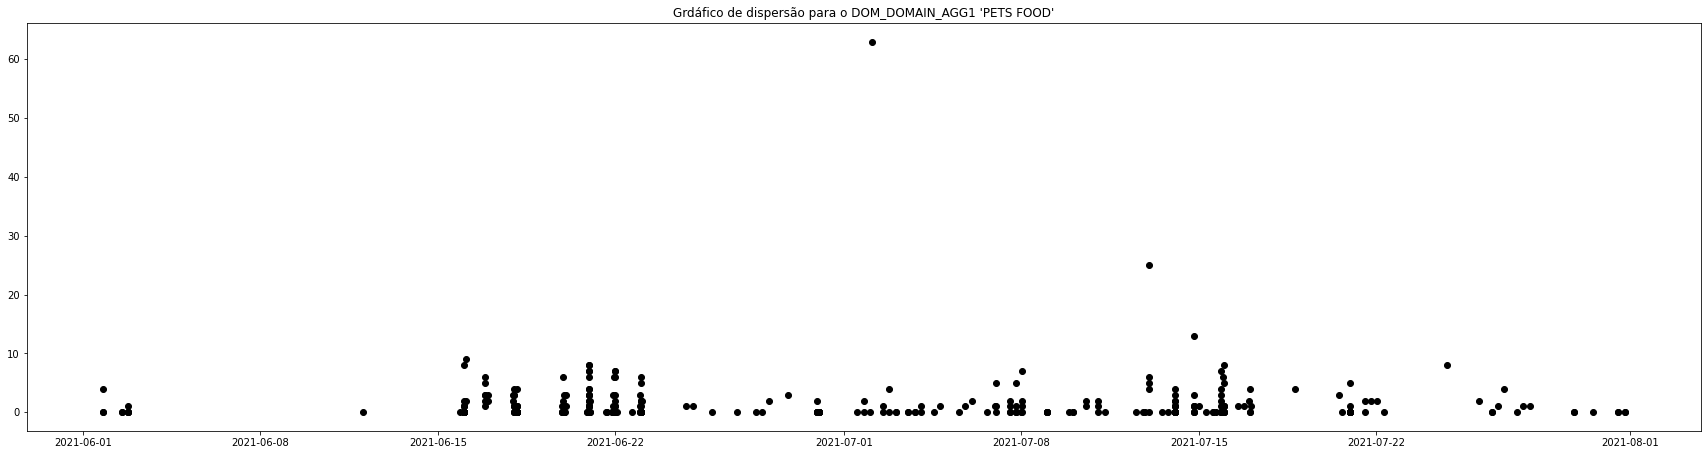

In [8]:
df_load_sccater = df_load.query(f"DOM_DOMAIN_AGG1 == 'PETS FOOD'")
FIGSIZE = 30
plt.figure(figsize = (FIGSIZE,FIGSIZE/4))
x = df_load_sccater["OFFER_START_DATE"]
y = df_load_sccater["SOLD_QUANTITY"]

plt.title("Grdáfico de dispersão para o DOM_DOMAIN_AGG1 'PETS FOOD'")
plt.plot(x, y, 'o', color='black')

In [9]:
df_season = df_load_sccater.groupby(["OFFER_START_DATE", "SOLD_QUANTITY"],as_index=False)["SOLD_QUANTITY"].count().sort_values(by=["SOLD_QUANTITY"], ascending=False)
df_season

,OFFER_START_DATE,SOLD_QUANTITY
34,2021-06-18 03:00:00+00:00,14
51,2021-06-20 23:00:00+00:00,6
211,2021-07-20 23:00:00+00:00,6
81,2021-06-23 00:00:00+00:00,6
11,2021-06-16 01:00:00+00:00,6
...,...,...
104,2021-07-01 19:00:00+00:00,1
105,2021-07-01 19:00:00+00:00,1
106,2021-07-02 01:00:01+00:00,1
107,2021-07-02 03:00:00+00:00,1


<BarContainer object of 235 artists>

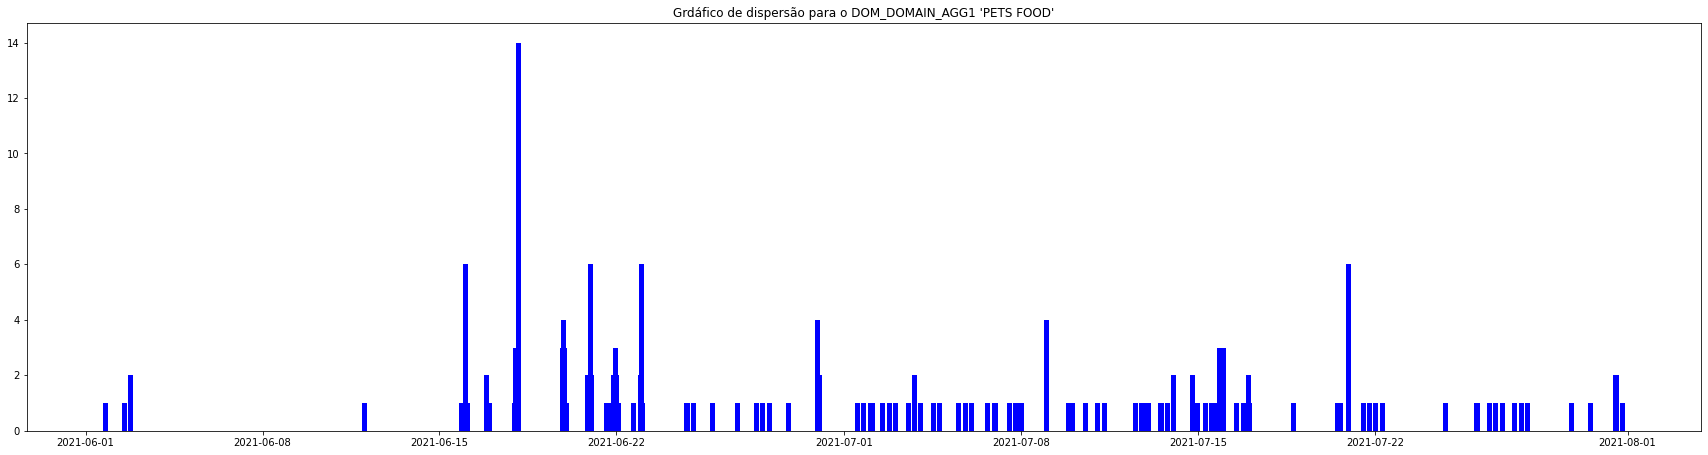

In [10]:
FIGSIZE = 30
plt.figure(figsize = (FIGSIZE,FIGSIZE/4))
x = df_season["OFFER_START_DATE"]
y = df_season["SOLD_QUANTITY"]

plt.title("Grdáfico de dispersão para o DOM_DOMAIN_AGG1 'PETS FOOD'")
plt.bar(x, y, color='blue', width=0.2)

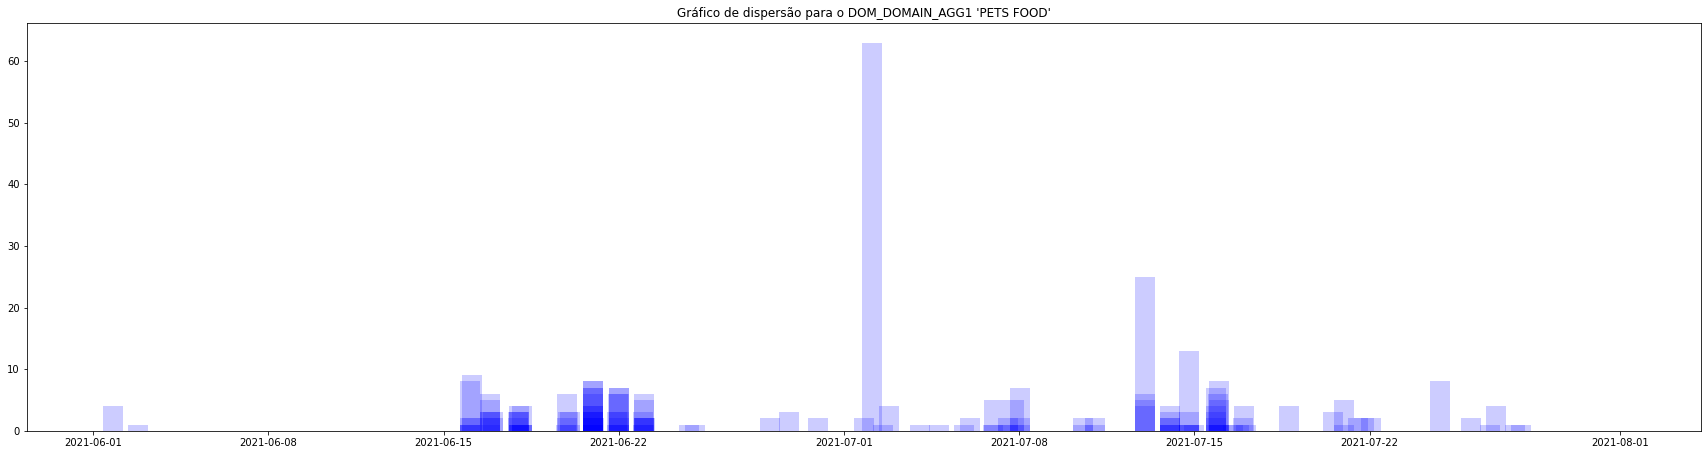

In [11]:
FIGSIZE = 30
plt.figure(figsize = (FIGSIZE,FIGSIZE/4))
plt.title("Gráfico de dispersão para o DOM_DOMAIN_AGG1 'PETS FOOD'")
x = df_load_sccater["OFFER_FINISH_DTTM"]
y = df_load_sccater["SOLD_QUANTITY"]
plt.bar(x, y, color='blue', alpha = 0.2);

## Análise temporal - dias do mês

C:\Users\Marcelo DL\AppData\Local\Temp\ipykernel_13096\2849491037.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (FIGSIZE,FIGSIZE/4))


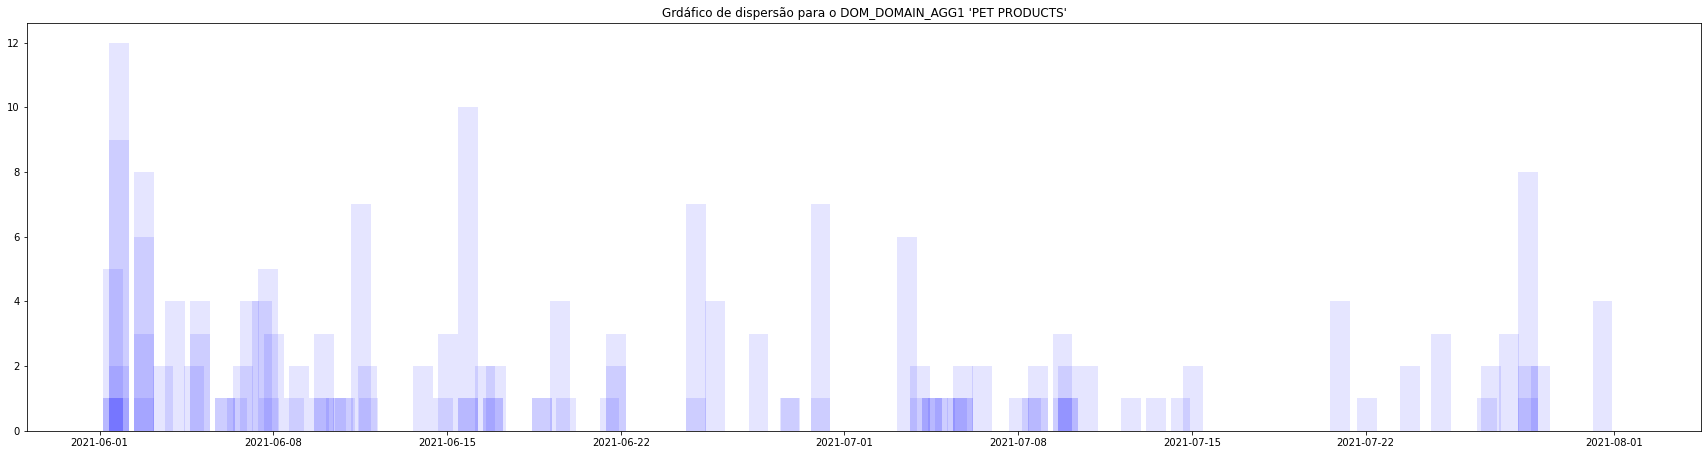

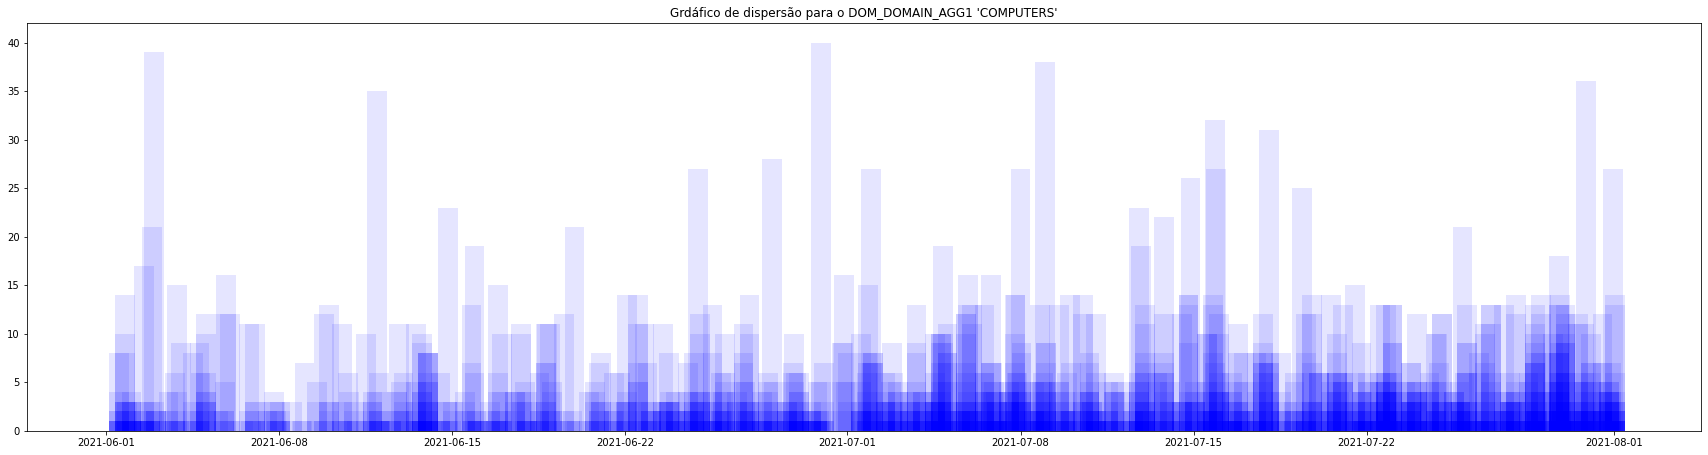

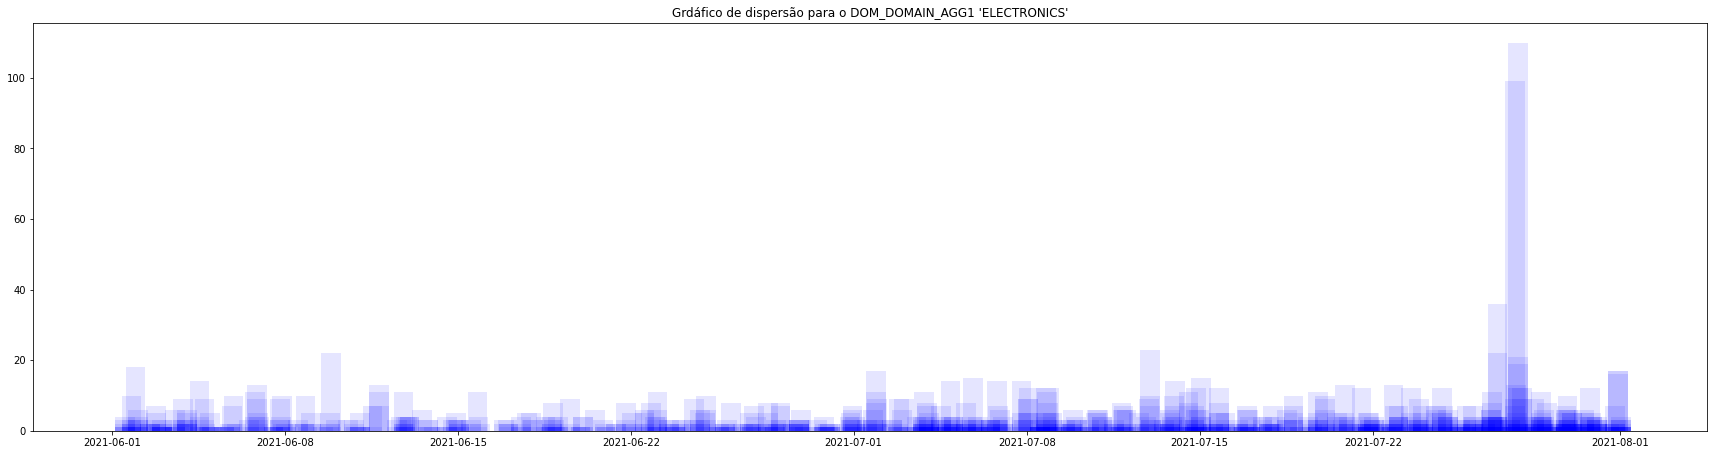

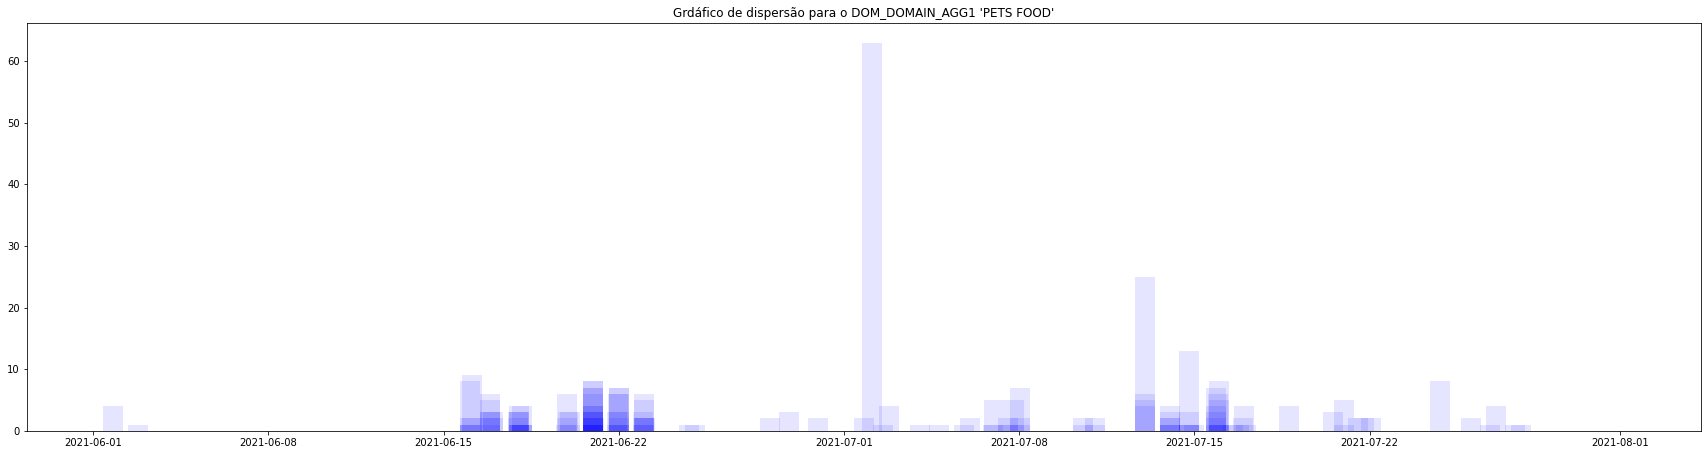

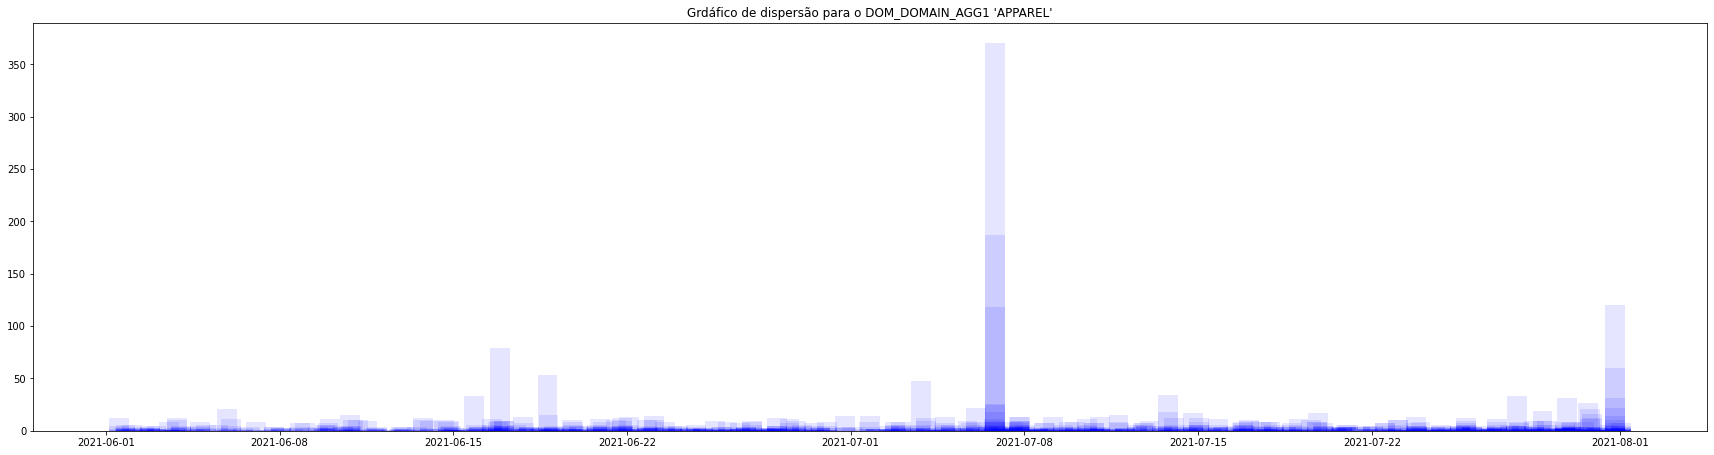

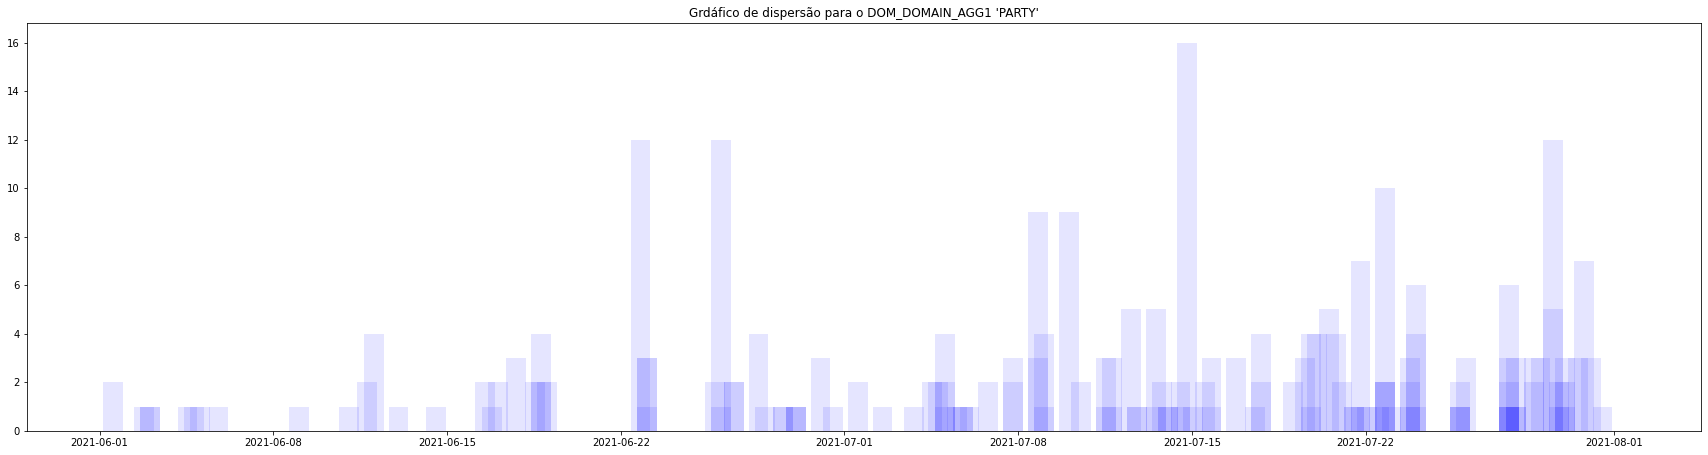

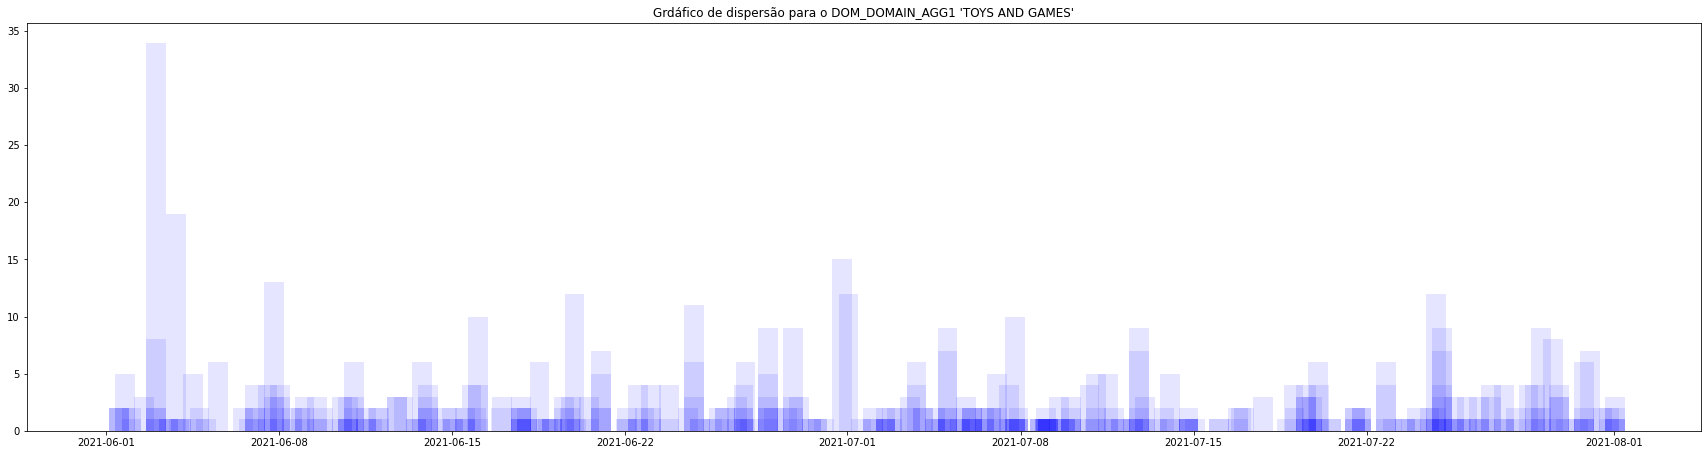

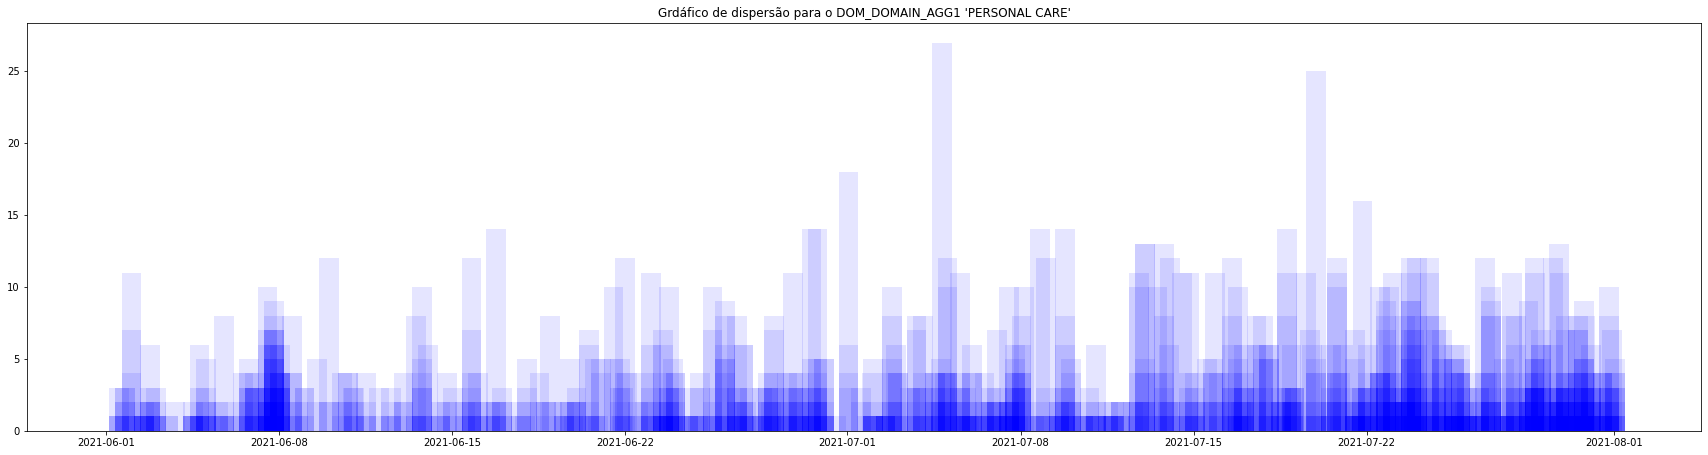

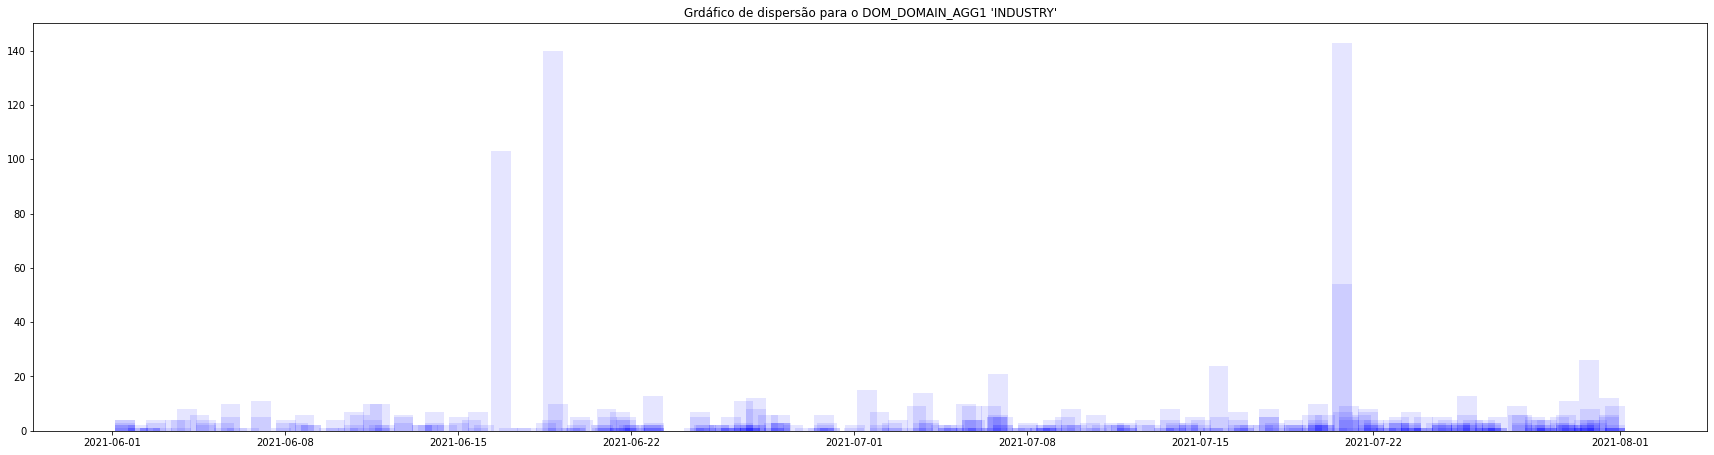

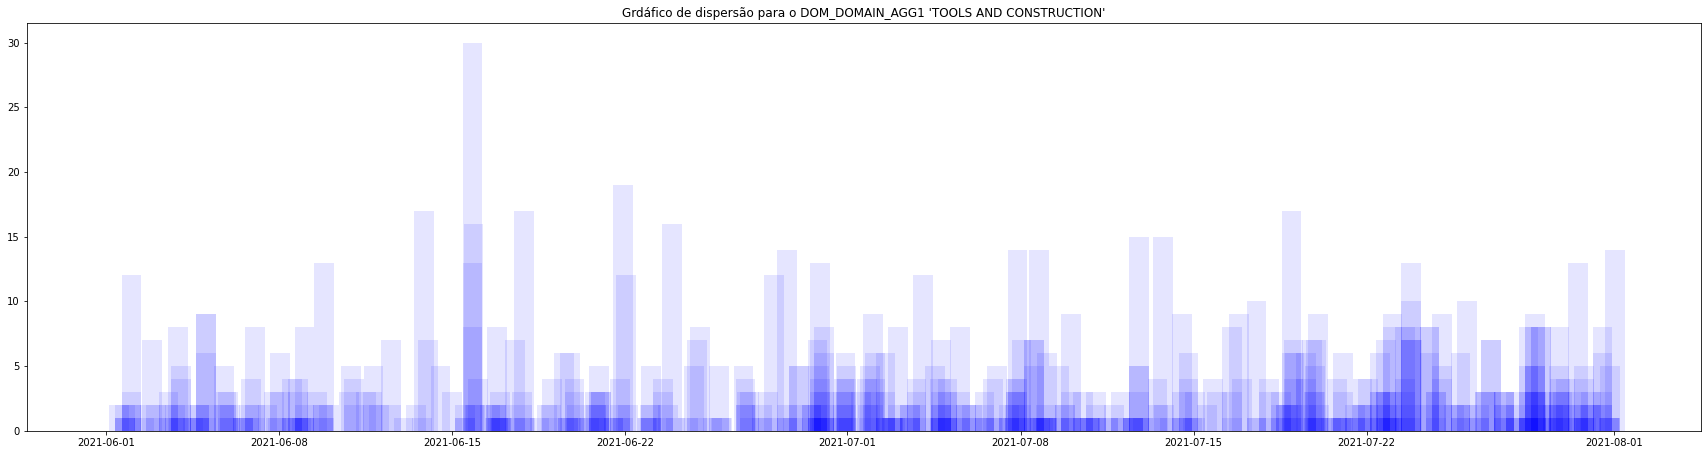

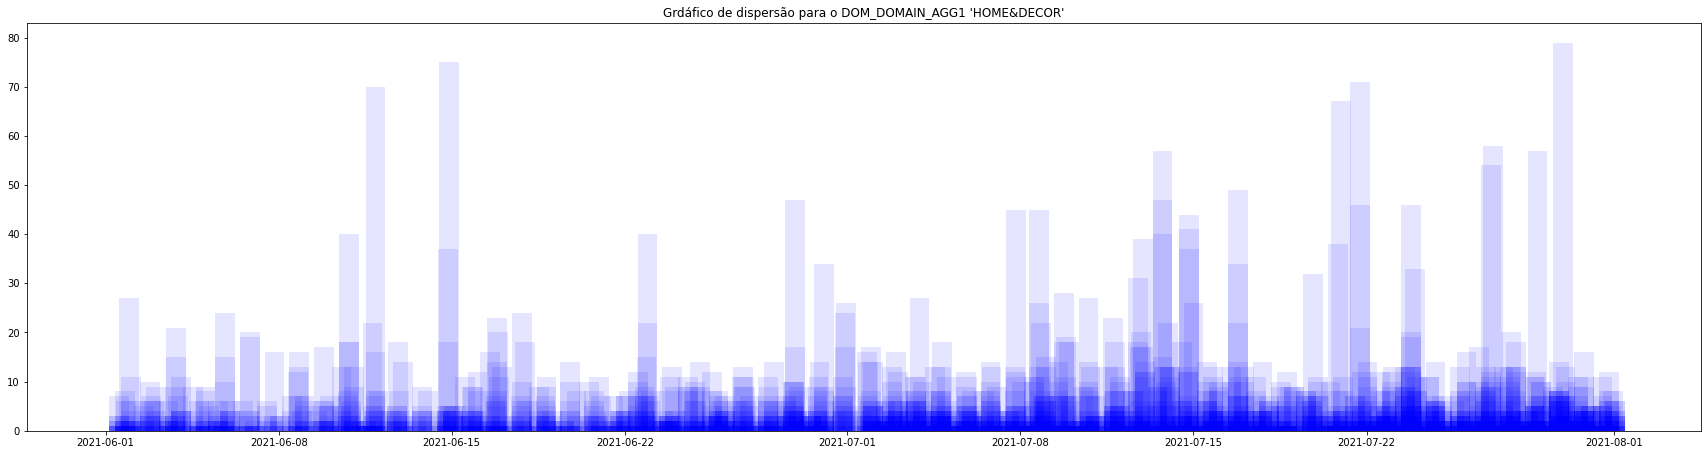

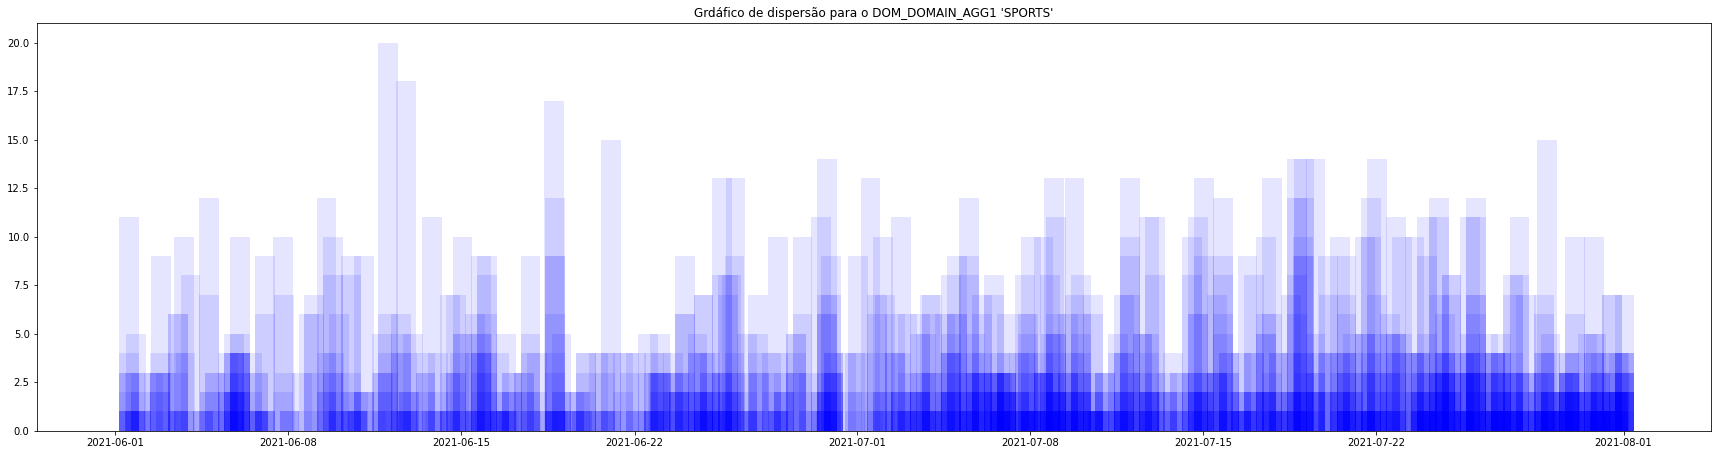

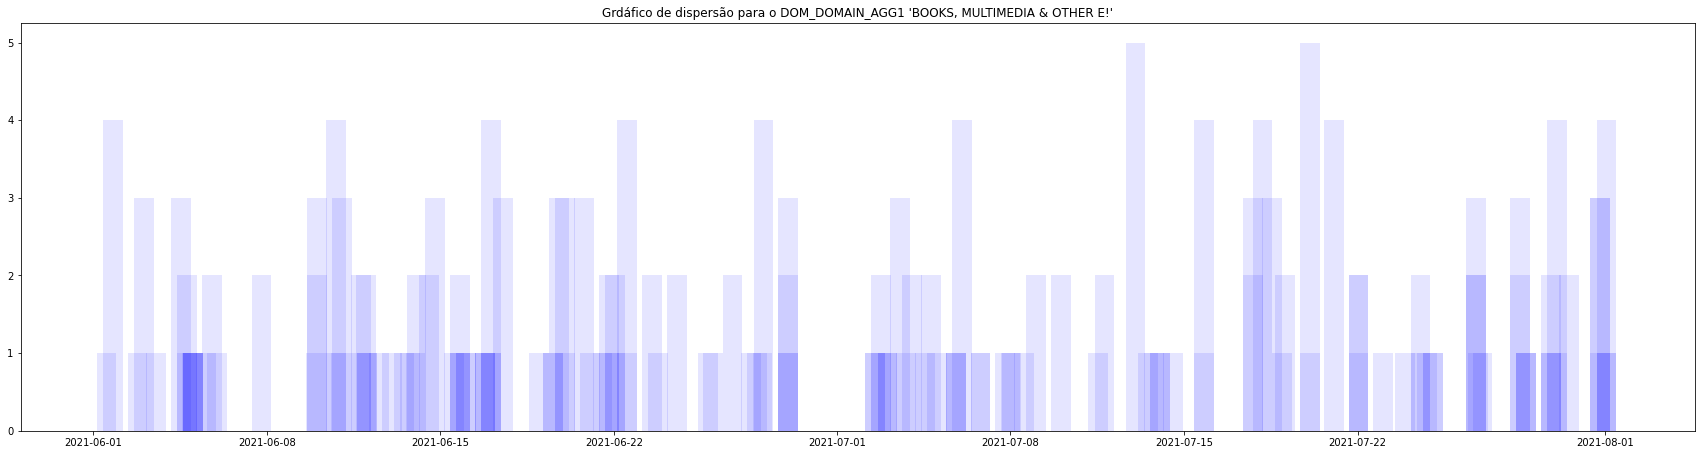

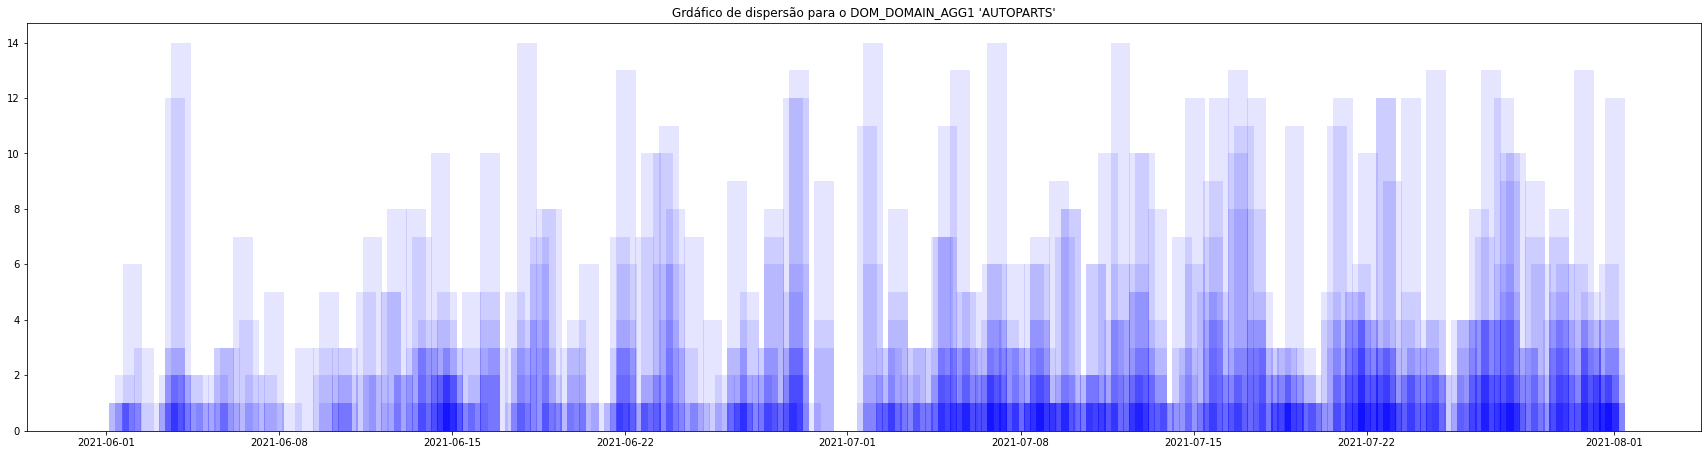

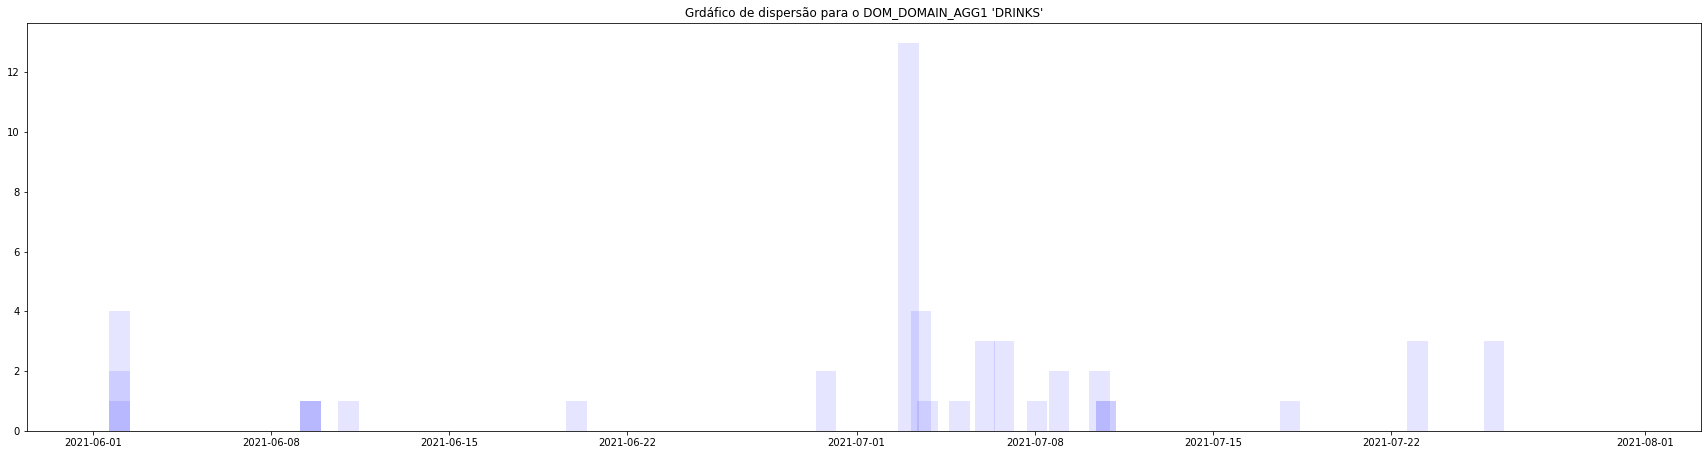

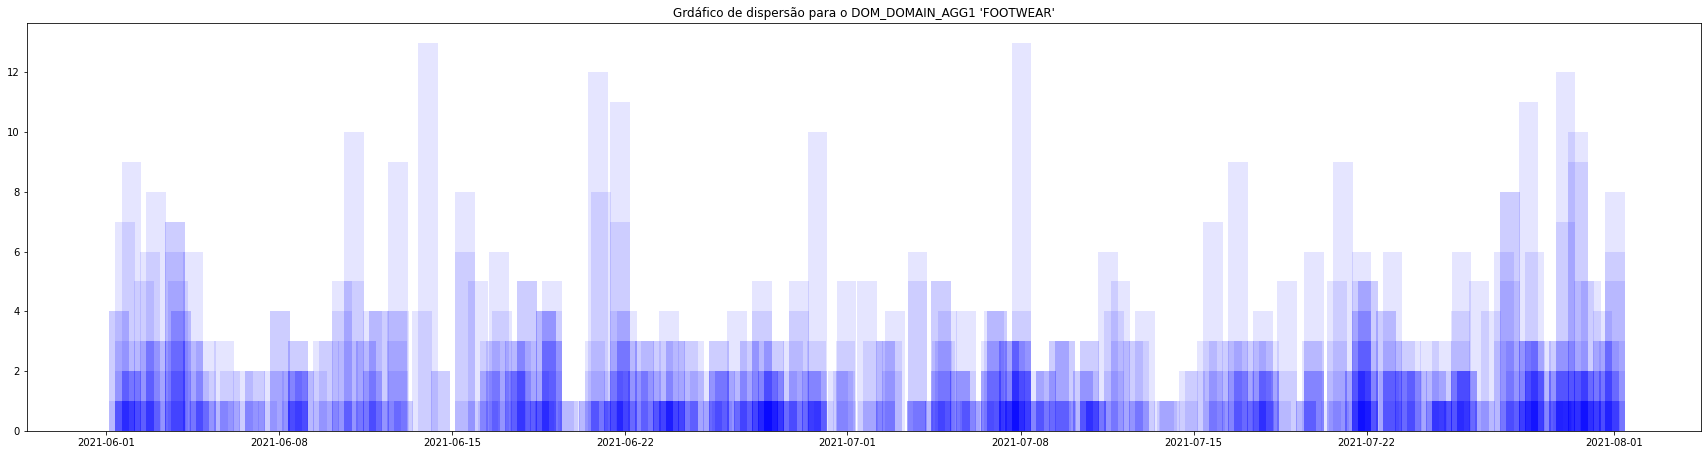

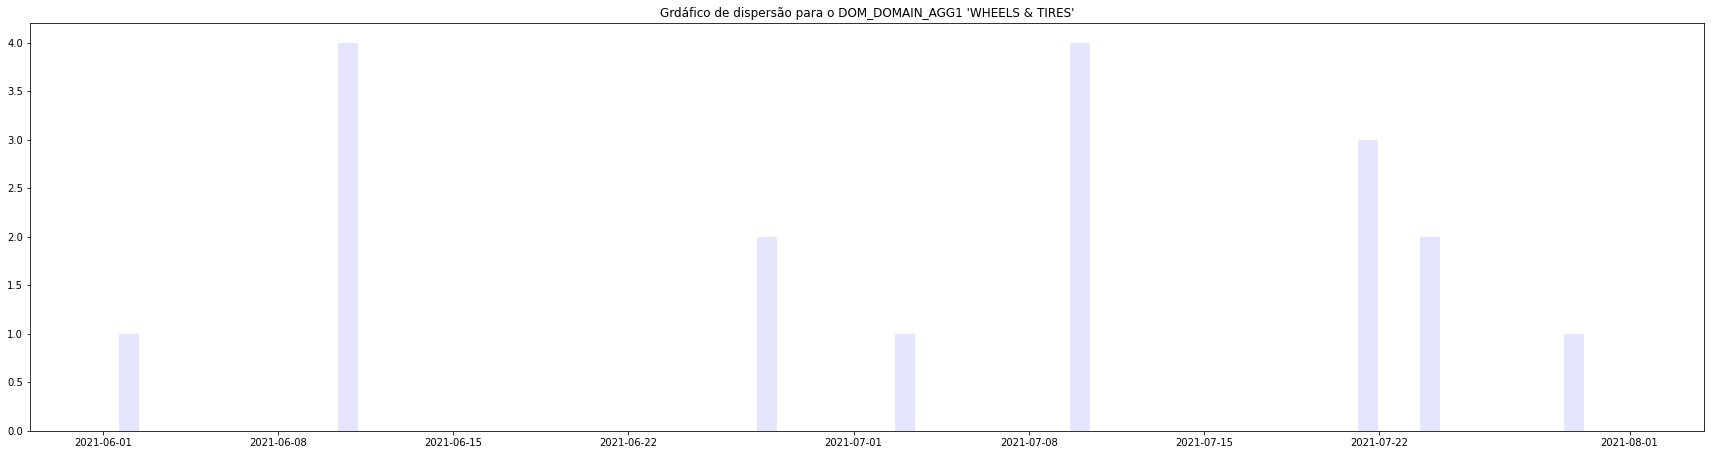

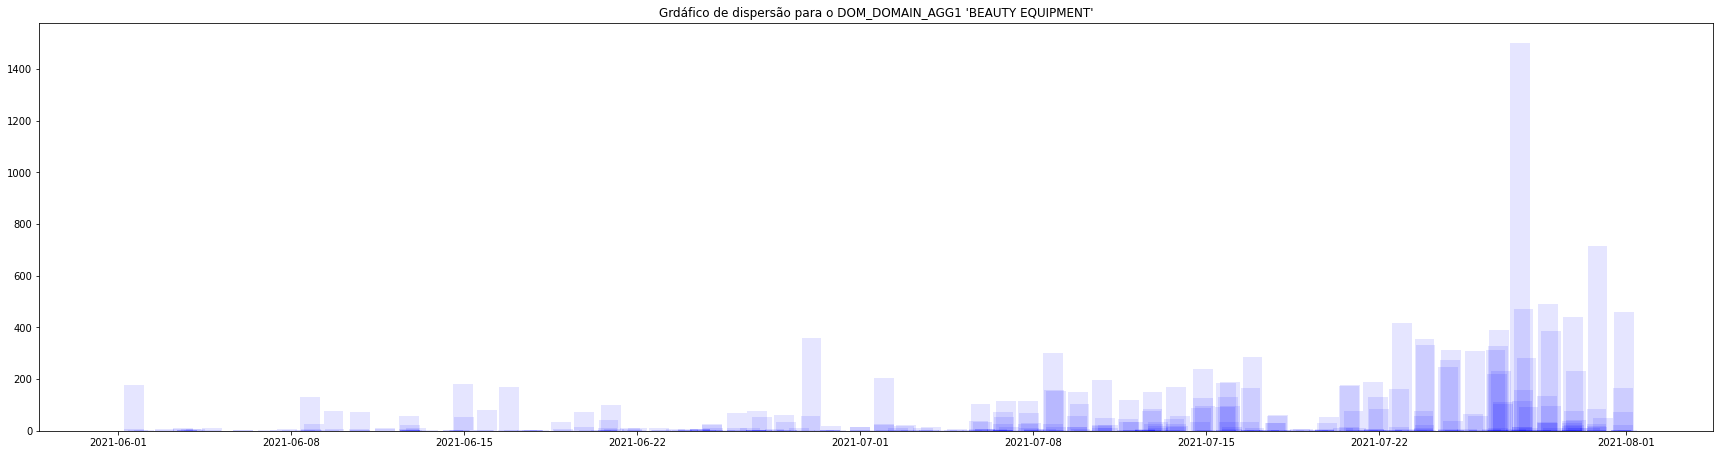

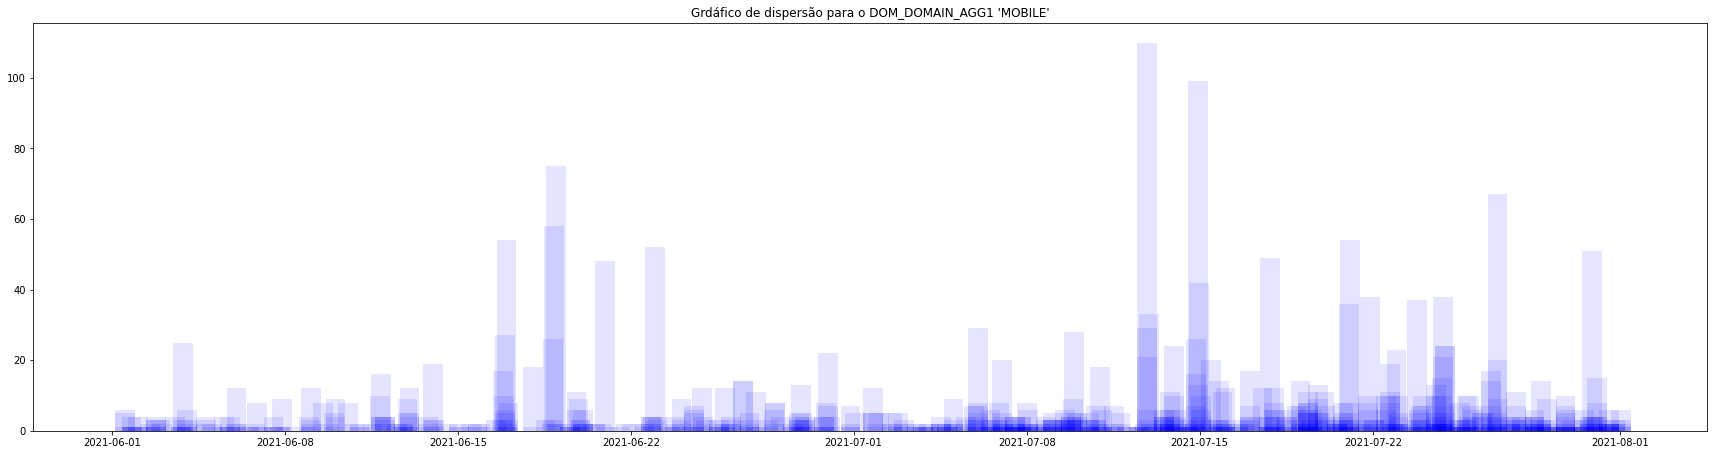

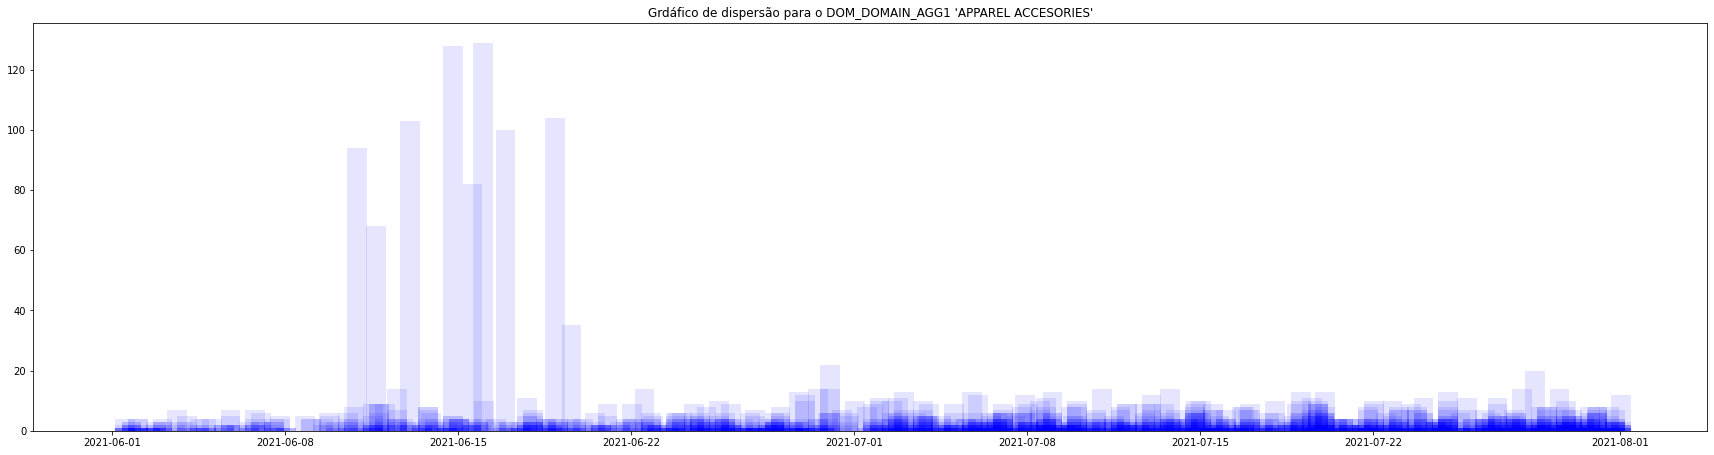

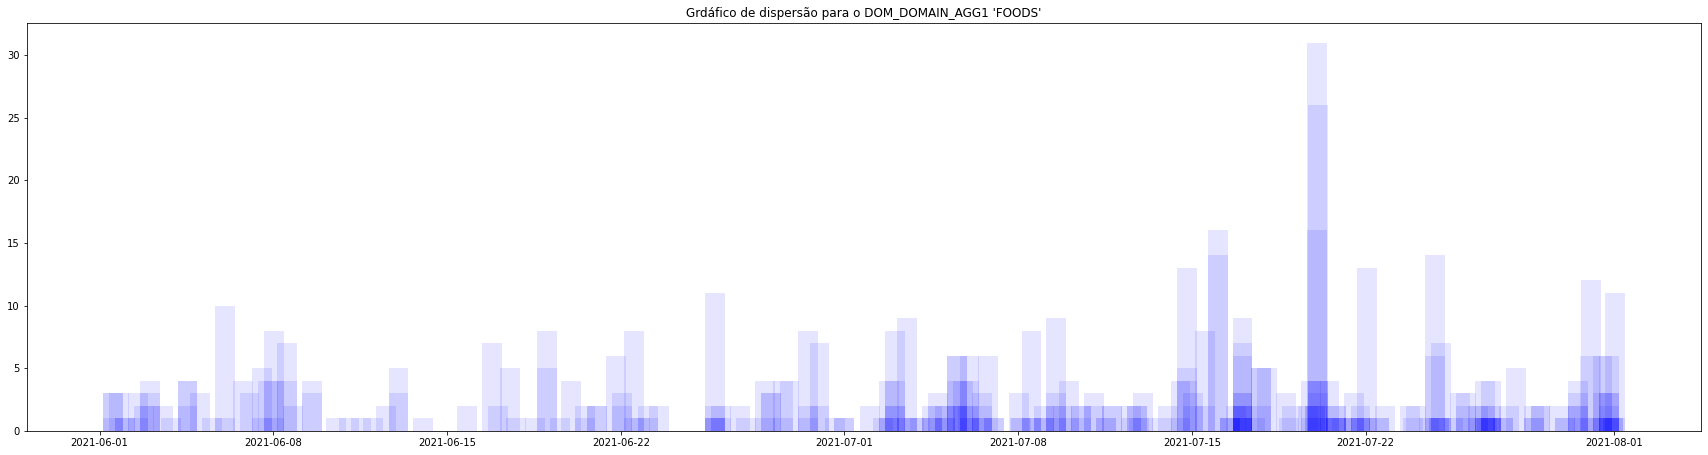

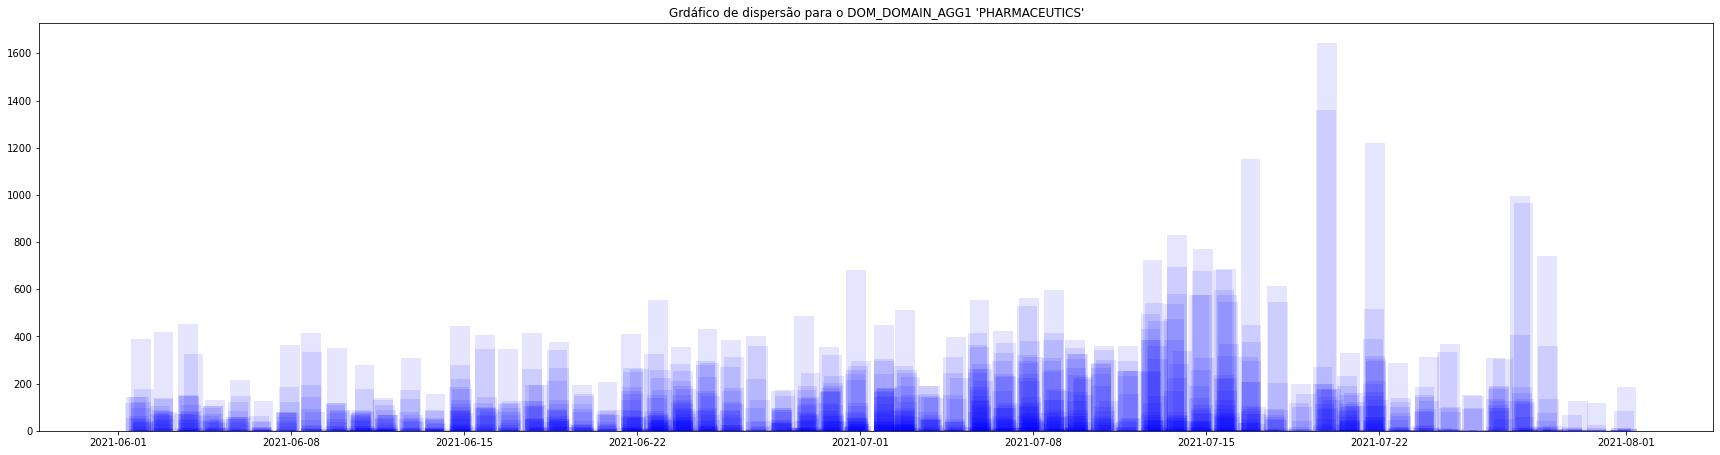

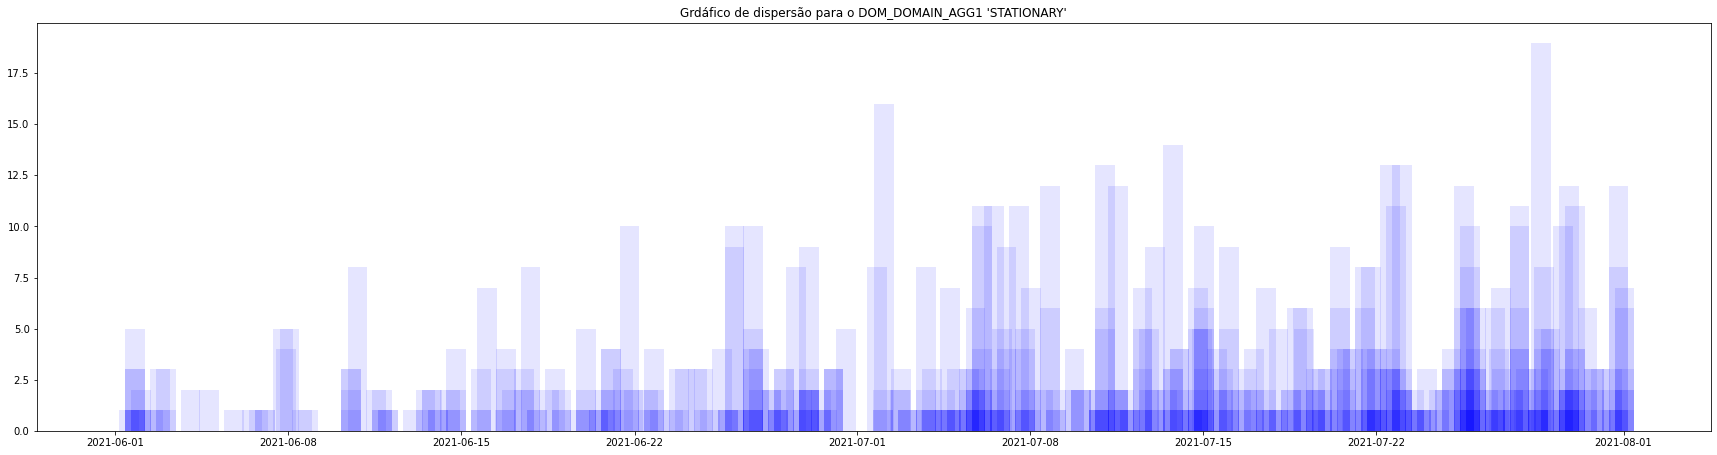

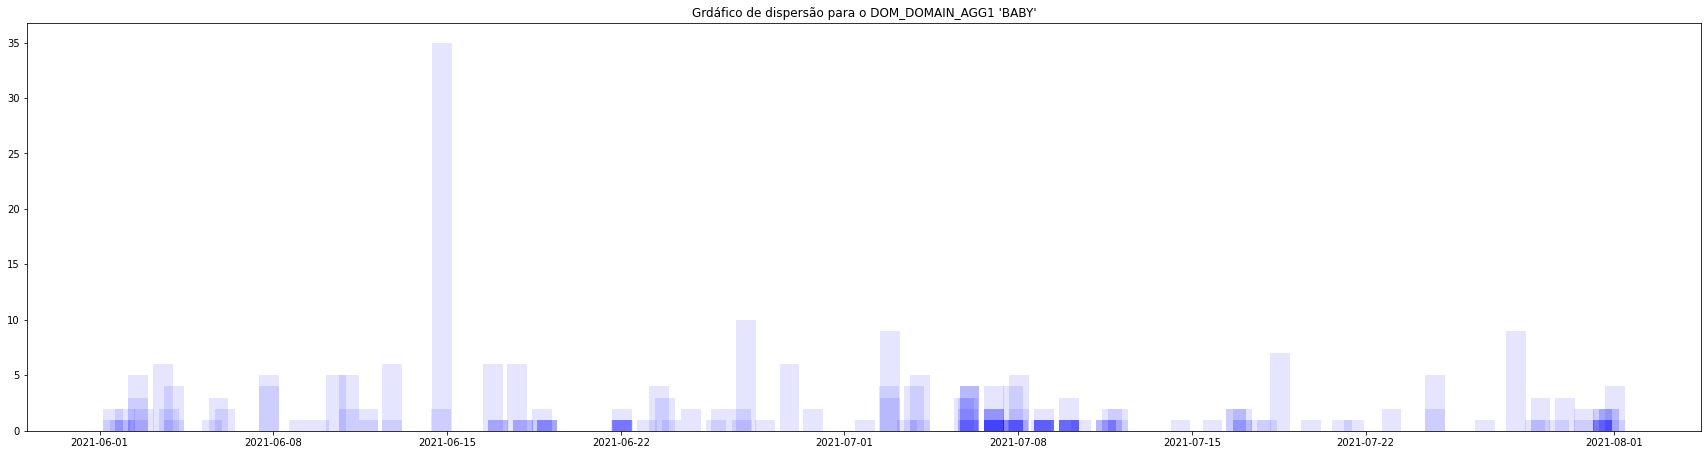

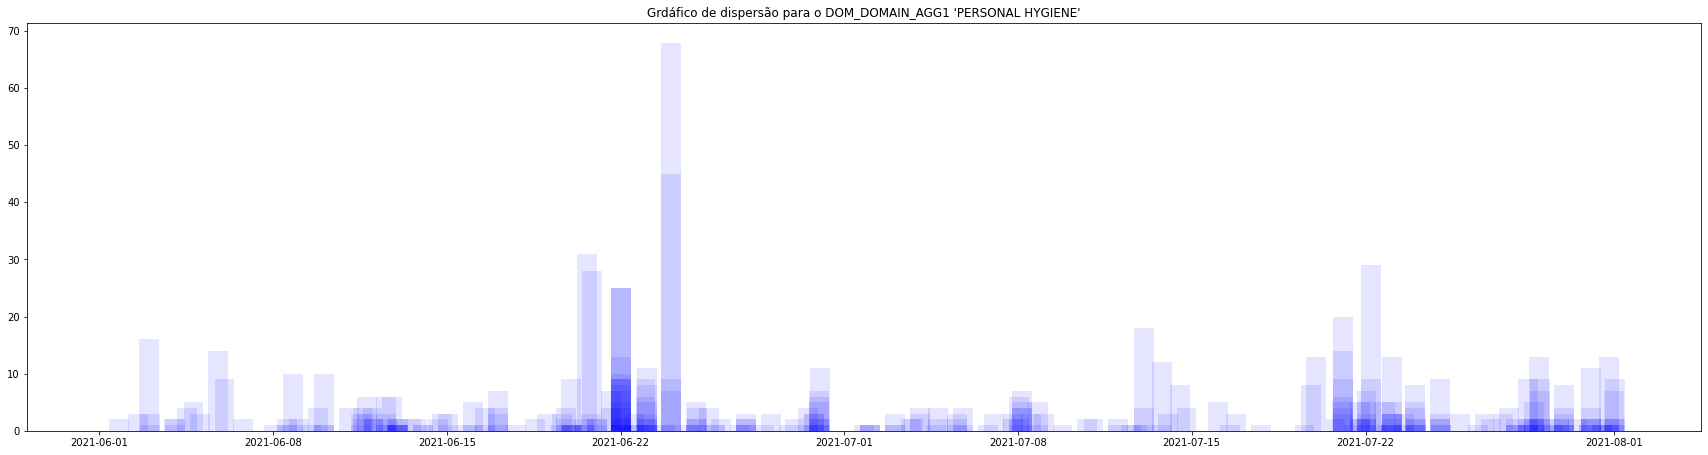

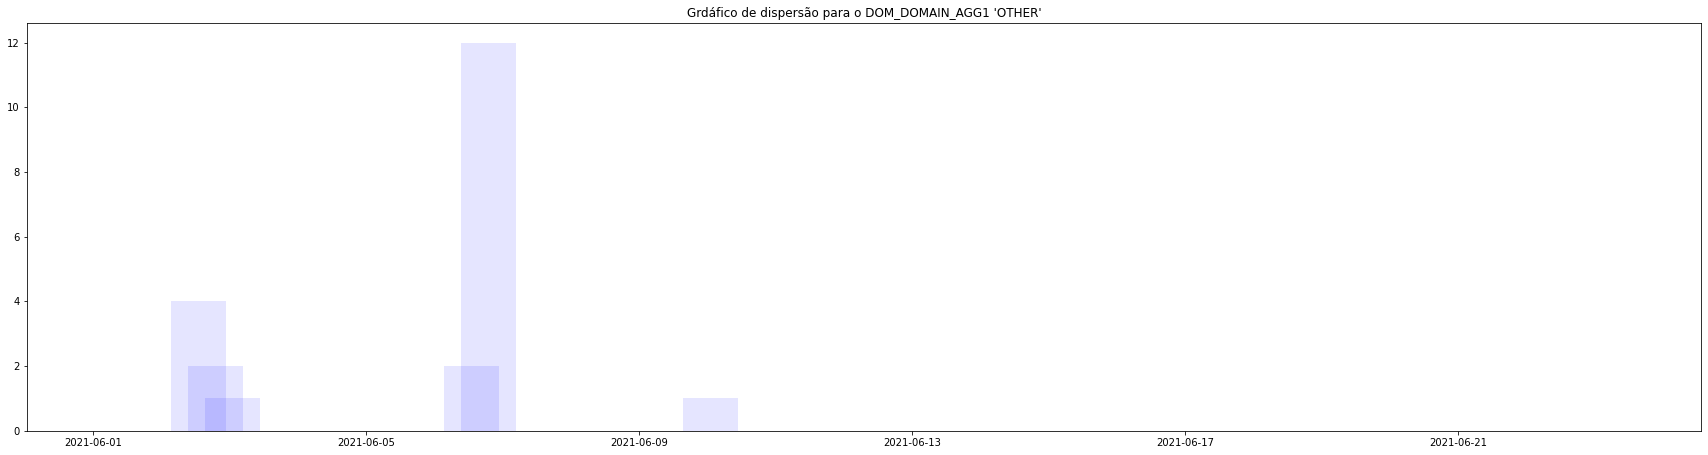

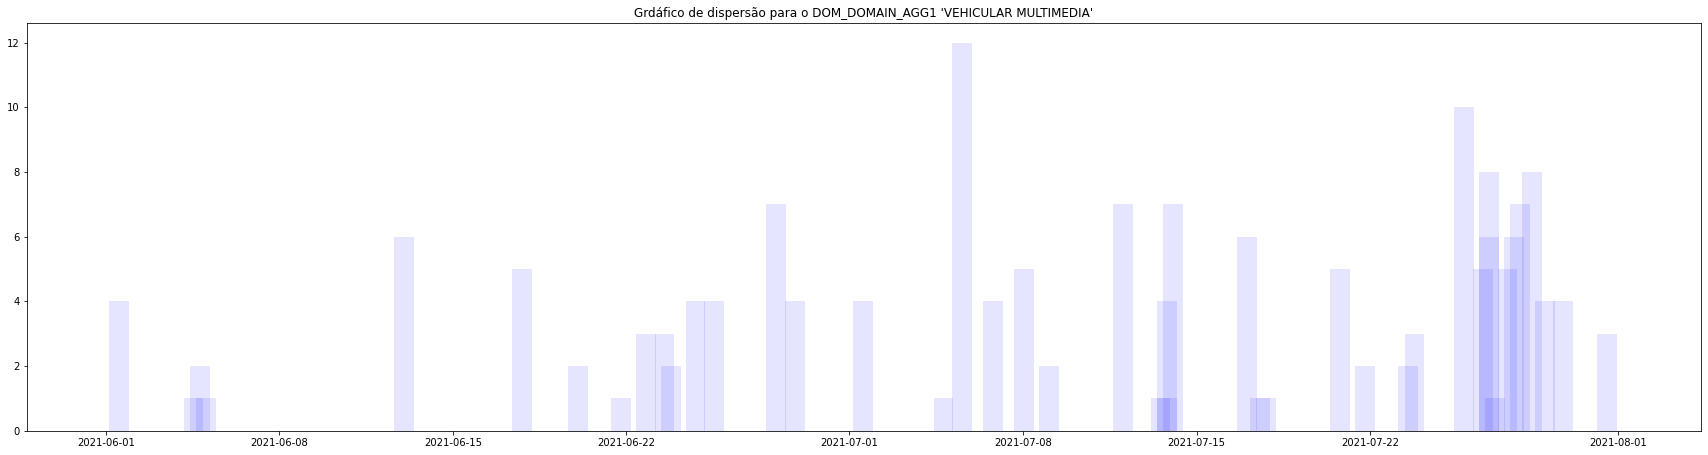

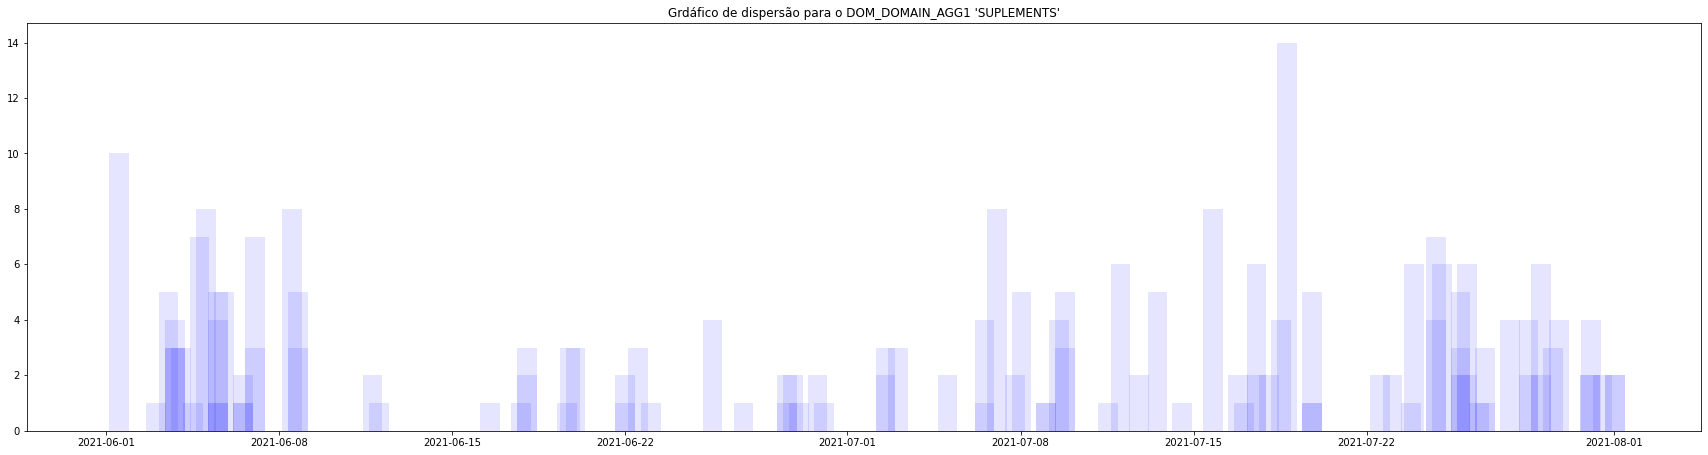

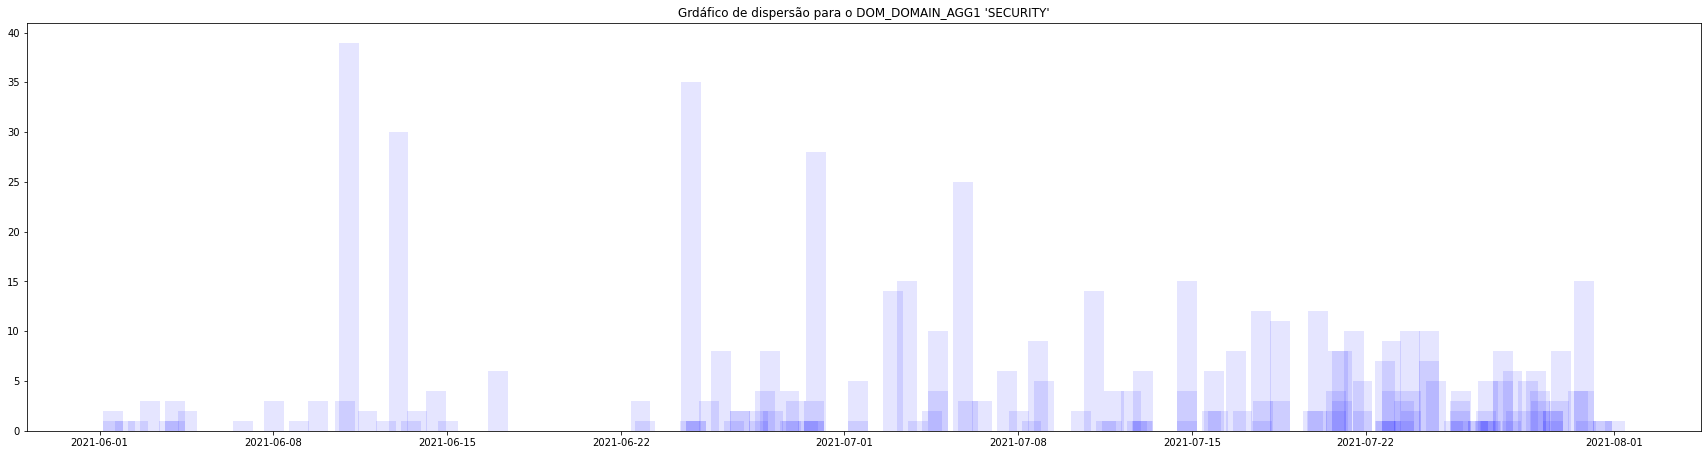

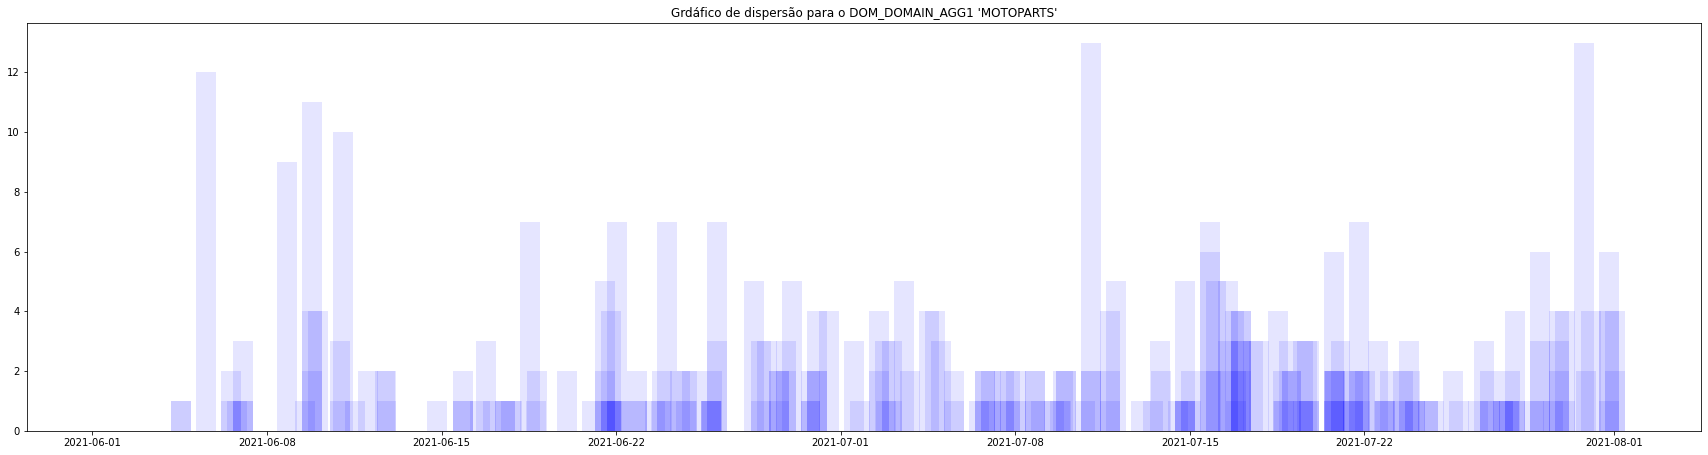

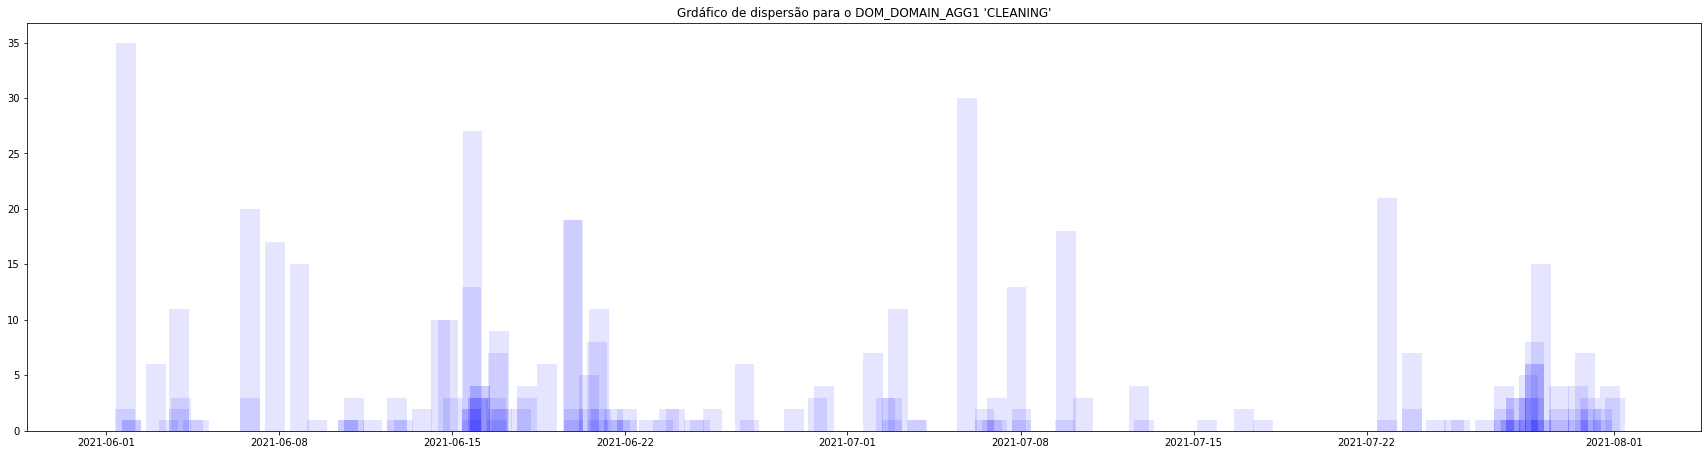

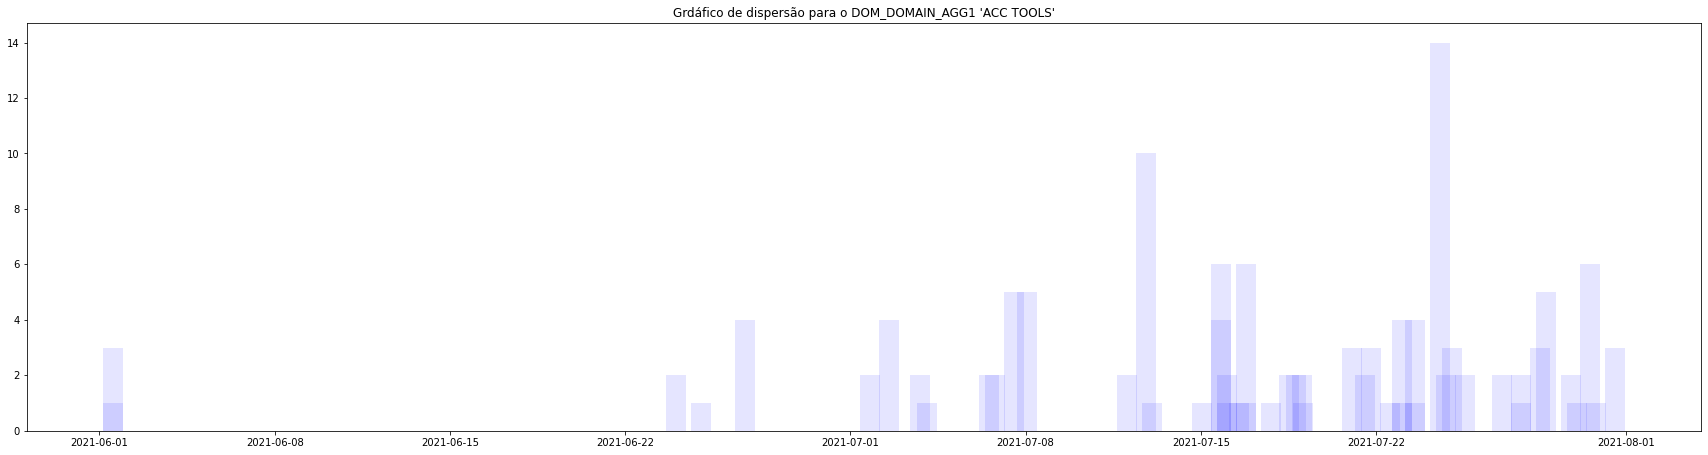

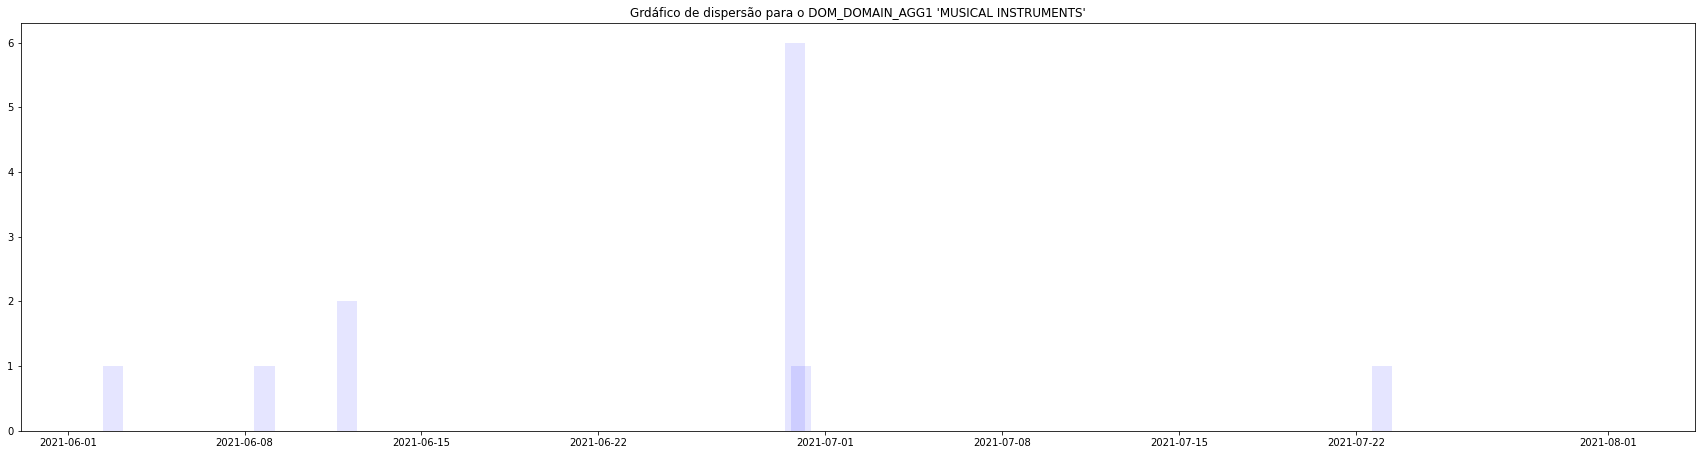

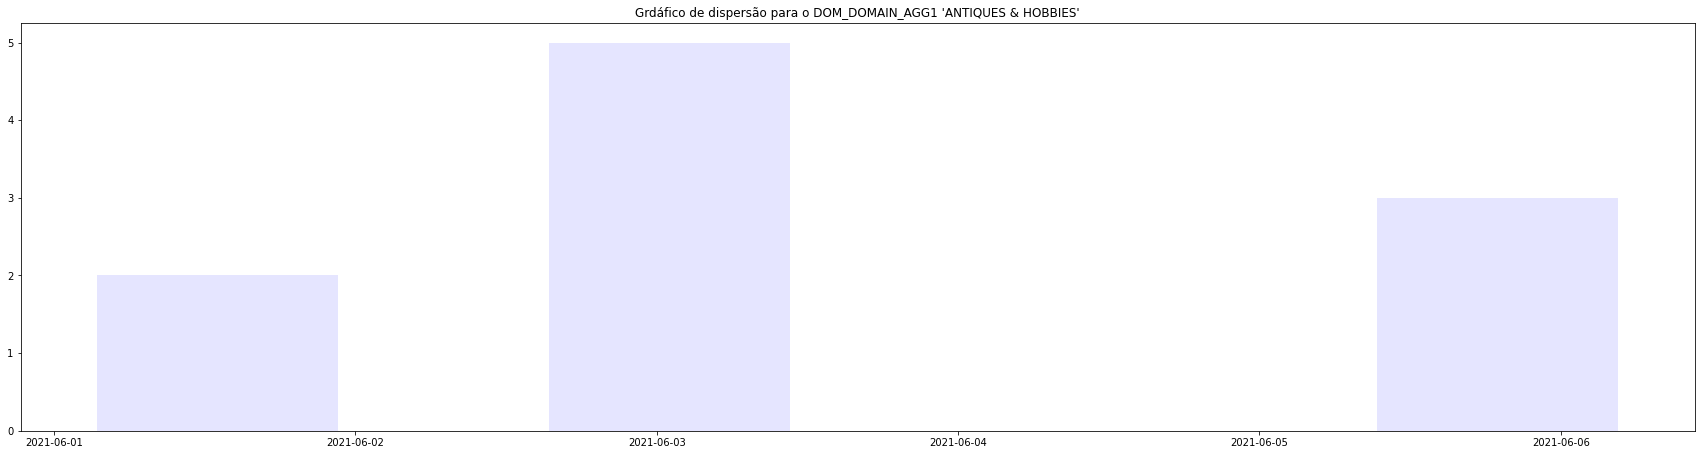

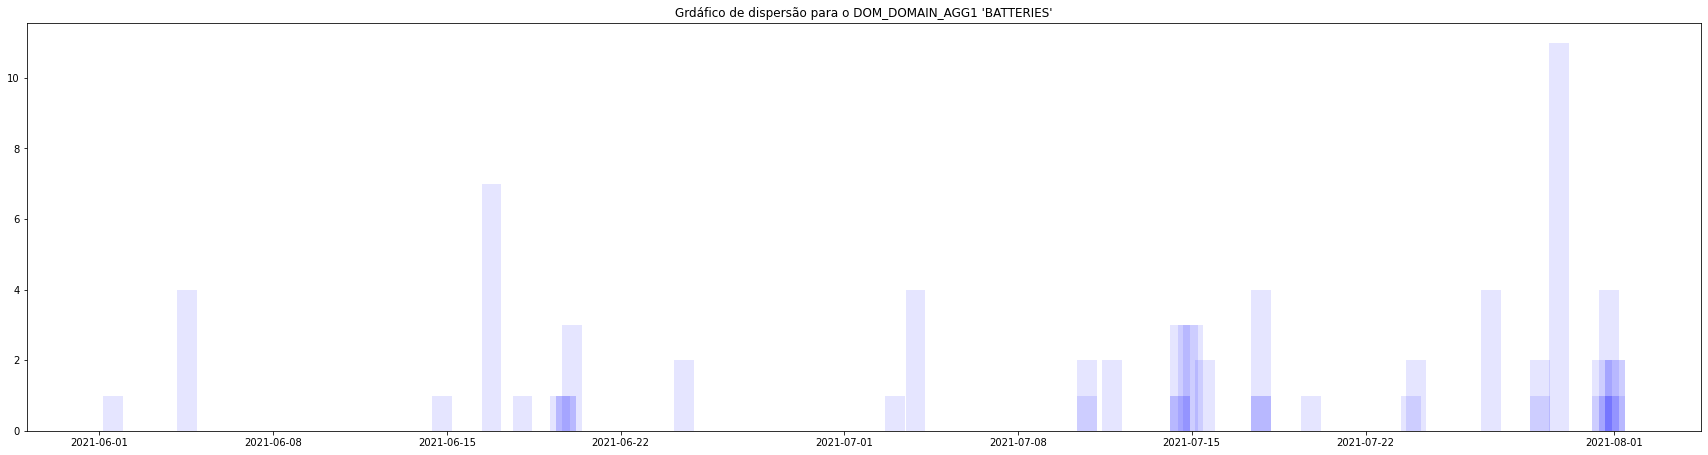

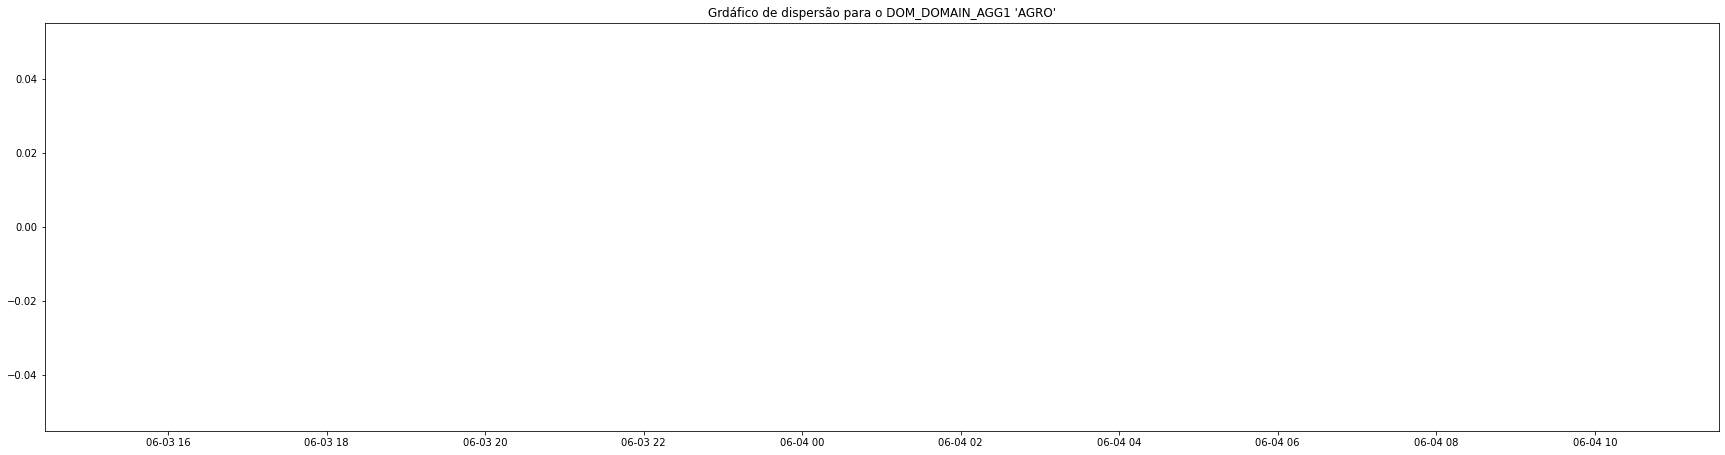

In [12]:
for dominio_agg in df_load["DOM_DOMAIN_AGG1"].unique():
    df_load_sccater = df_load.query(f"DOM_DOMAIN_AGG1 == '{dominio_agg}'")
    FIGSIZE = 30
    
    plt.figure(figsize = (FIGSIZE,FIGSIZE/4))
    x = df_load_sccater["OFFER_START_DATE"]
    y = df_load_sccater["SOLD_QUANTITY"]
    plt.title(f"Grdáfico de dispersão para o DOM_DOMAIN_AGG1 '{dominio_agg}'")
    plt.bar(x, y, color='blue', alpha = 0.1, width=0.8);

In [13]:
type(df_load['OFFER_FINISH_DTTM'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### Extração de horas do Timestamp

In [14]:
df_load["HOUR"] = df_load['OFFER_FINISH_DTTM'].dt.hour
df_load.head(3)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,HOUR
0,2021-06-22 19:00:02+00:00,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5,5,0.00,0.0,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,19
1,2021-06-22 13:00:01+00:00,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,15,12,10.73,3.0,COMPUTERS,CE,MLM-SPEAKERS,13
2,2021-06-23 01:36:12+00:00,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,15,13,7.03,2.0,COMPUTERS,CE,MLM-HEADPHONES,1


## Análise temporal - Horas do dia

C:\Users\Marcelo DL\AppData\Local\Temp\ipykernel_13096\1621409331.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (FIGSIZE,FIGSIZE/4))


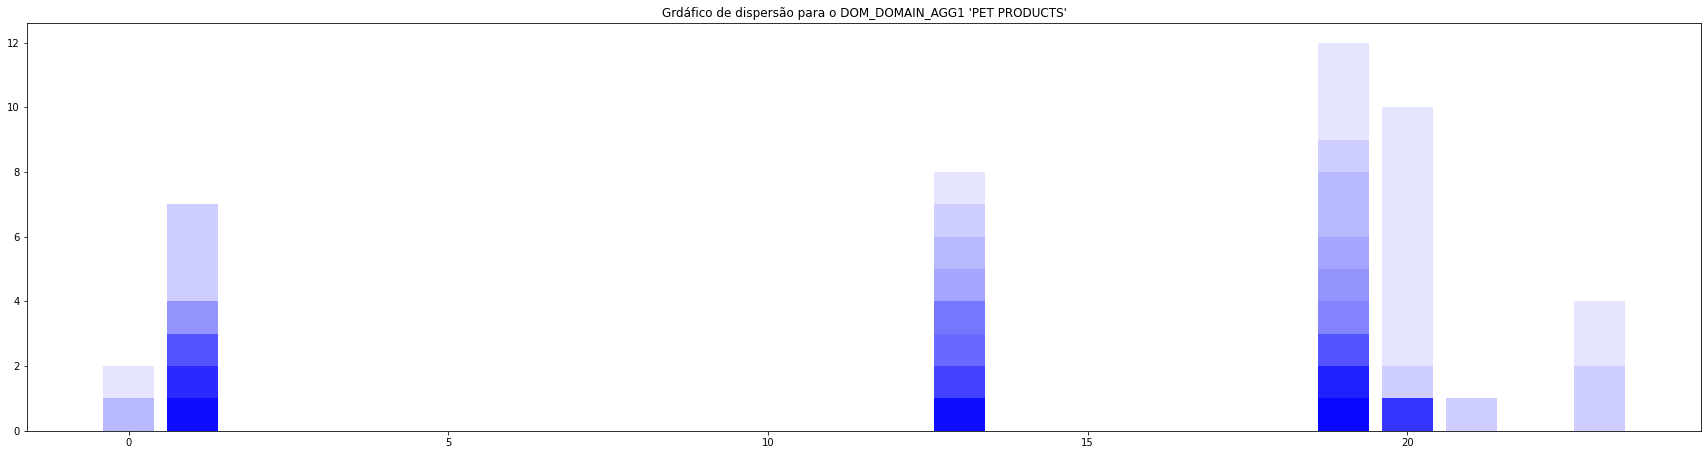

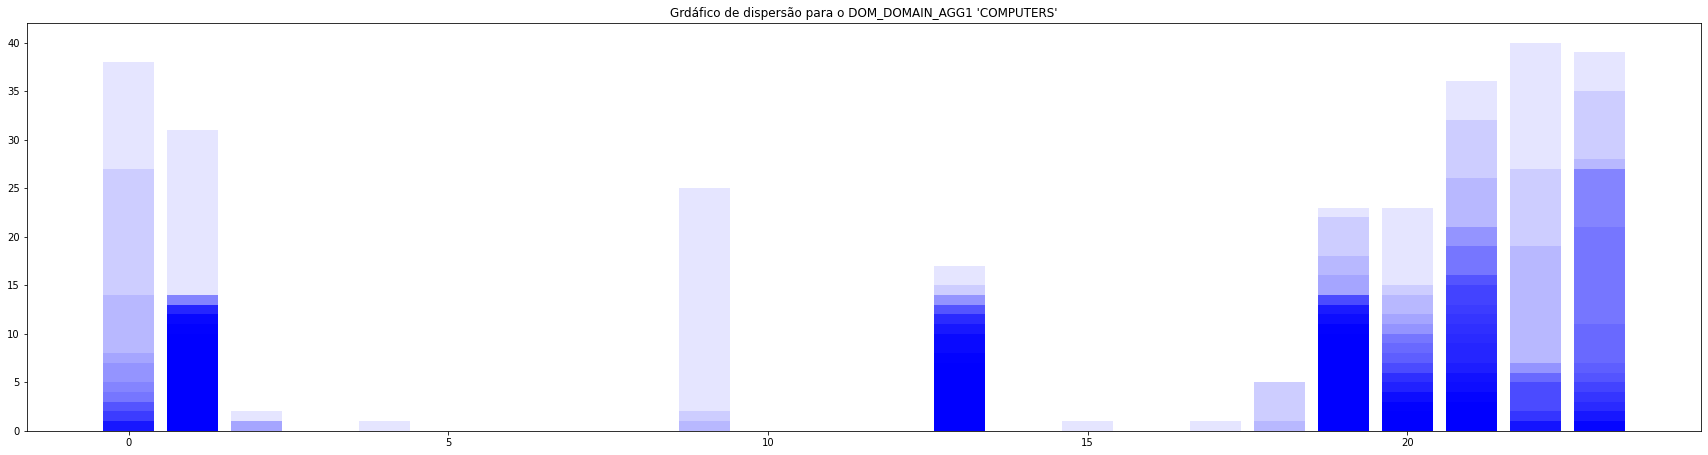

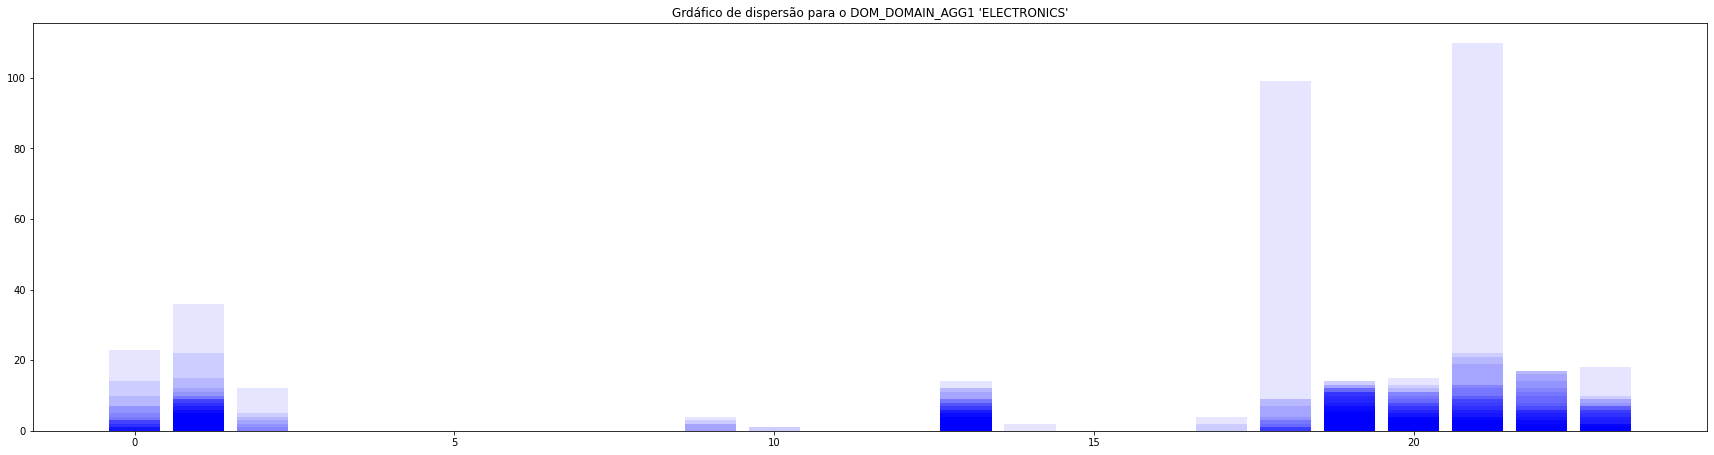

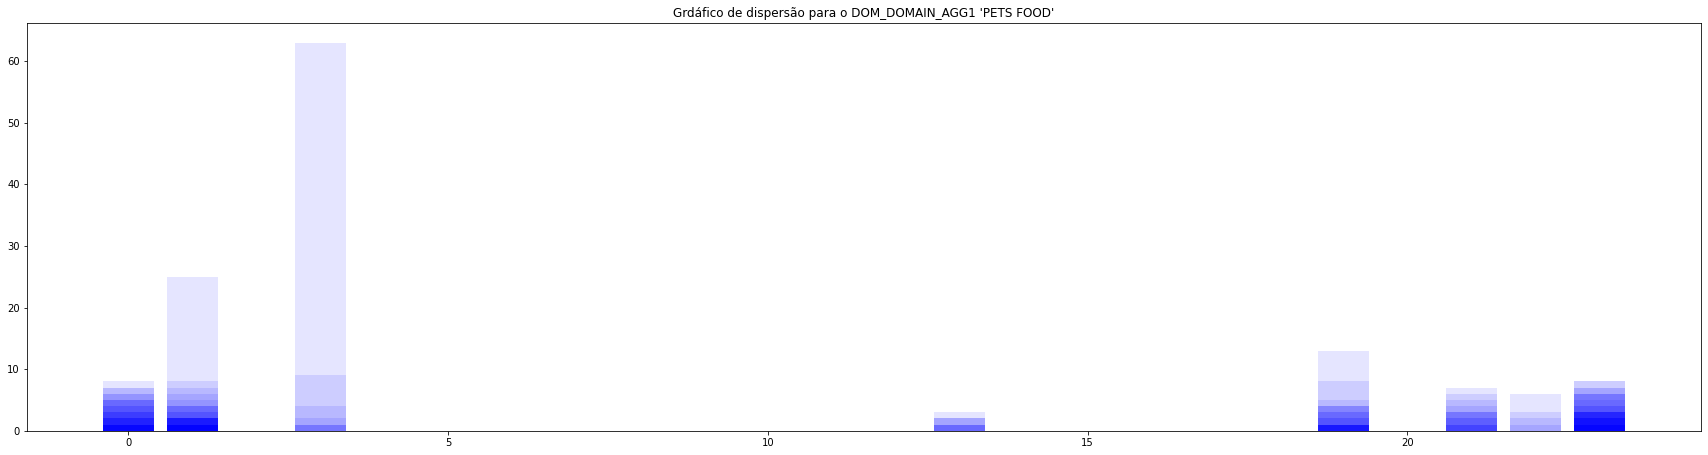

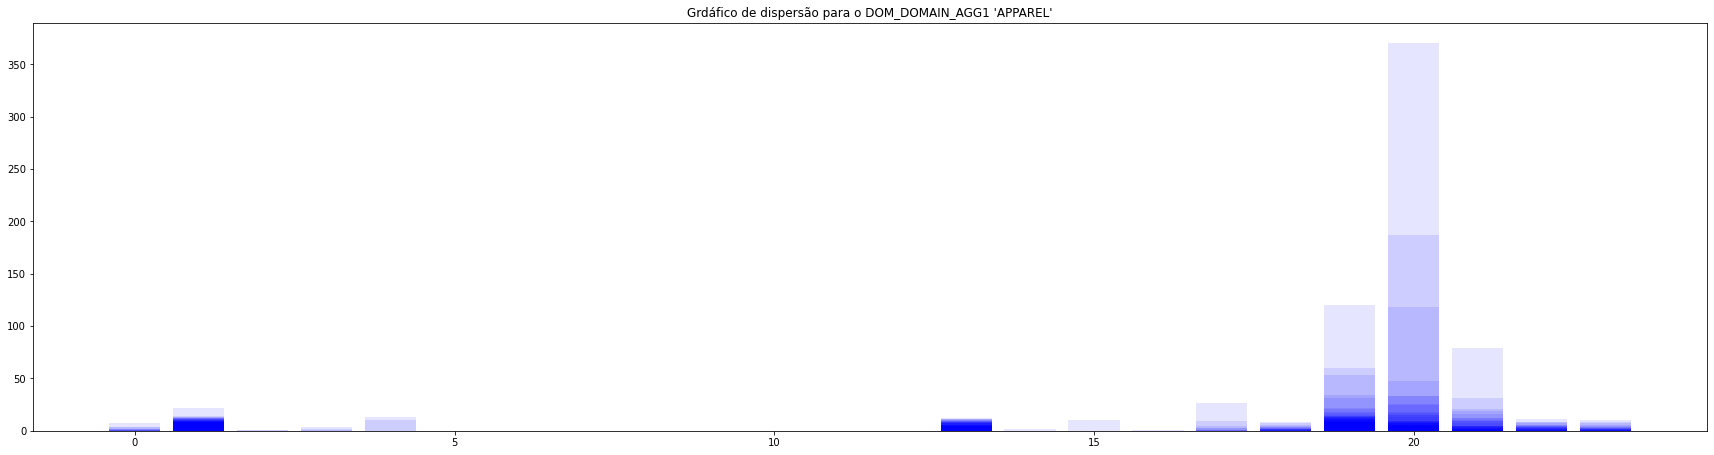

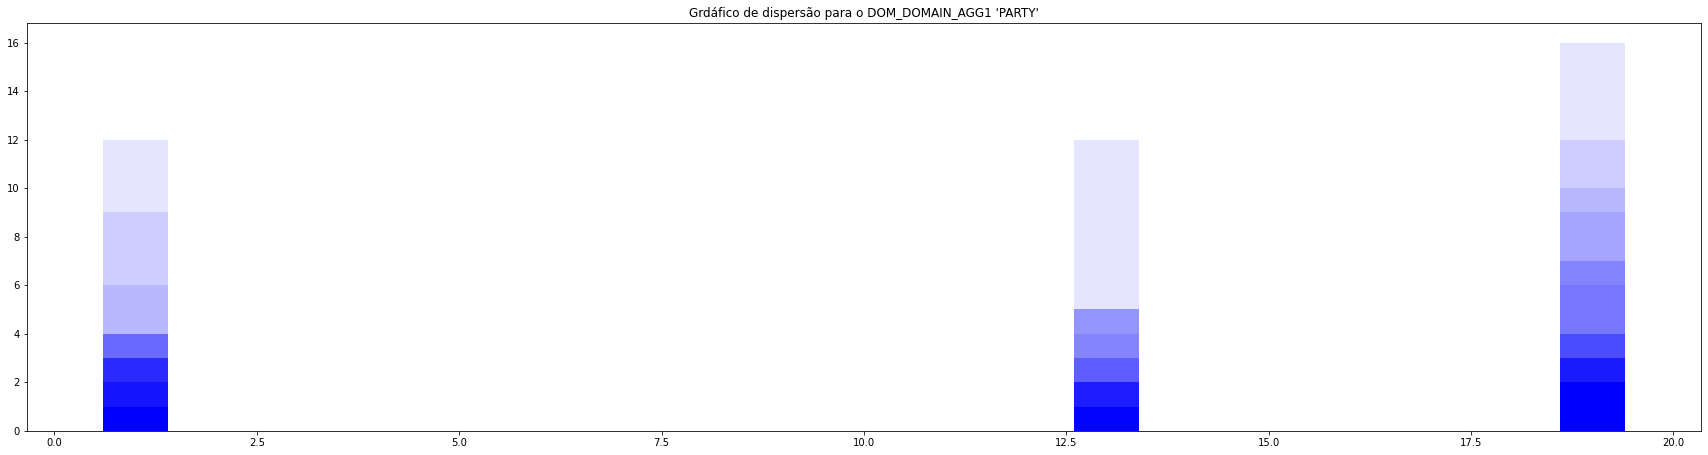

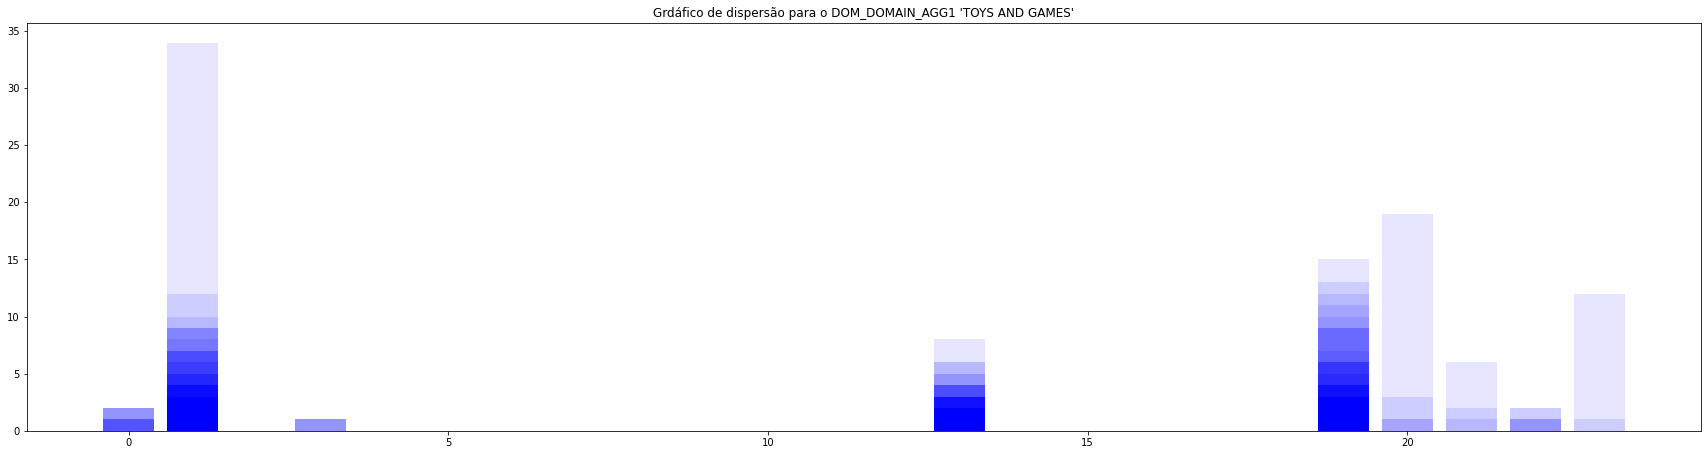

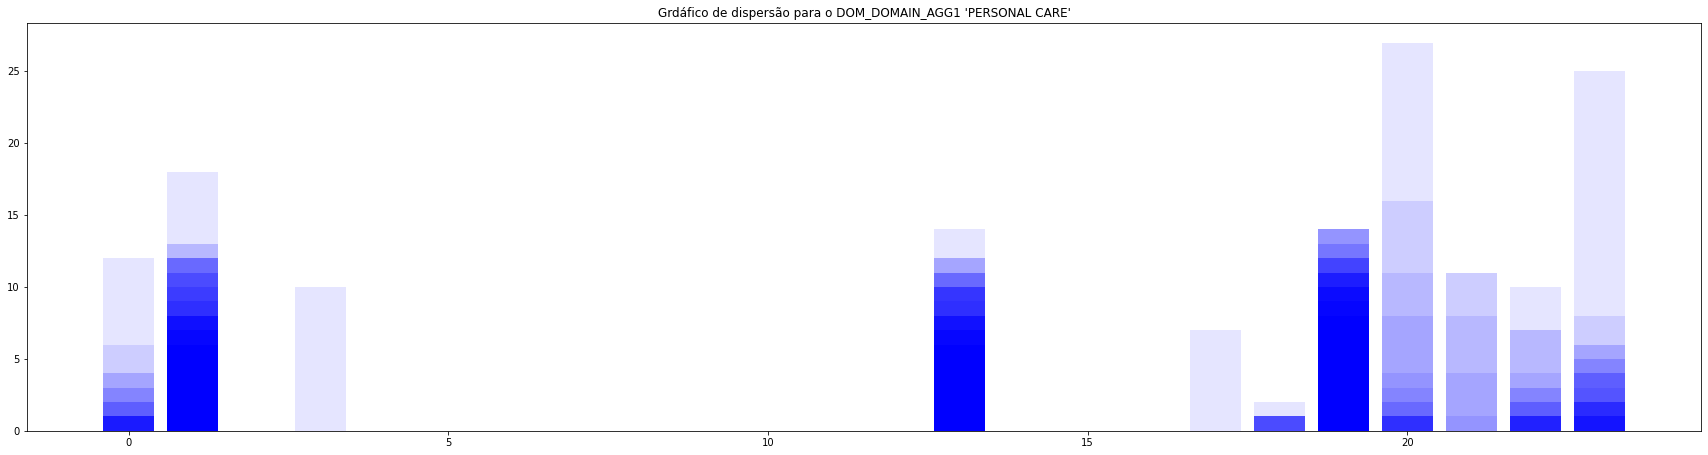

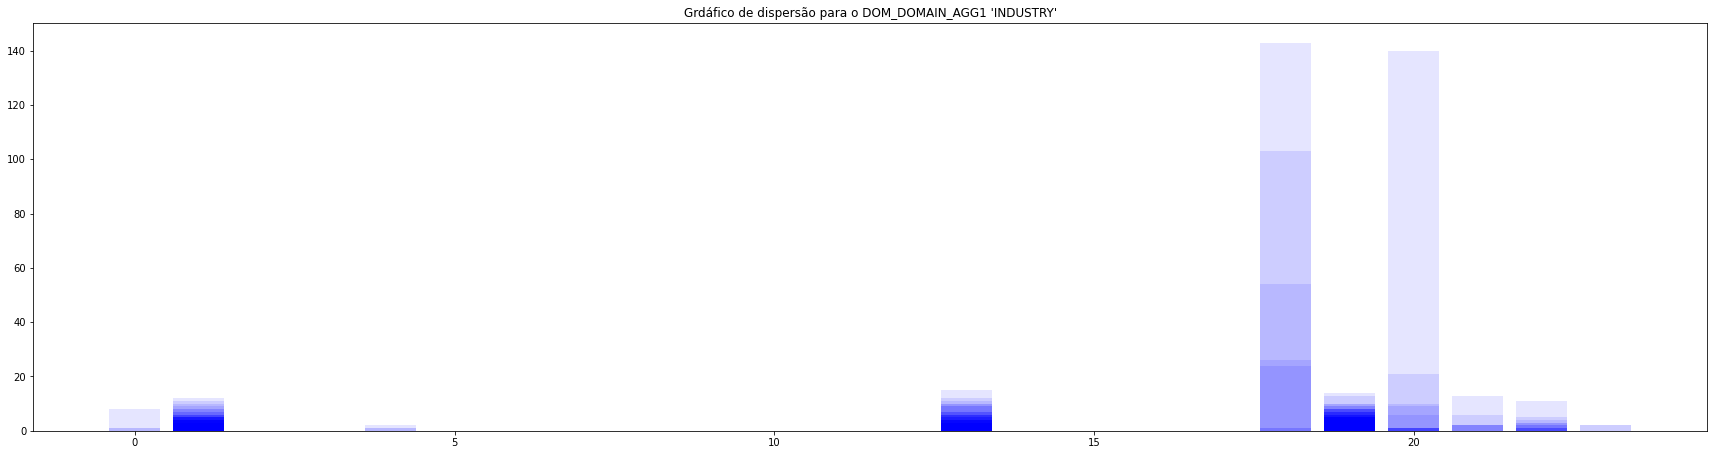

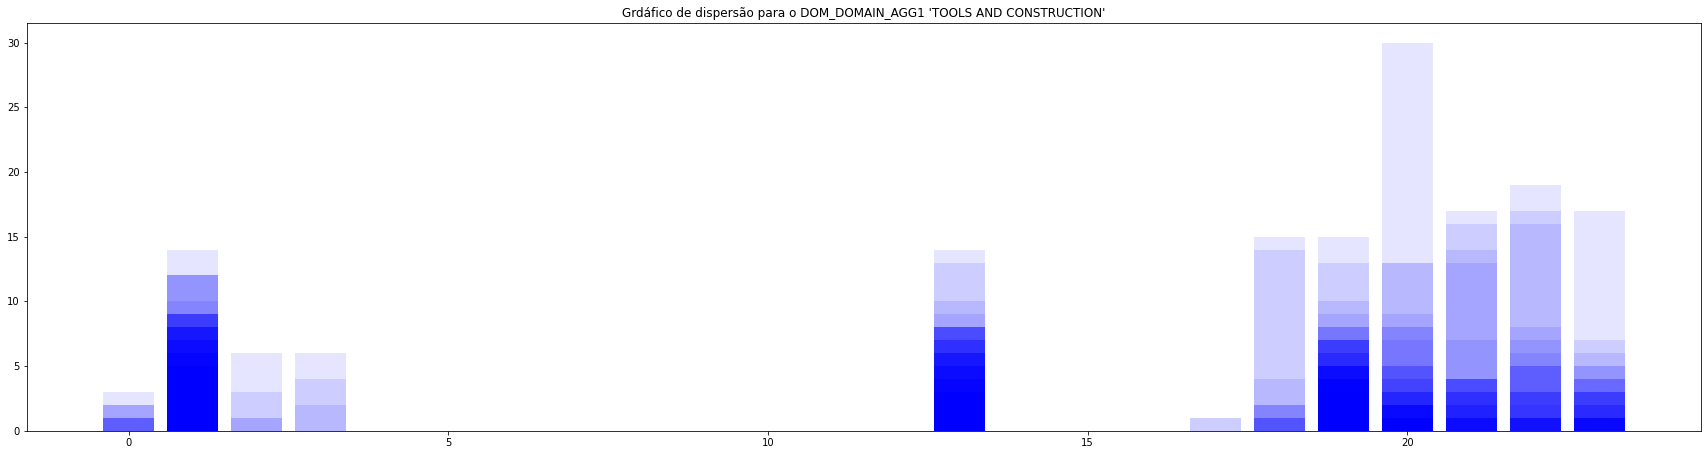

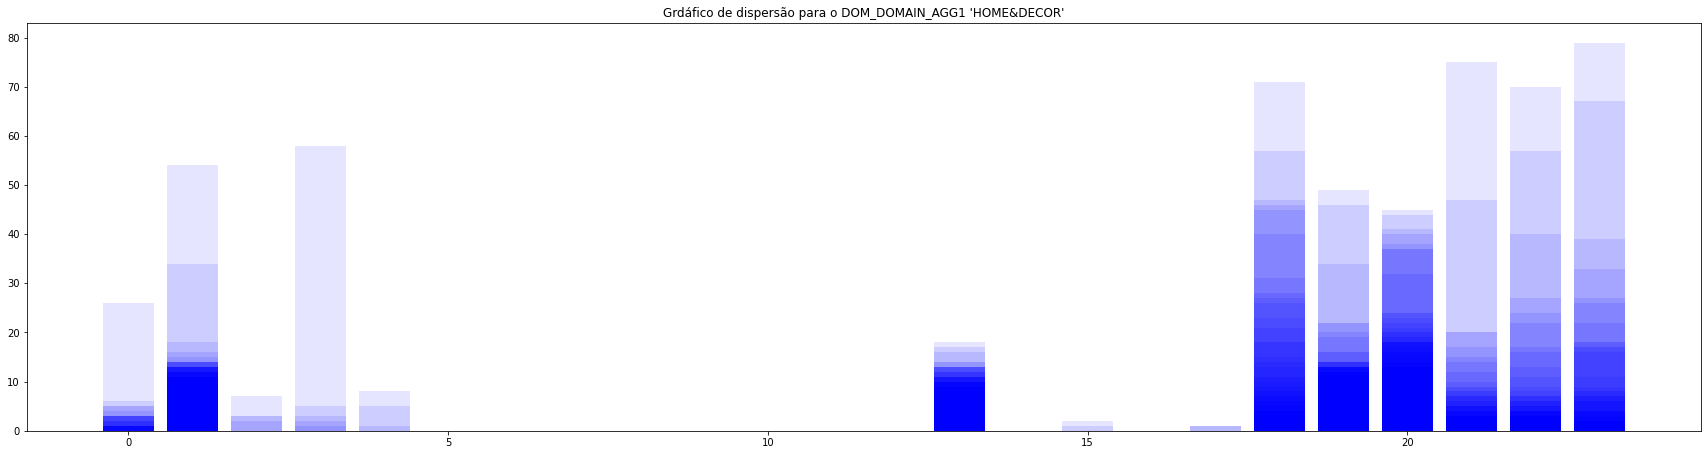

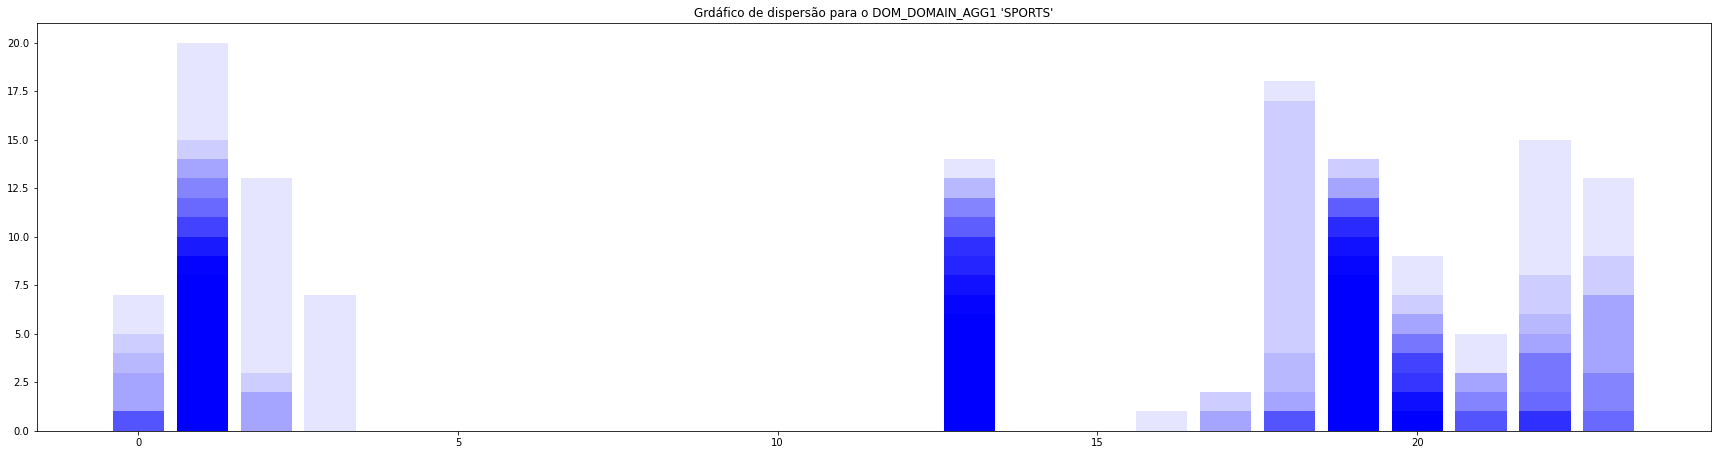

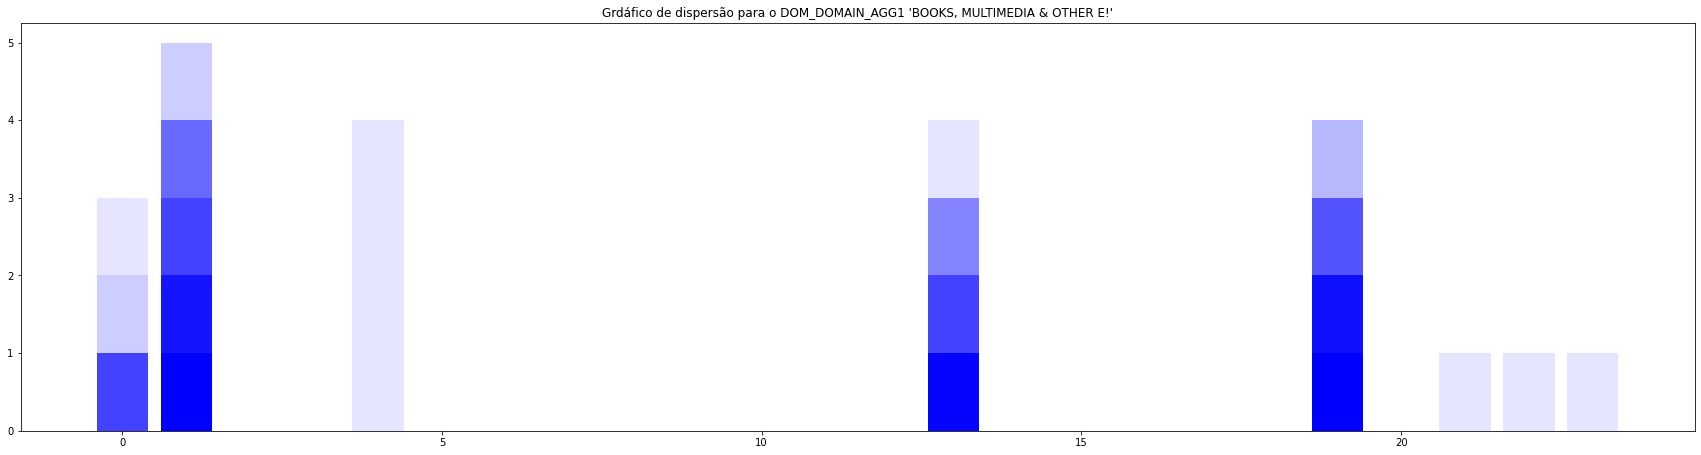

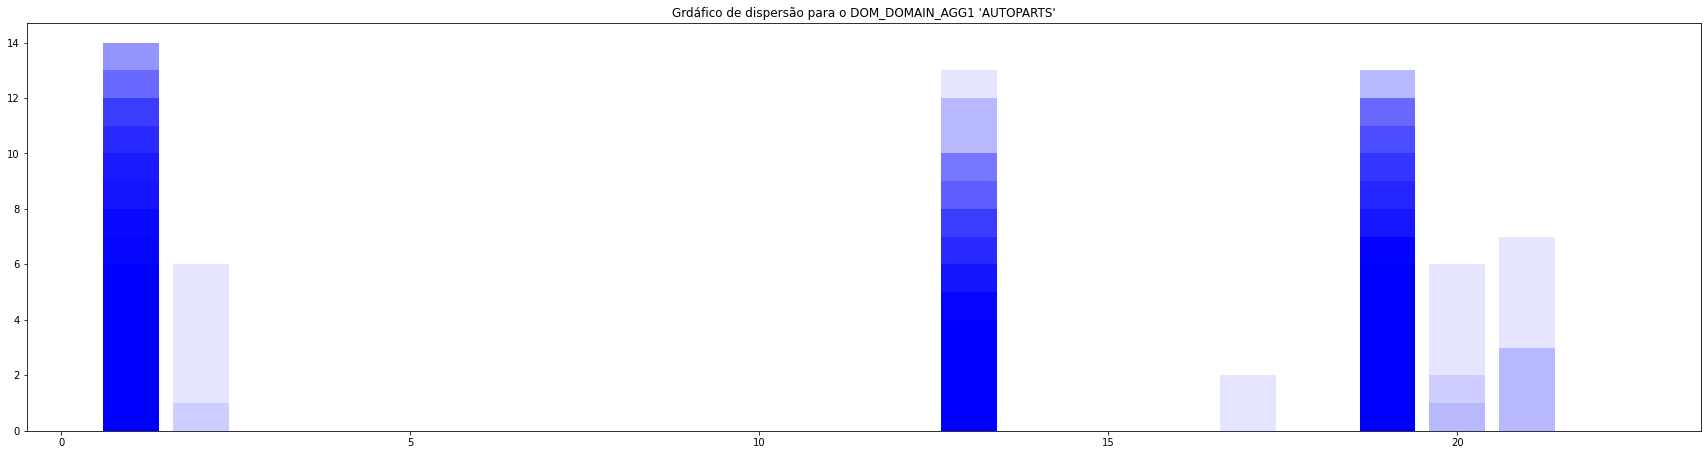

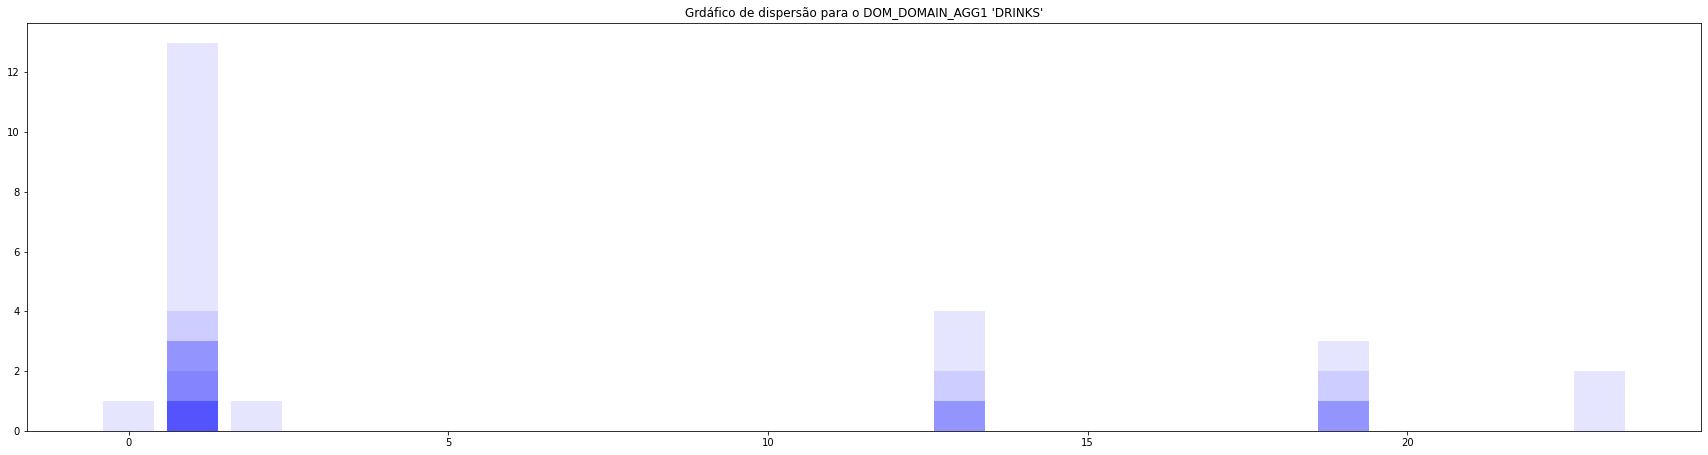

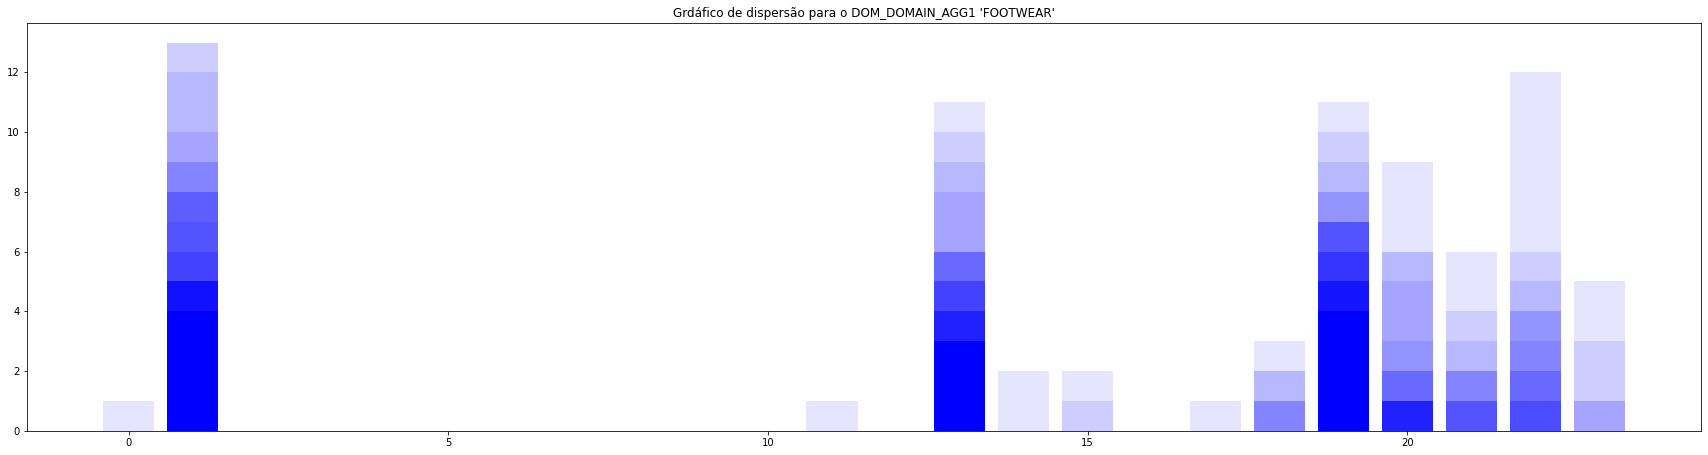

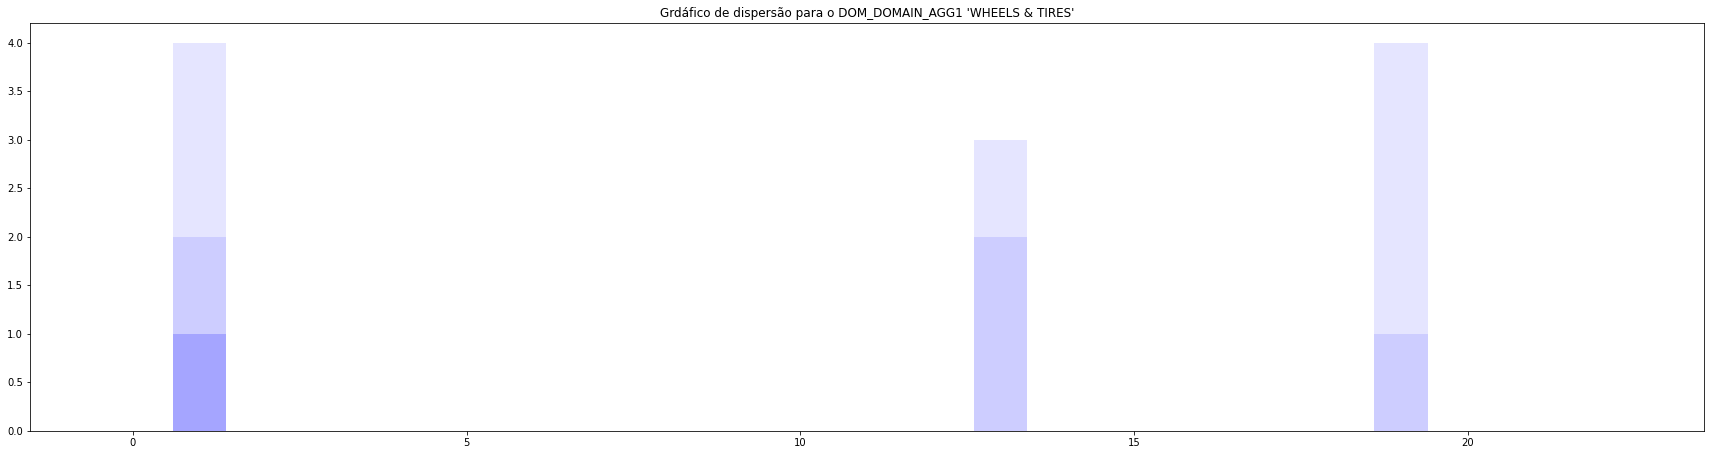

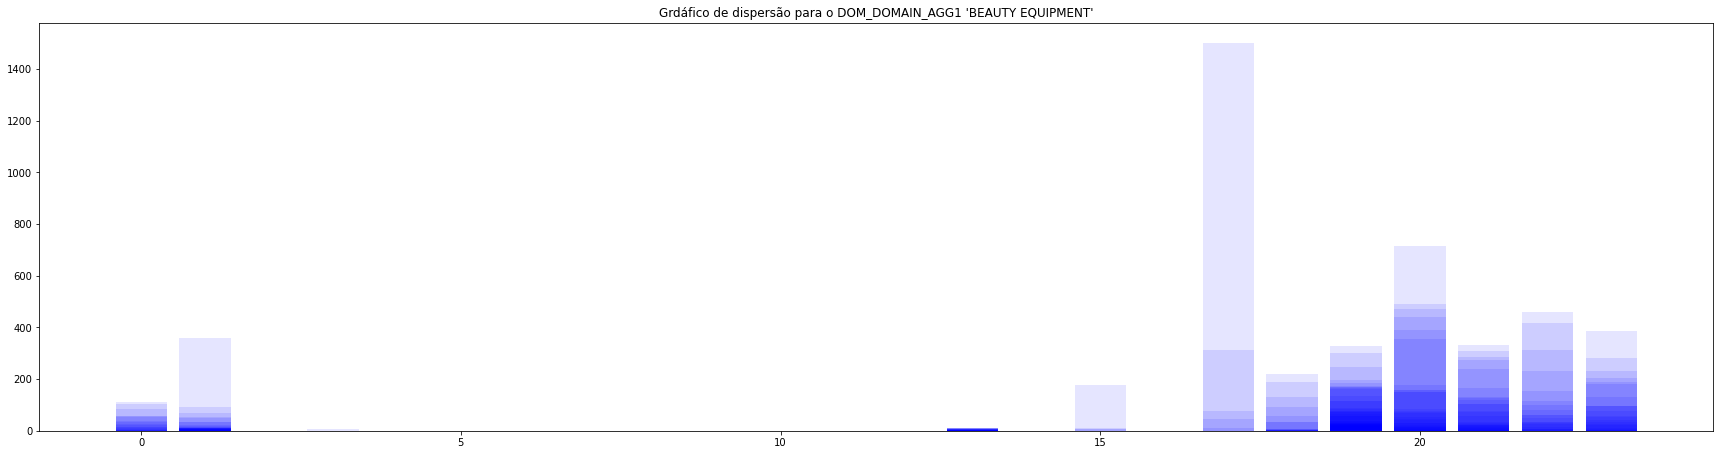

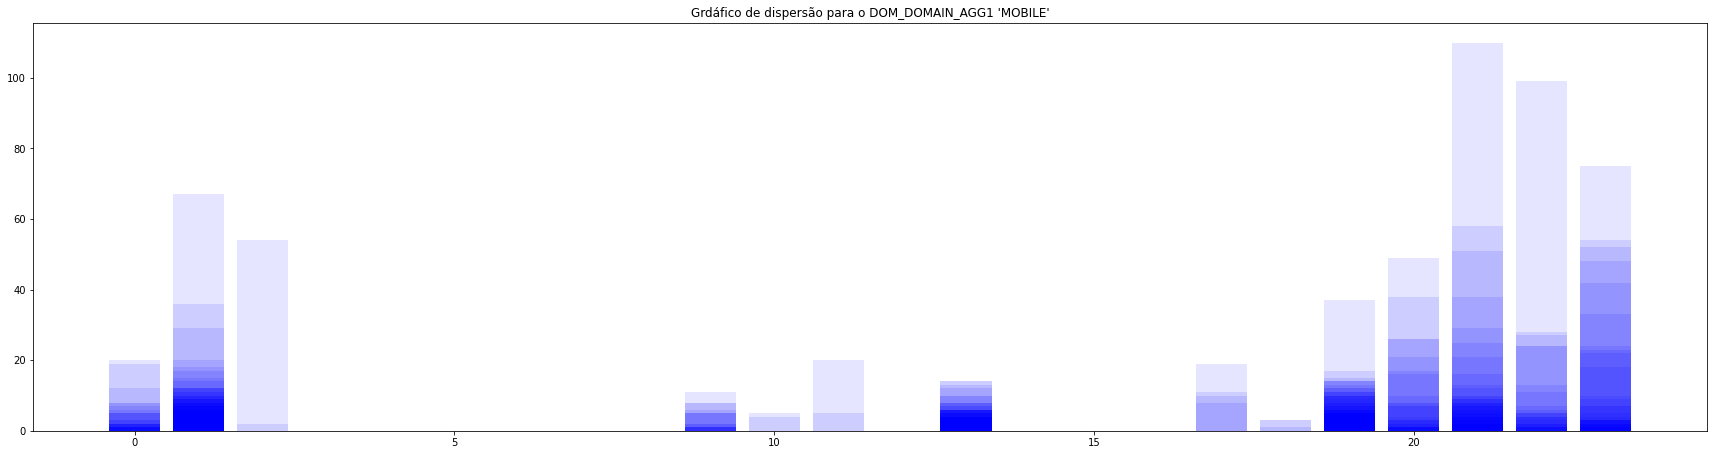

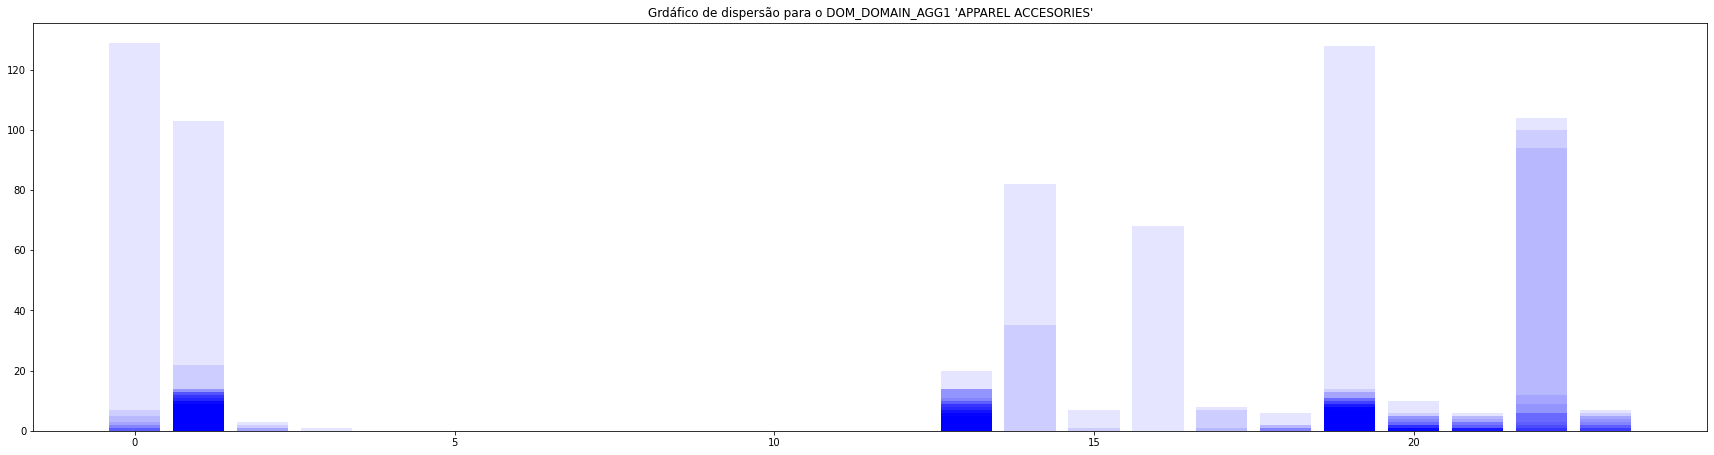

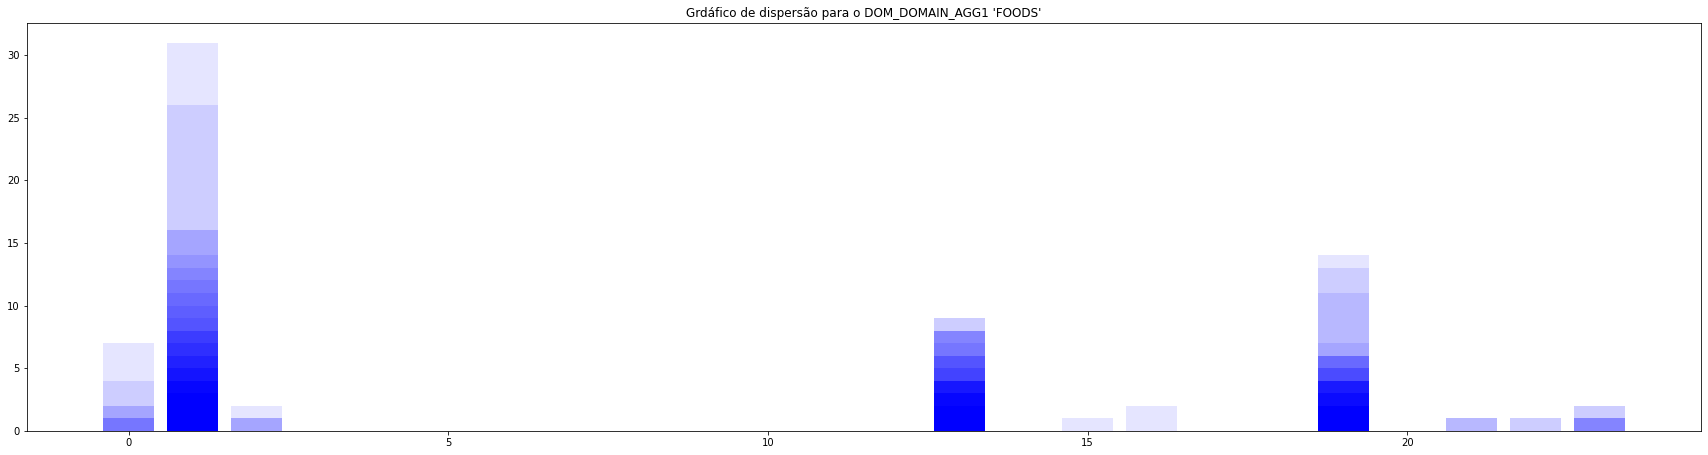

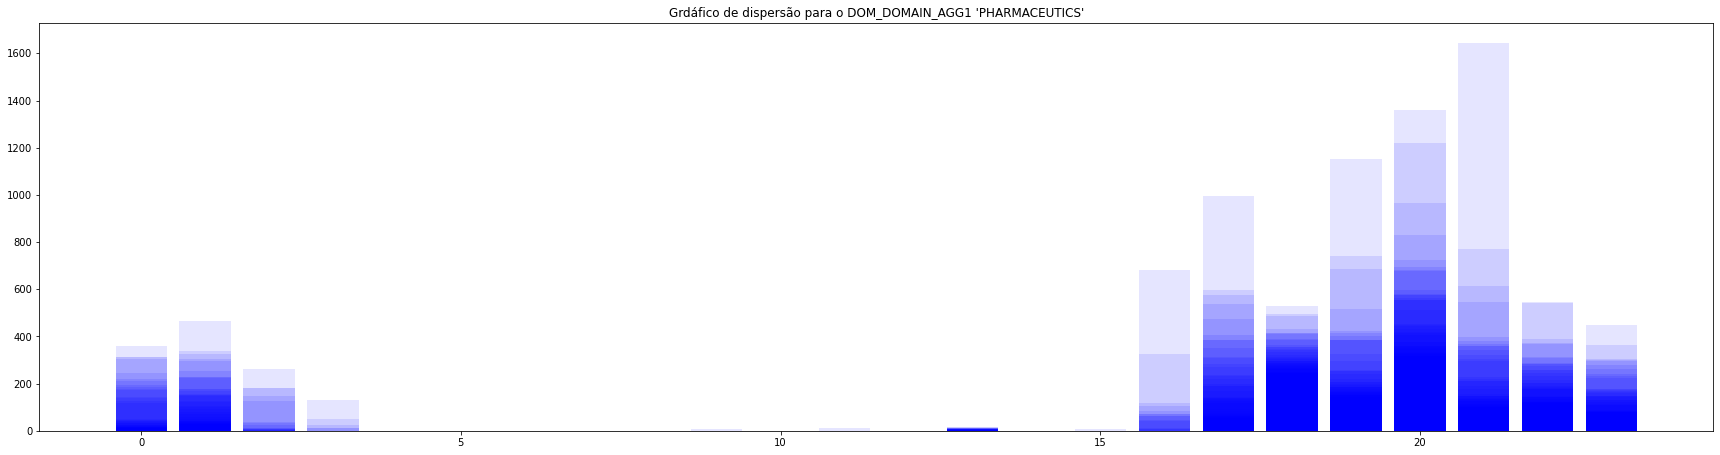

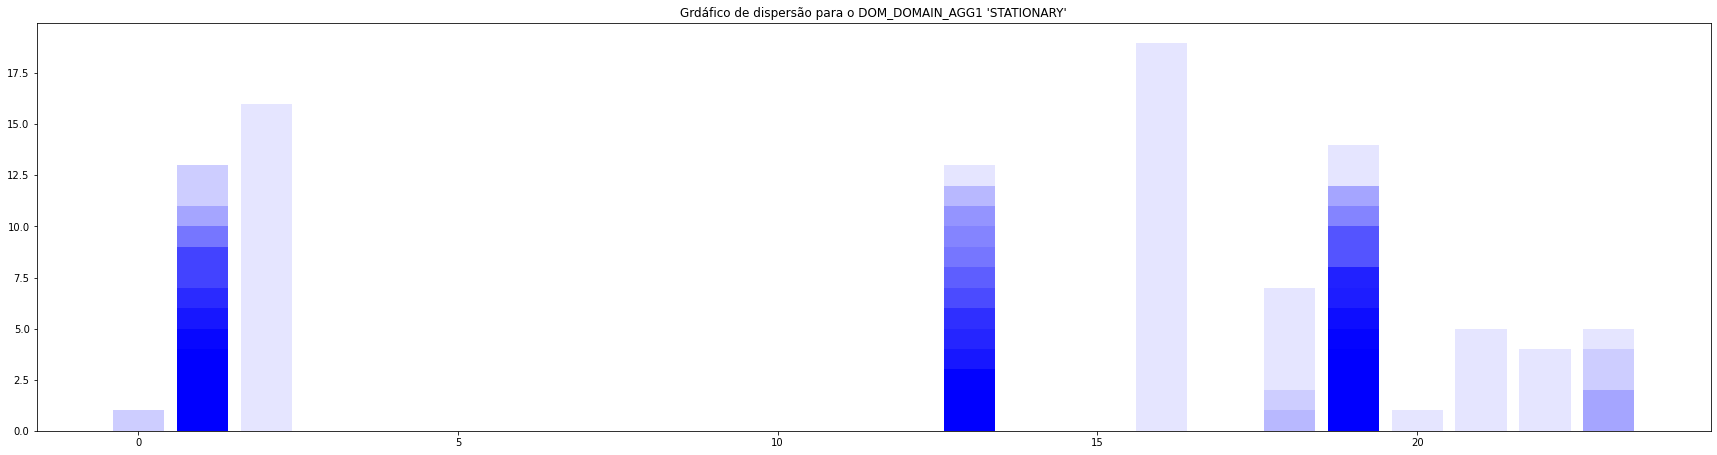

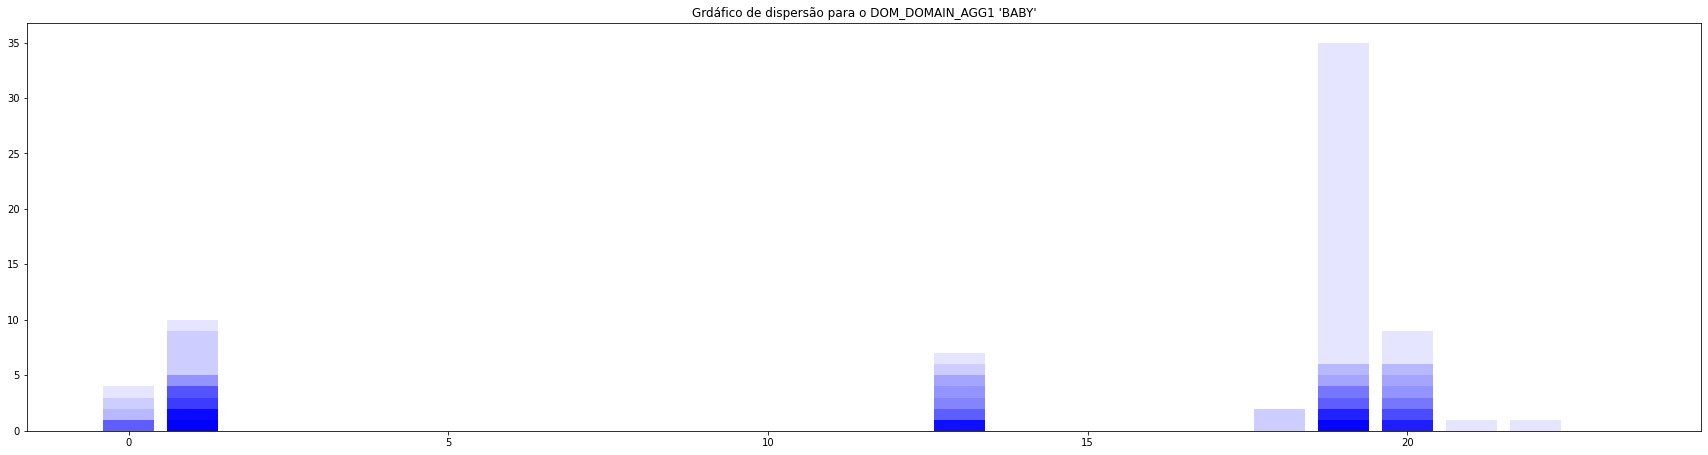

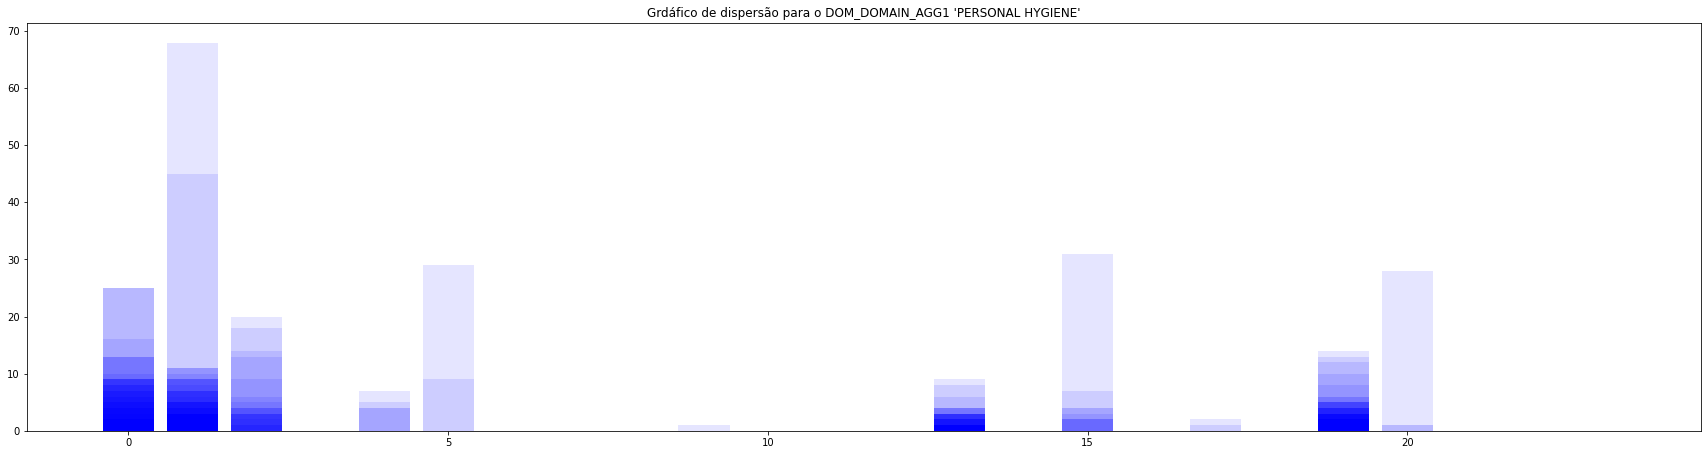

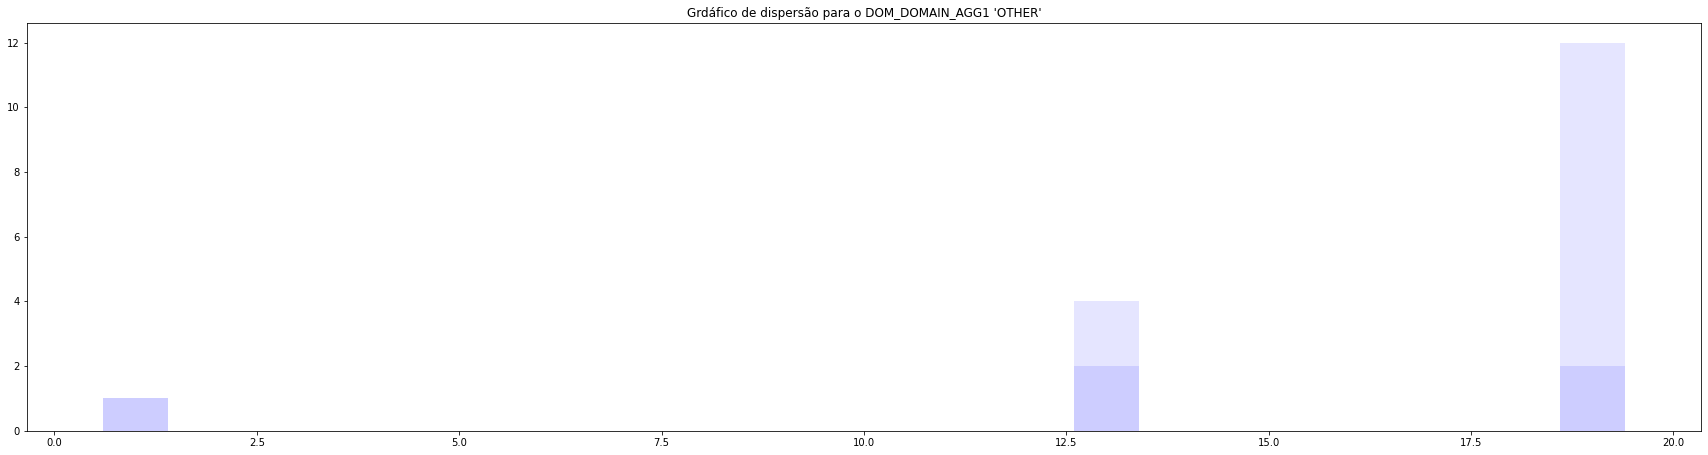

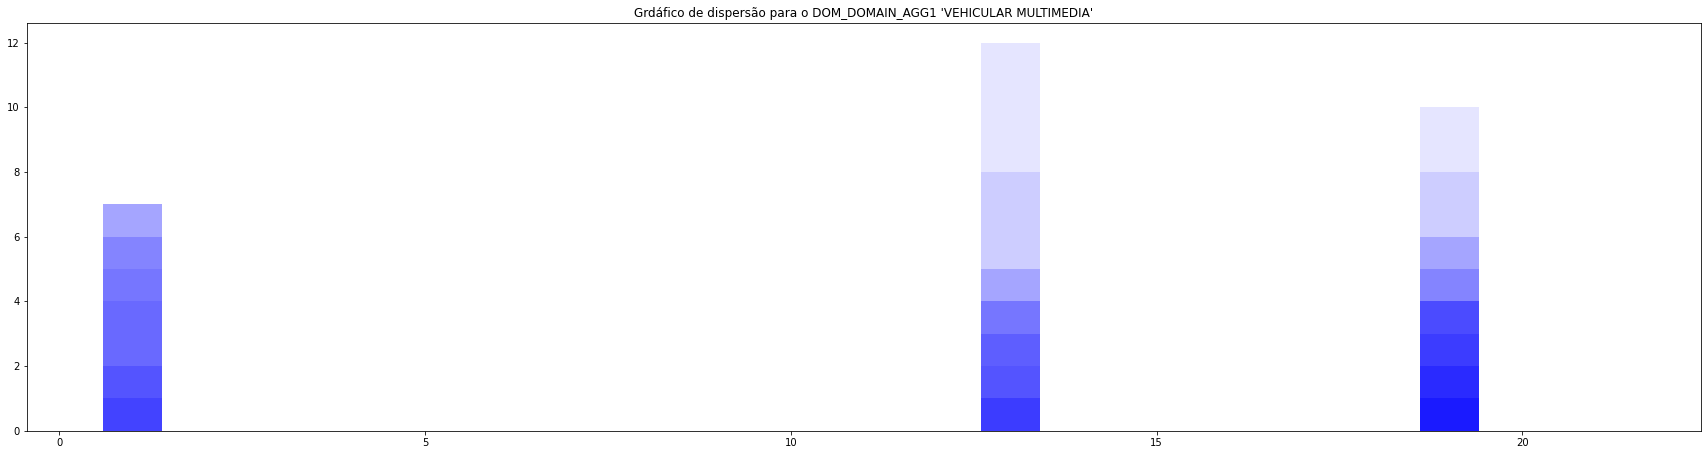

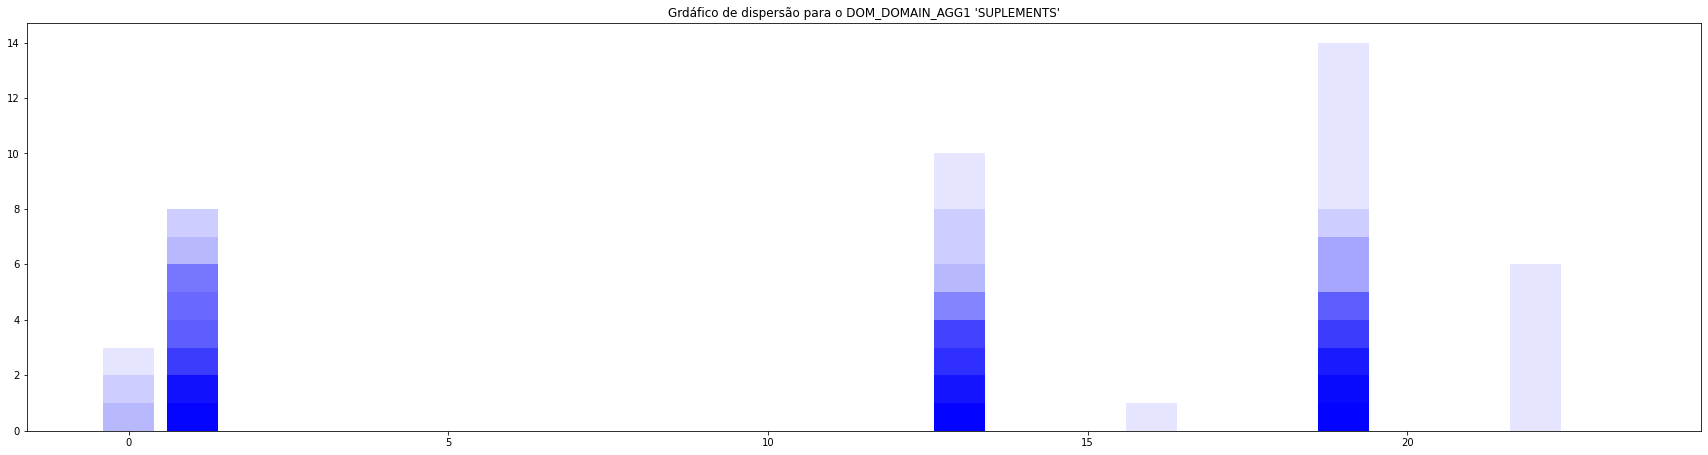

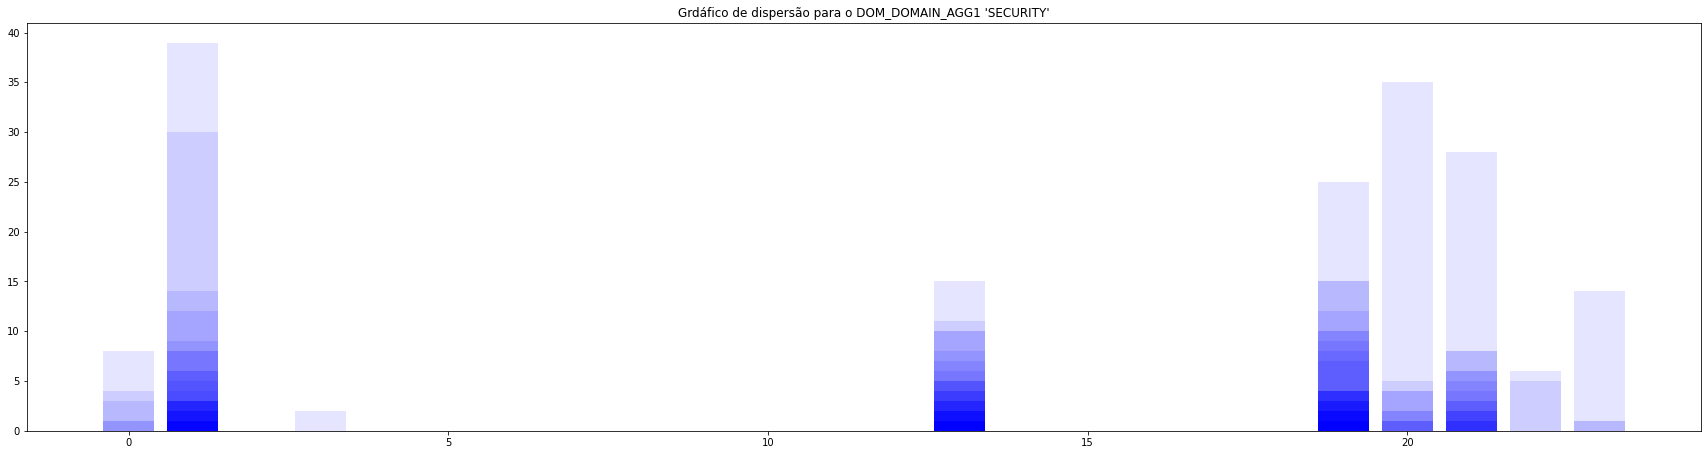

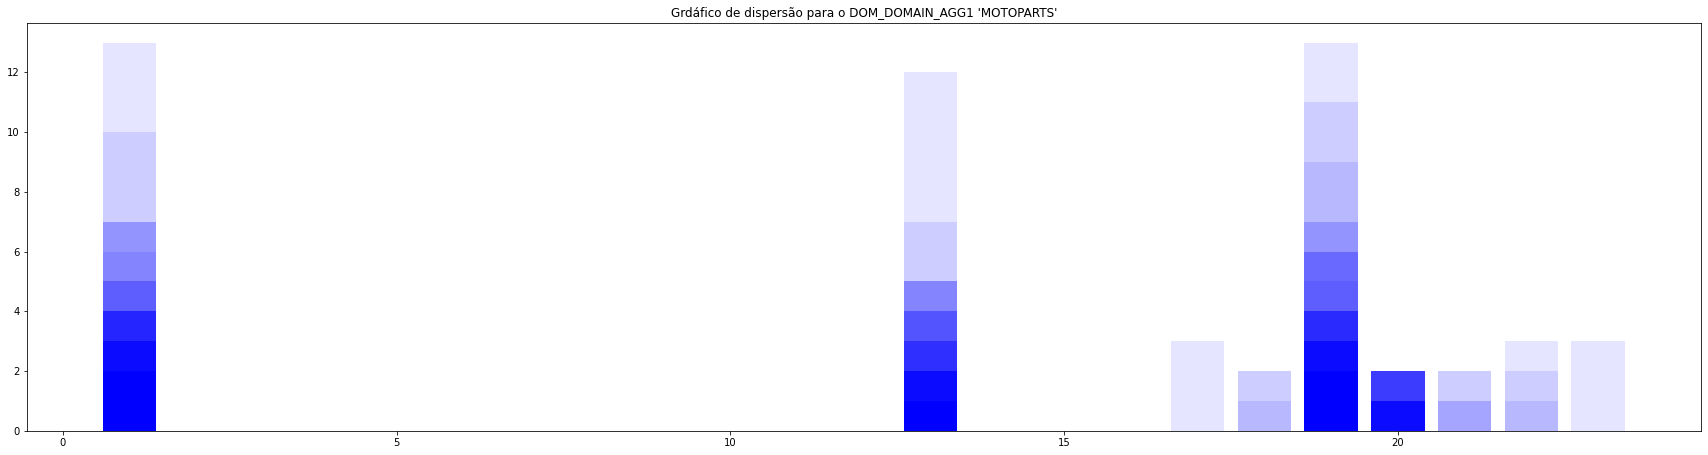

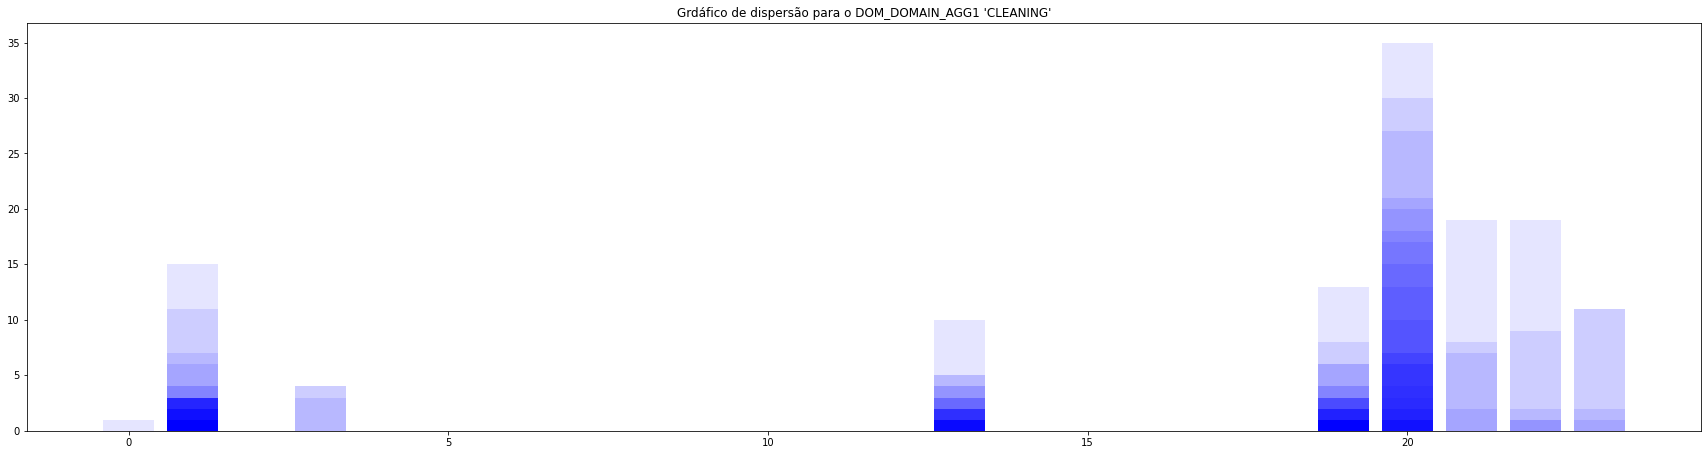

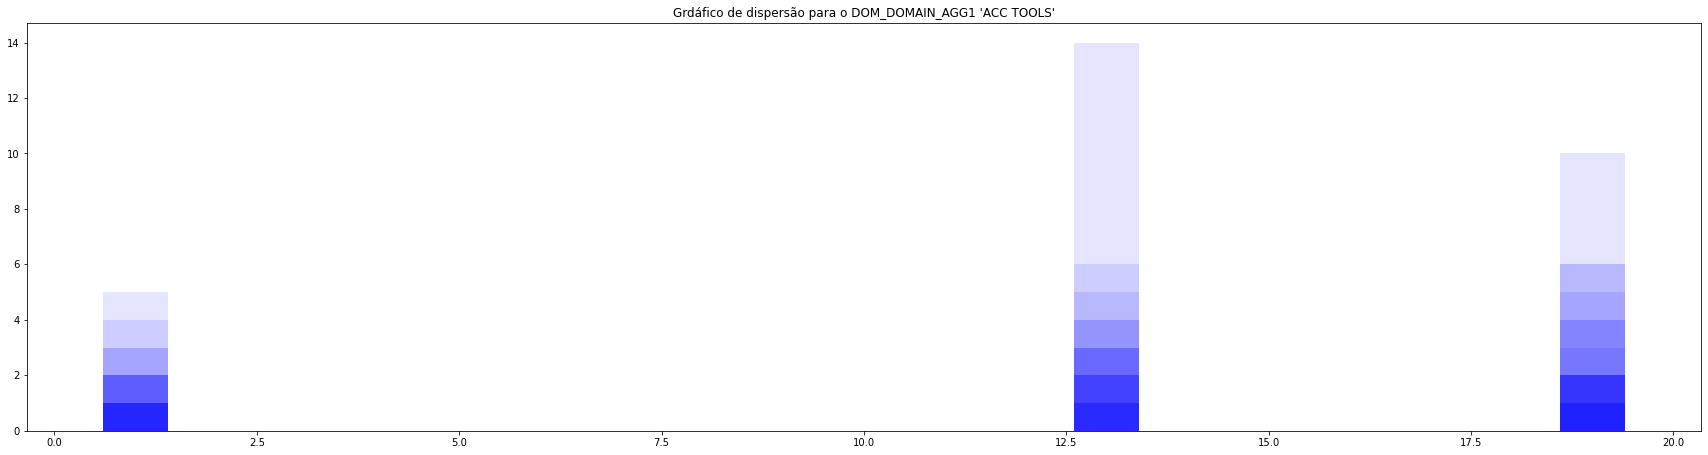

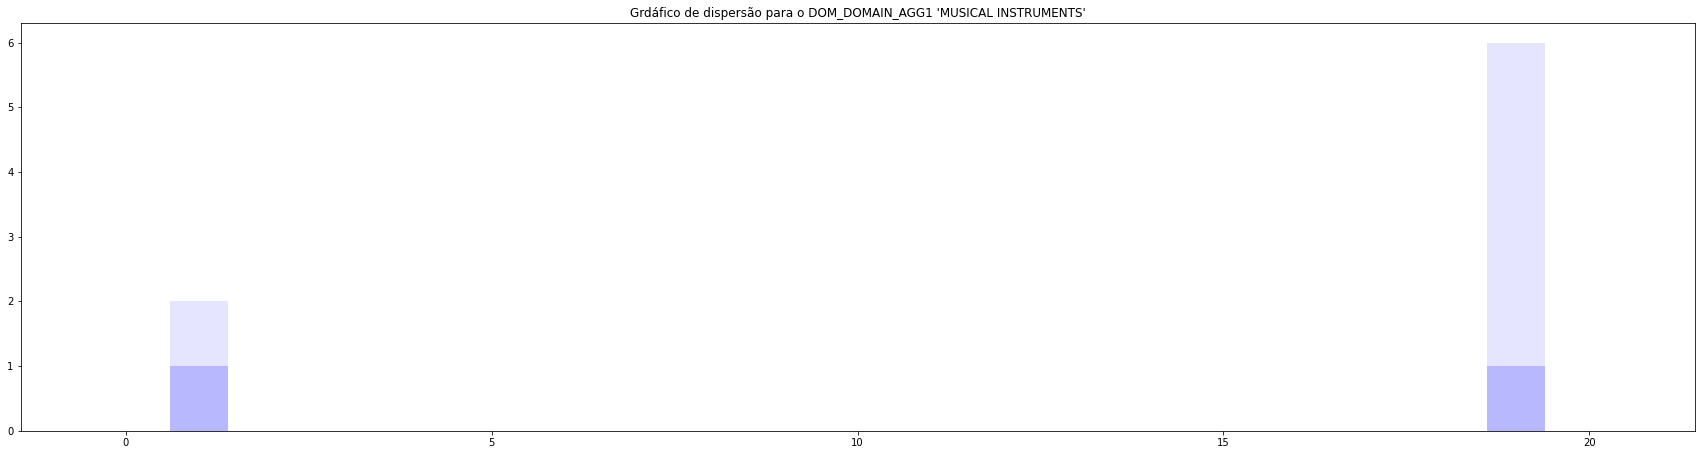

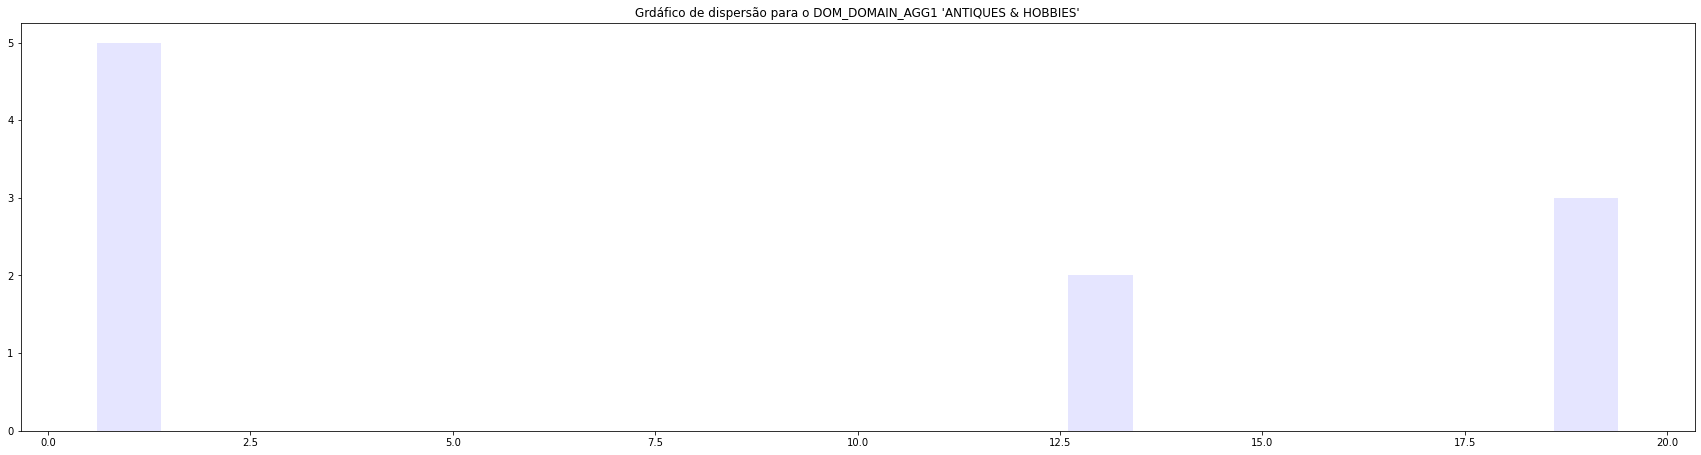

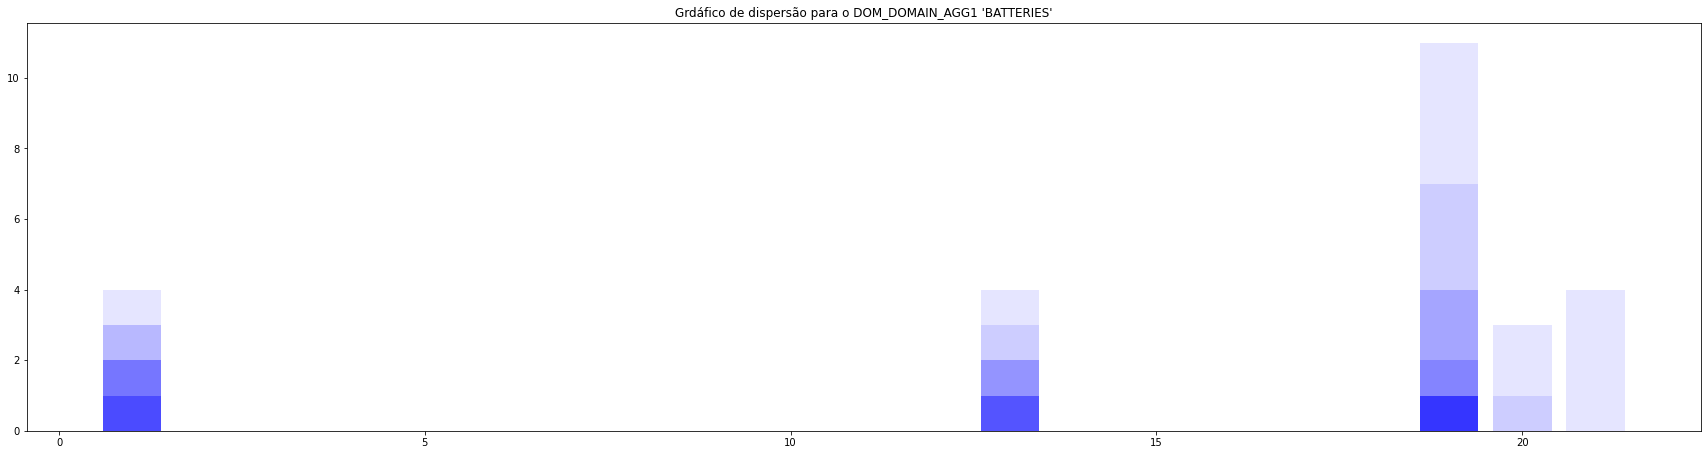

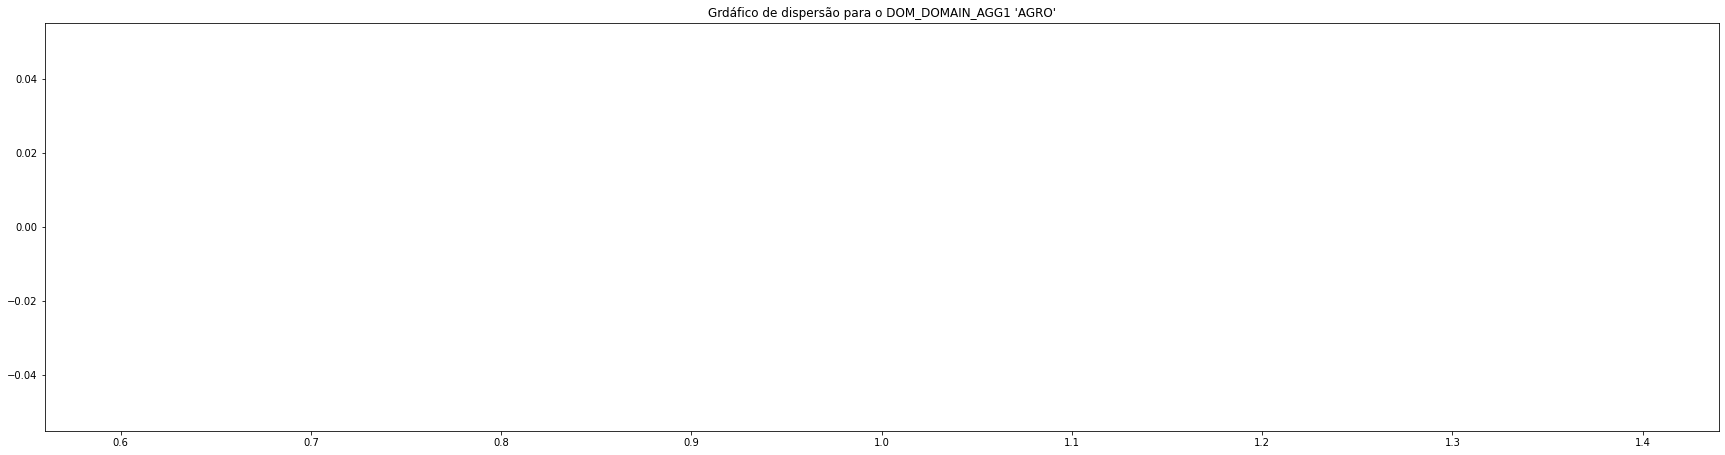

In [15]:
for dominio_agg in df_load["DOM_DOMAIN_AGG1"].unique():
    df_load_sccater = df_load.query(f"DOM_DOMAIN_AGG1 == '{dominio_agg}'")
    FIGSIZE = 30
    plt.figure(figsize = (FIGSIZE,FIGSIZE/4))
    x = df_load_sccater["HOUR"]
    y = df_load_sccater["SOLD_QUANTITY"]
    plt.title(f"Grdáfico de dispersão para o DOM_DOMAIN_AGG1 '{dominio_agg}'")
    plt.bar(x, y, color='blue', alpha = 0.1);

#### Extração do dia da semana do Timestamp

In [16]:
df_load["WEEK_DAY"] = df_load['OFFER_FINISH_DTTM'].dt.day_name()
df_load.head(3)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,HOUR,WEEK_DAY
0,2021-06-22 19:00:02+00:00,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,5,5,0.00,0.0,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,19,Tuesday
1,2021-06-22 13:00:01+00:00,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,15,12,10.73,3.0,COMPUTERS,CE,MLM-SPEAKERS,13,Tuesday
2,2021-06-23 01:36:12+00:00,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,15,13,7.03,2.0,COMPUTERS,CE,MLM-HEADPHONES,1,Wednesday


## Análise temporal - dias da semana

In [17]:
df_load_week = df_load.groupby(["WEEK_DAY"],as_index=False)["SOLD_QUANTITY"].count()#.sort_values(by=['SOLD_QUANTITY'])

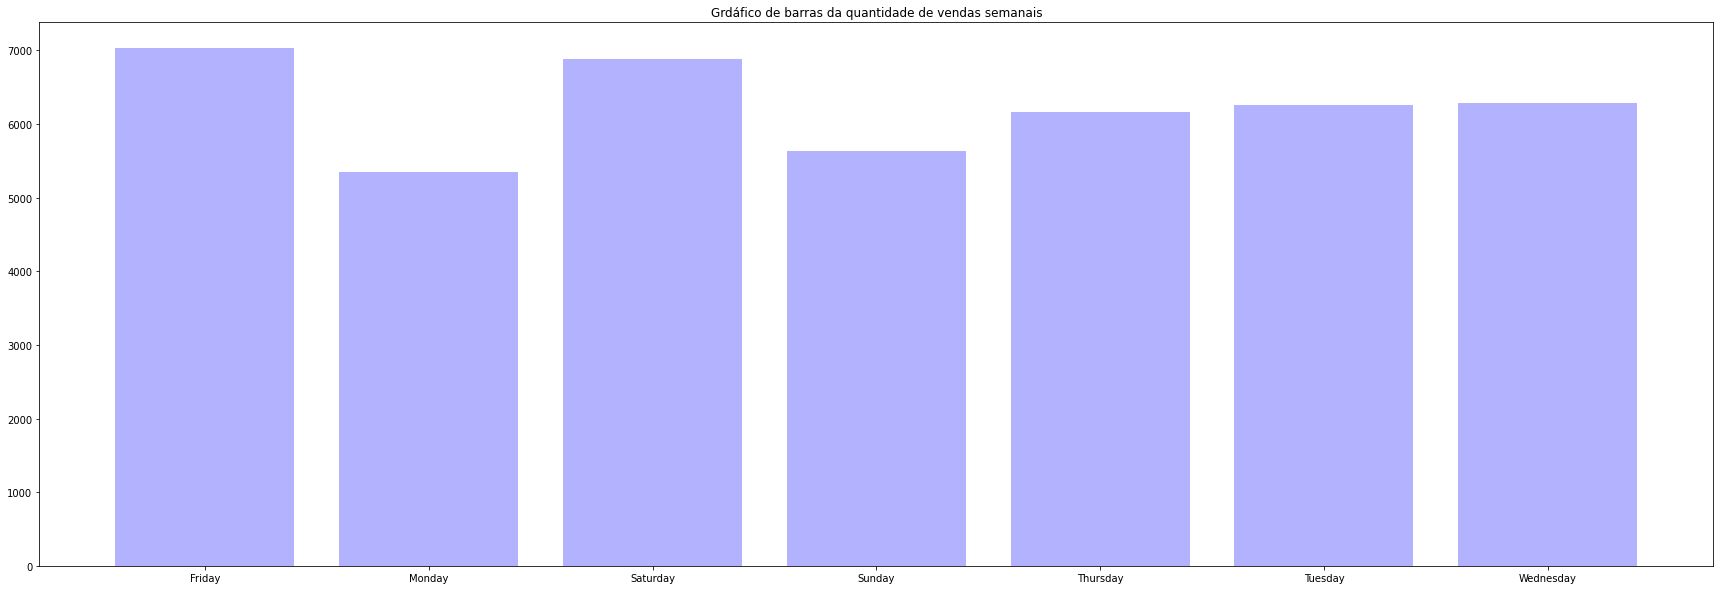

In [18]:
FIGSIZE = 30
plt.figure(figsize = (FIGSIZE,FIGSIZE/3))
x = df_load_week["WEEK_DAY"]
y = df_load_week["SOLD_QUANTITY"]
plt.title(f"Grdáfico de barras da quantidade de vendas semanais")
plt.bar(x, y, color='blue', alpha = 0.3);

In [19]:
df_load_week = df_load.groupby(["WEEK_DAY"],as_index=False)["SOLD_QUANTITY"].count().sort_values(by=["SOLD_QUANTITY"], ascending=False)
df_load_week

,WEEK_DAY,SOLD_QUANTITY
0,Friday,7030
2,Saturday,6882
6,Wednesday,6289
5,Tuesday,6255
4,Thursday,6163
3,Sunday,5630
1,Monday,5347


C:\Users\Marcelo DL\AppData\Local\Temp\ipykernel_13096\2629624046.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (FIGSIZE,FIGSIZE/3))


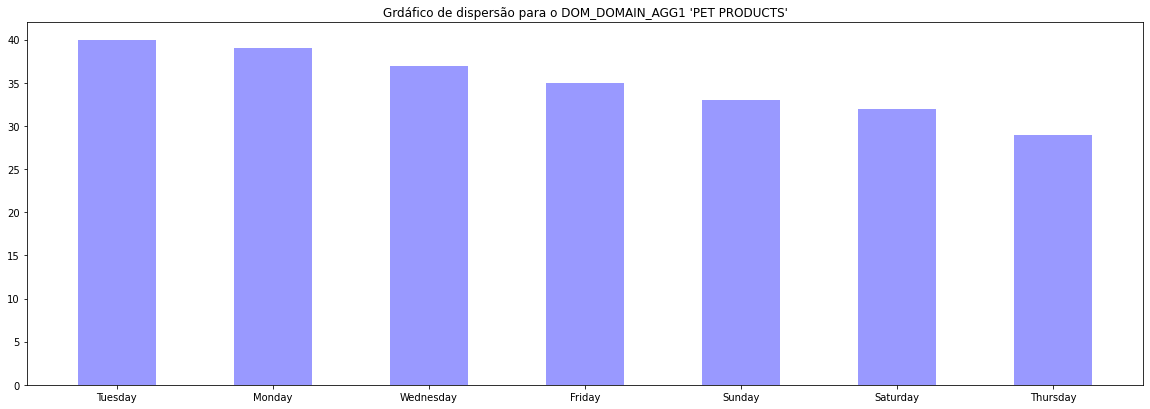

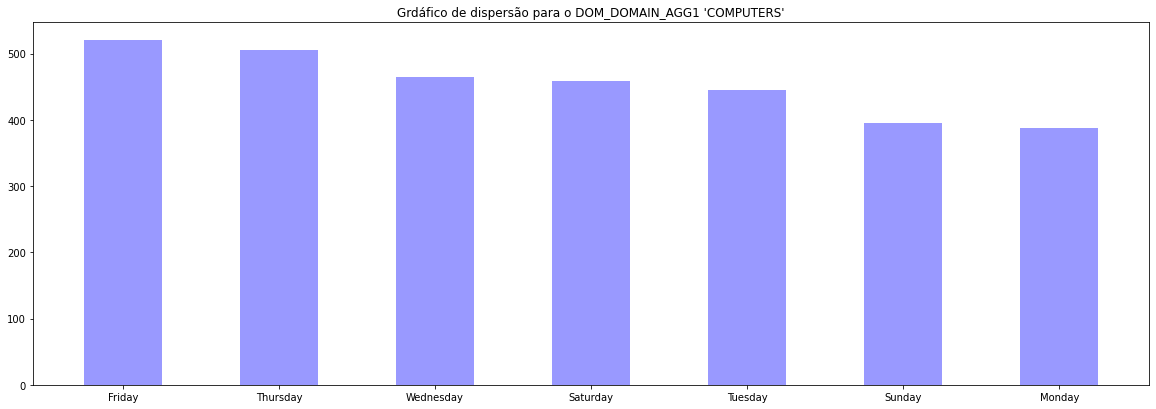

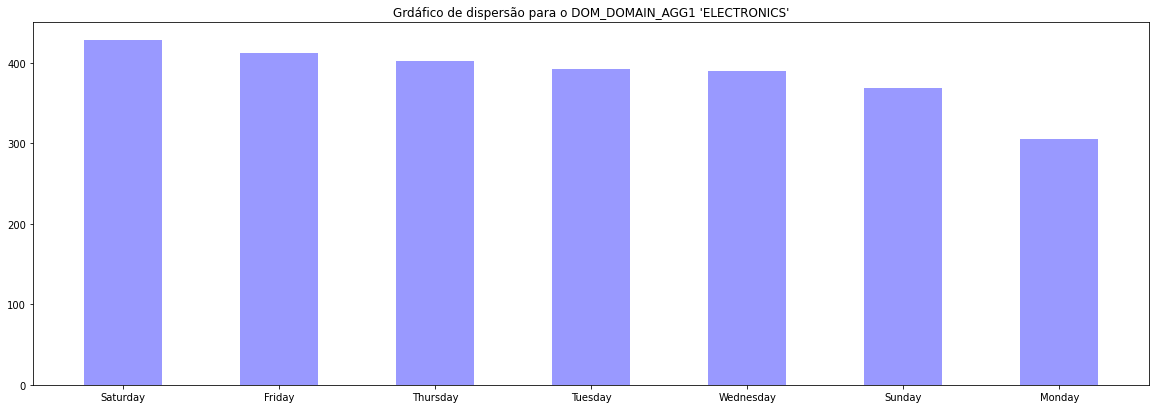

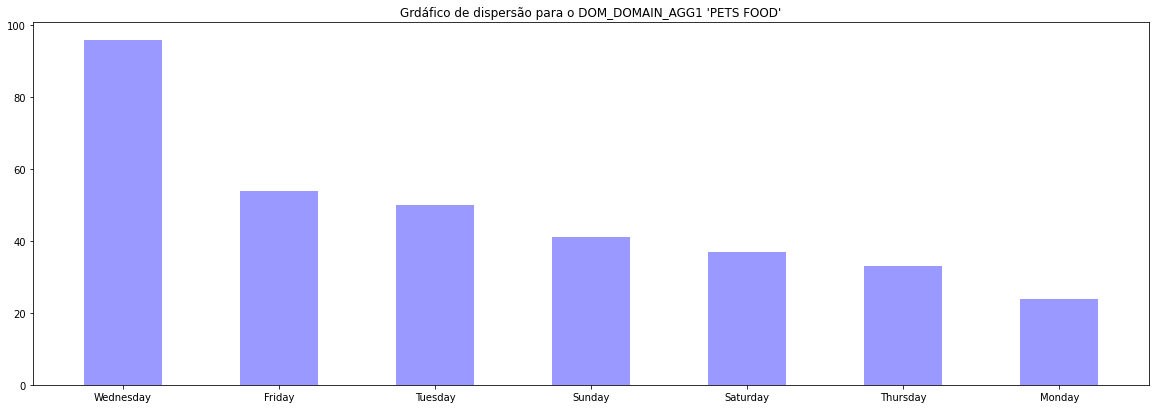

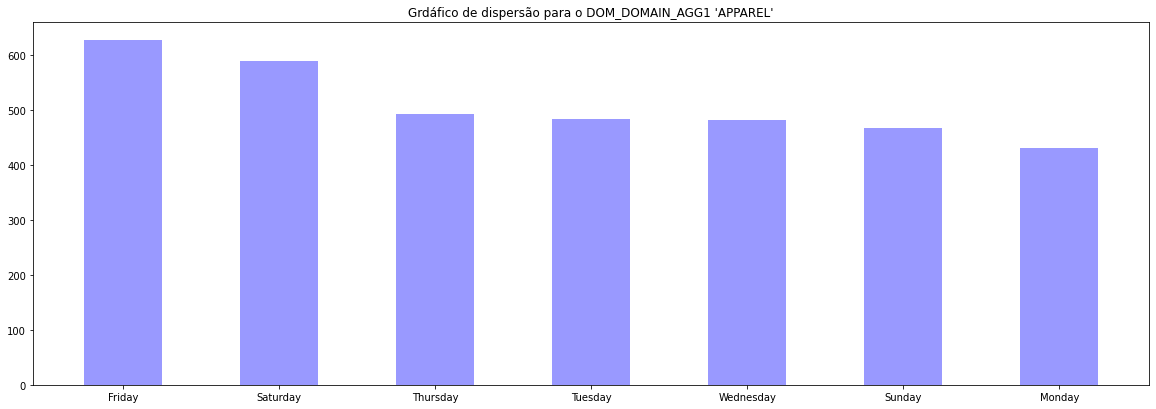

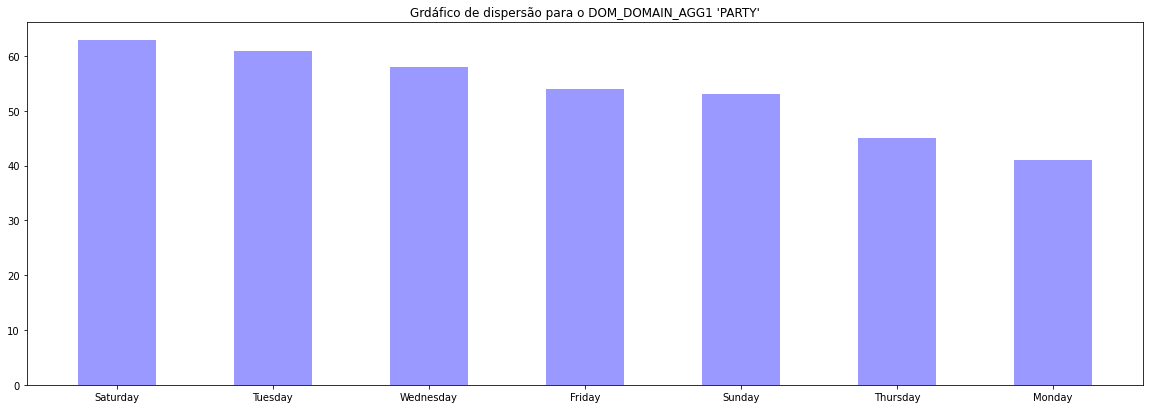

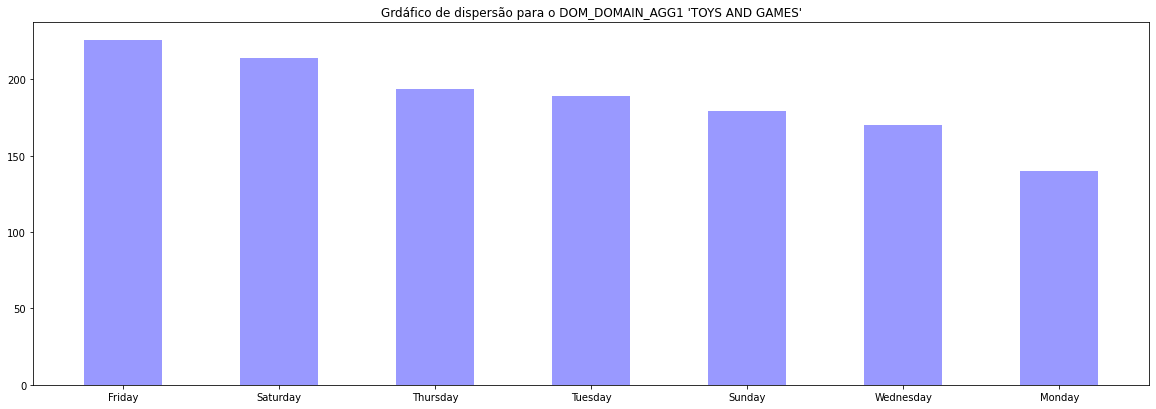

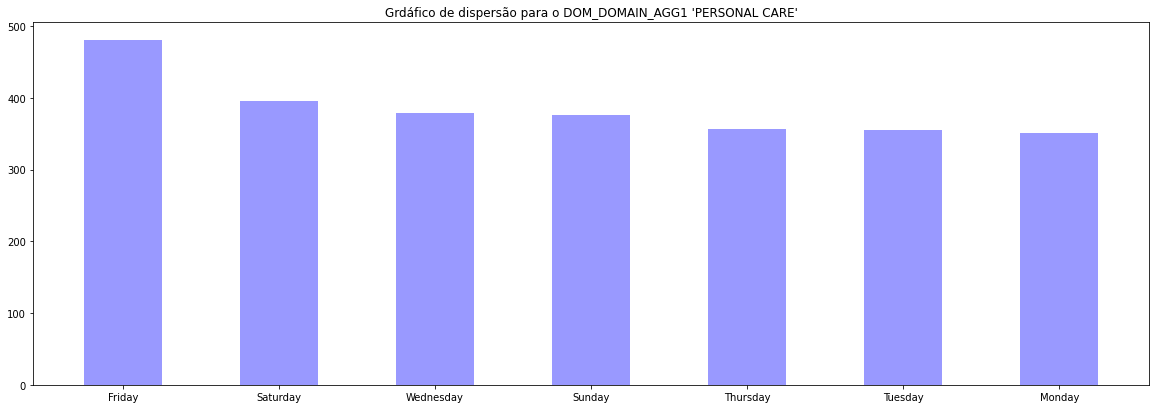

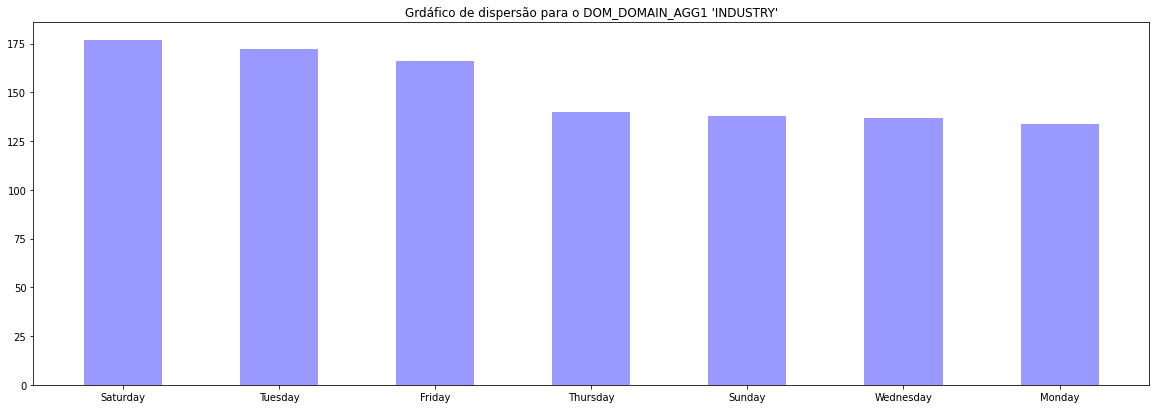

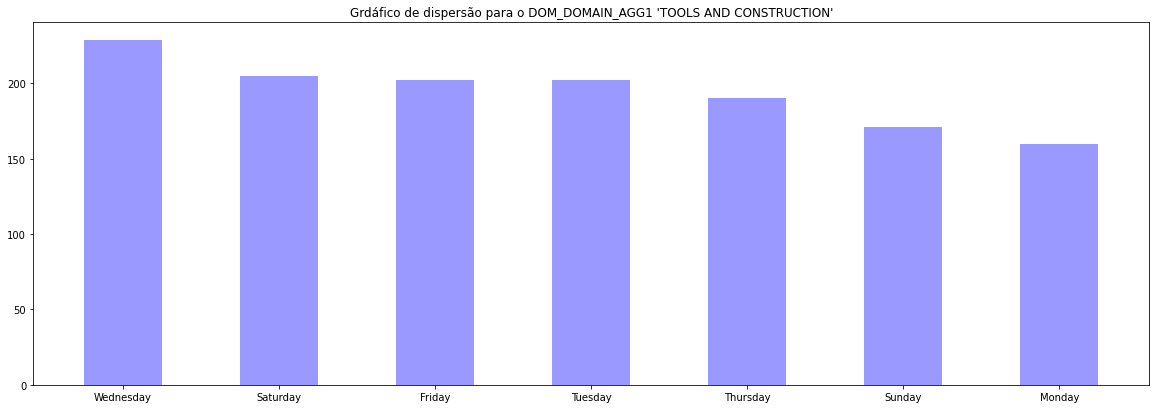

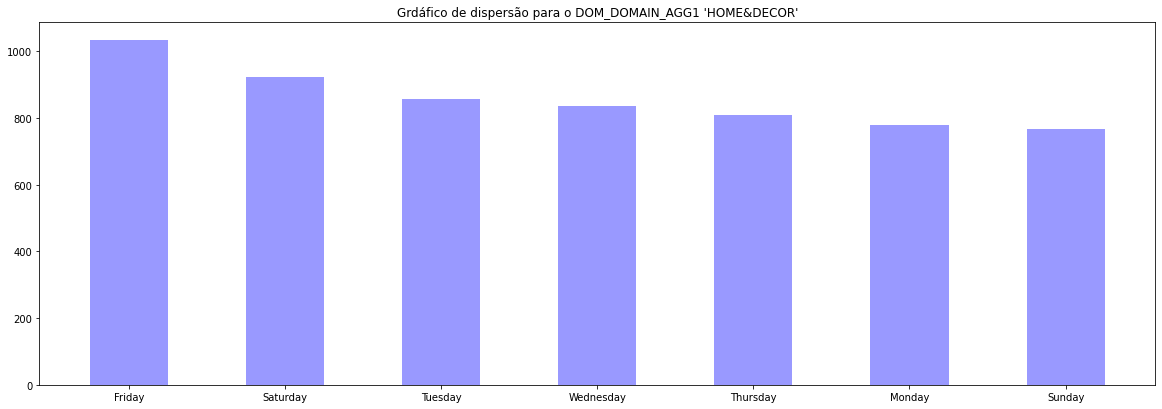

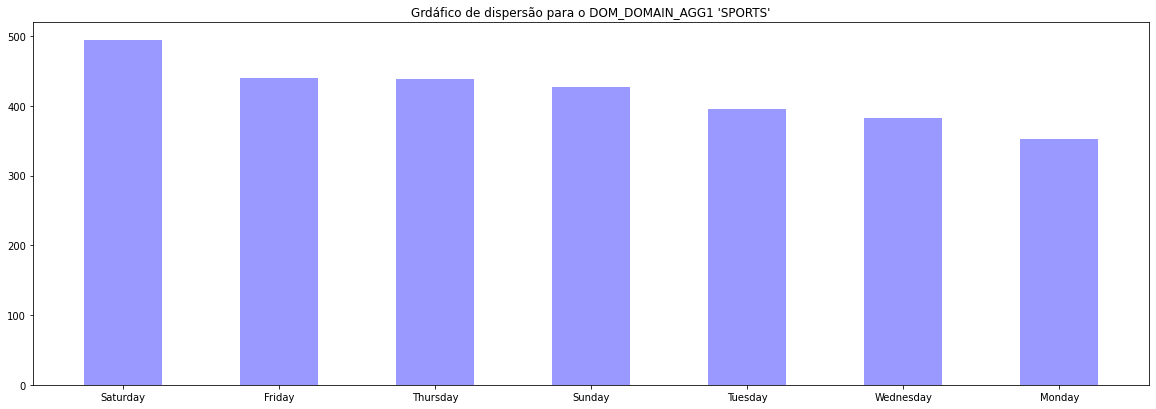

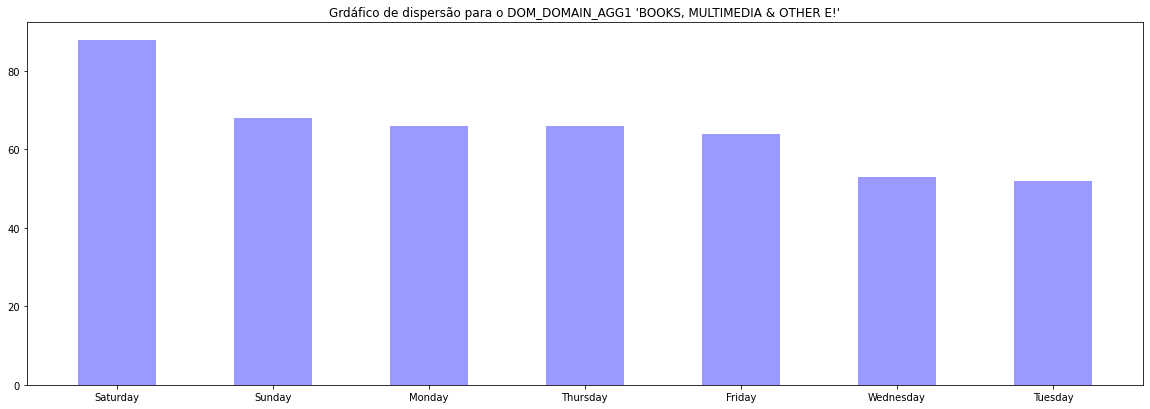

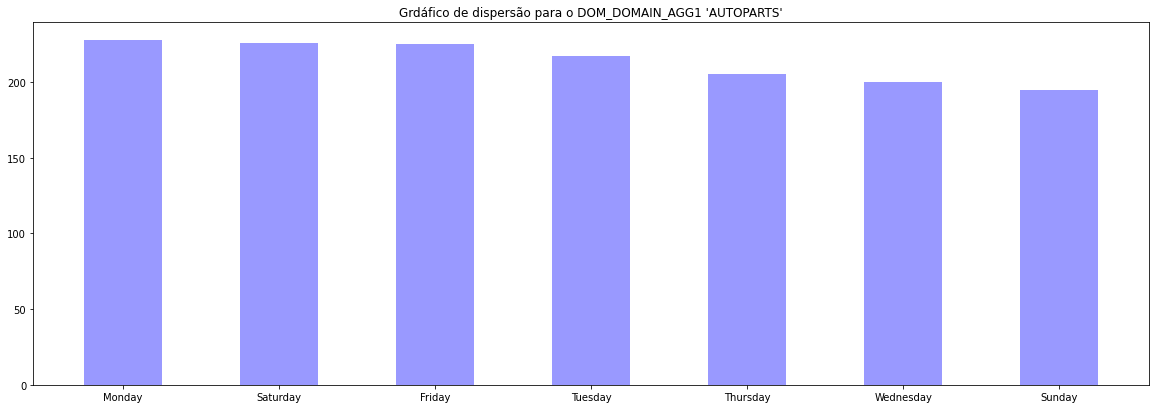

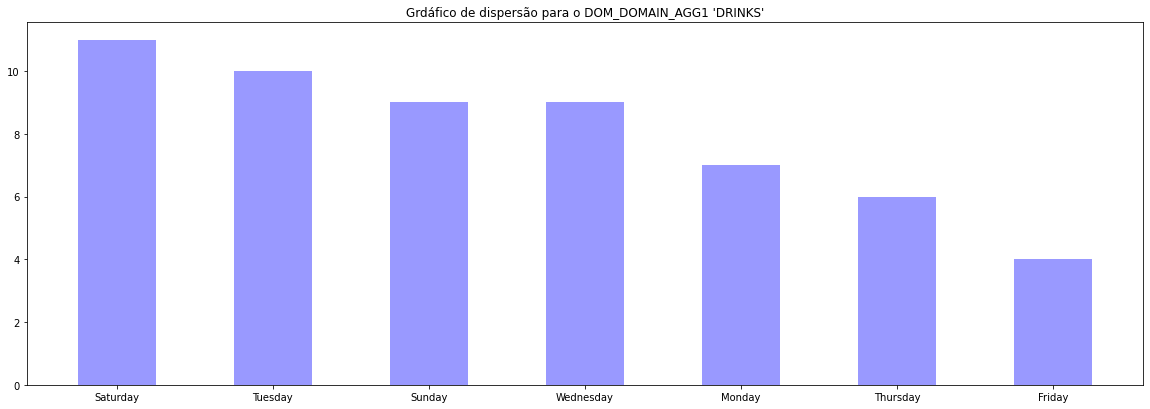

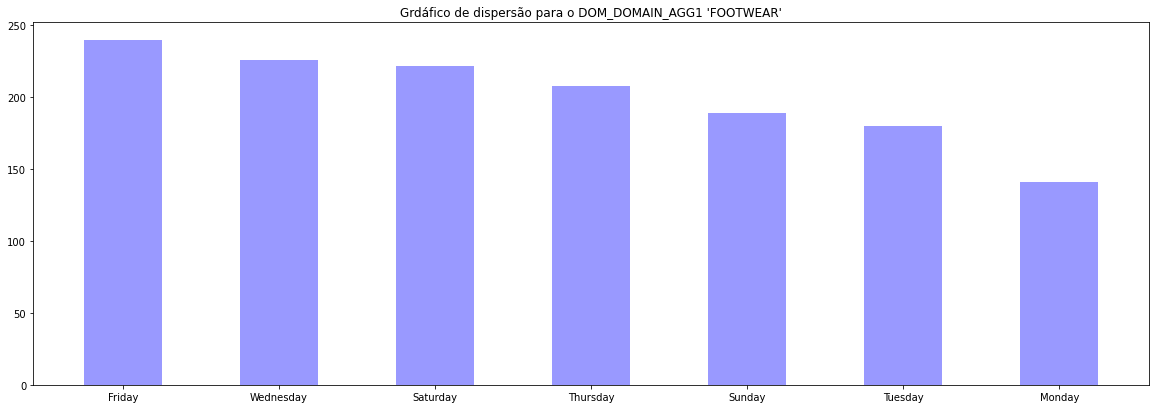

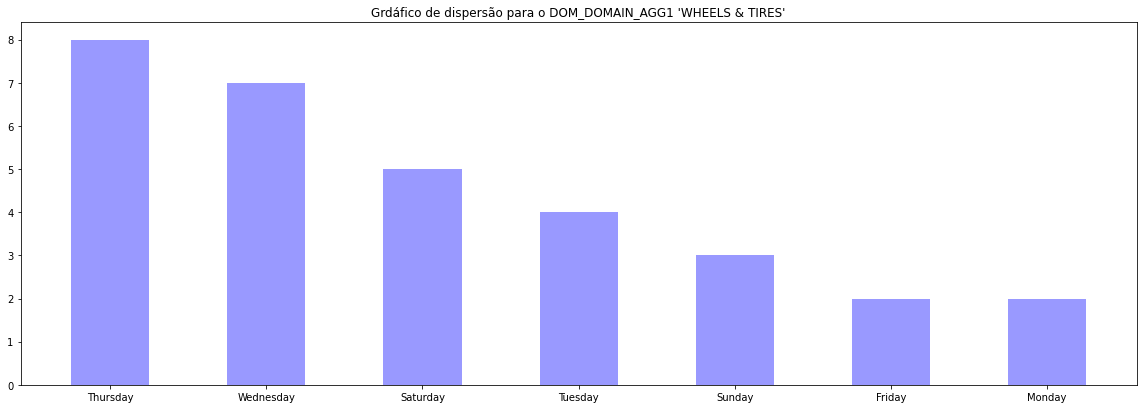

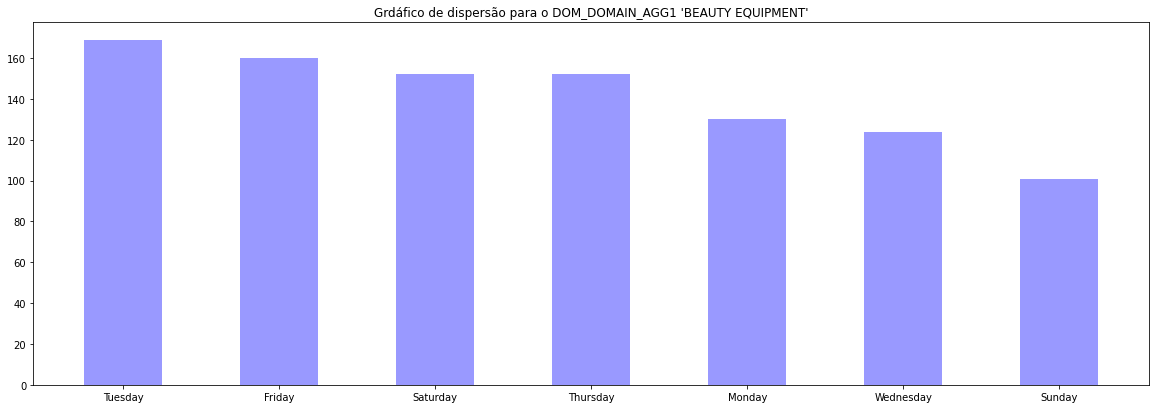

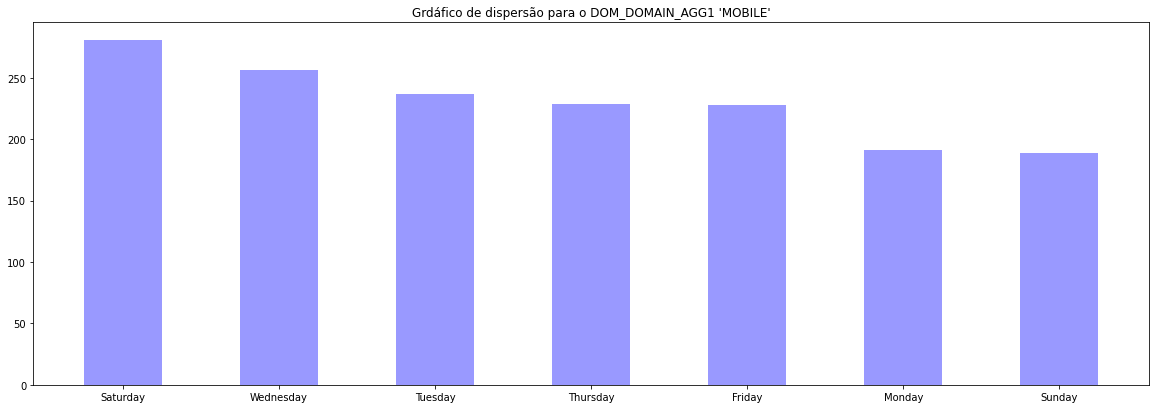

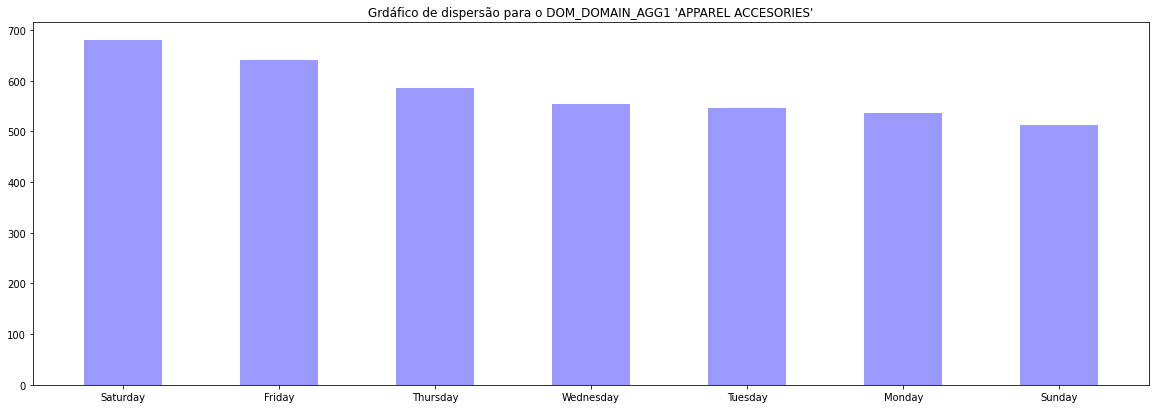

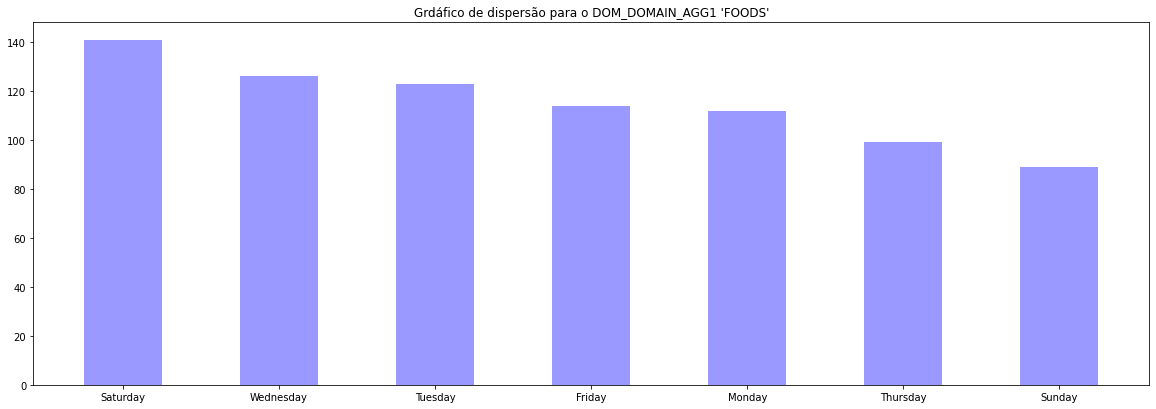

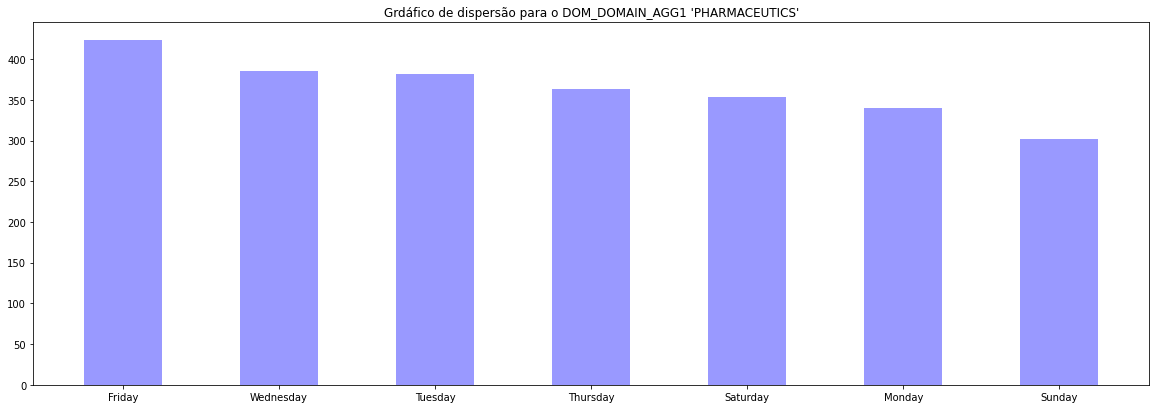

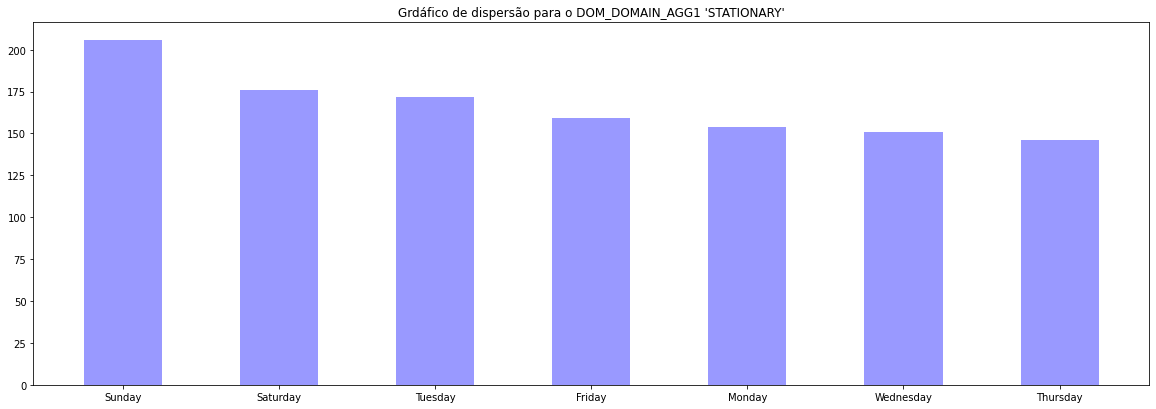

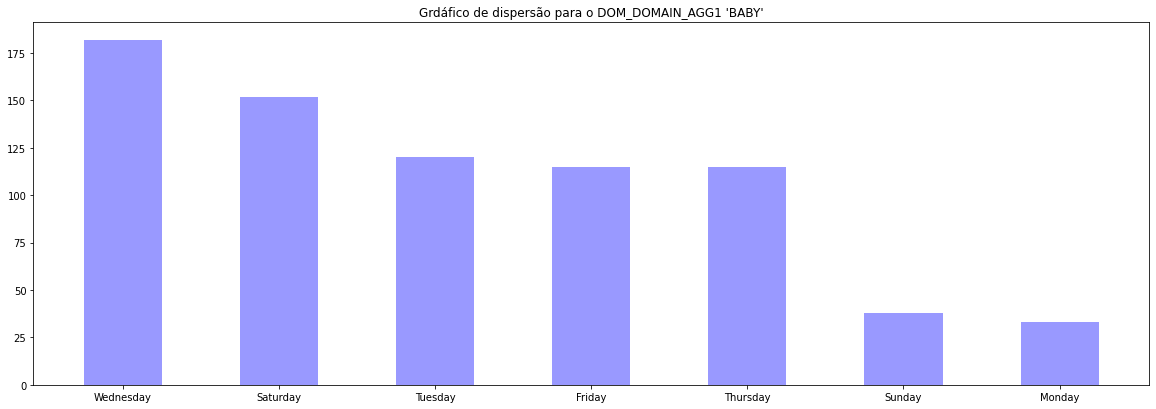

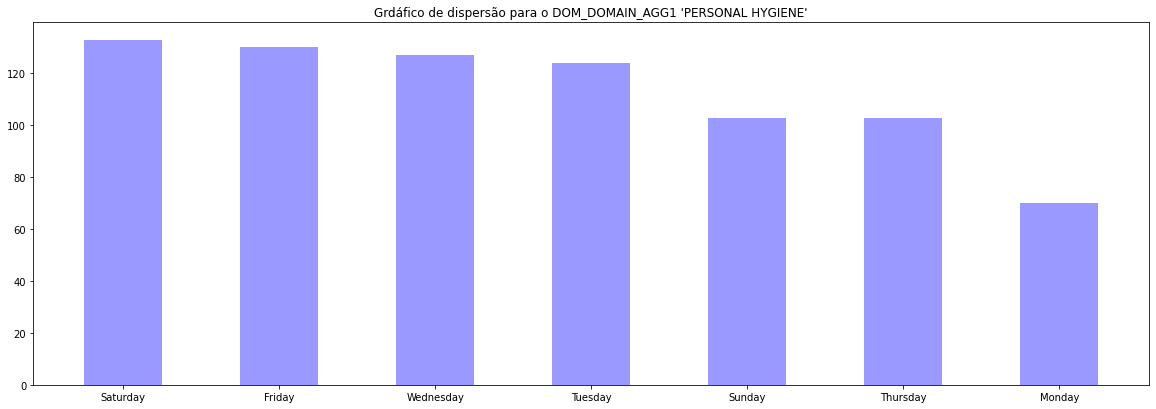

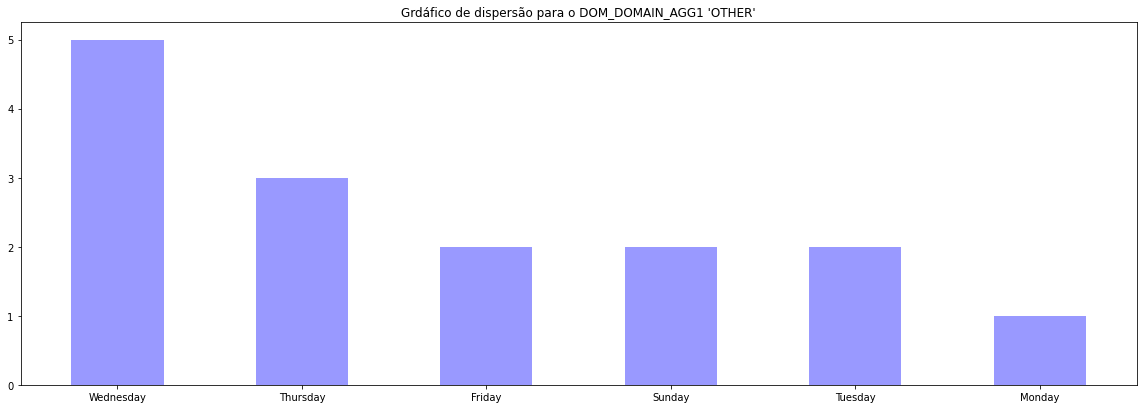

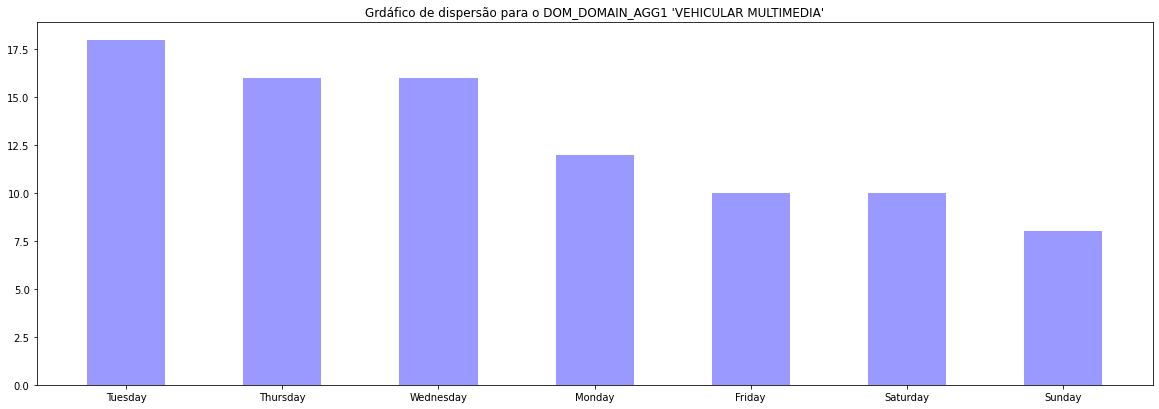

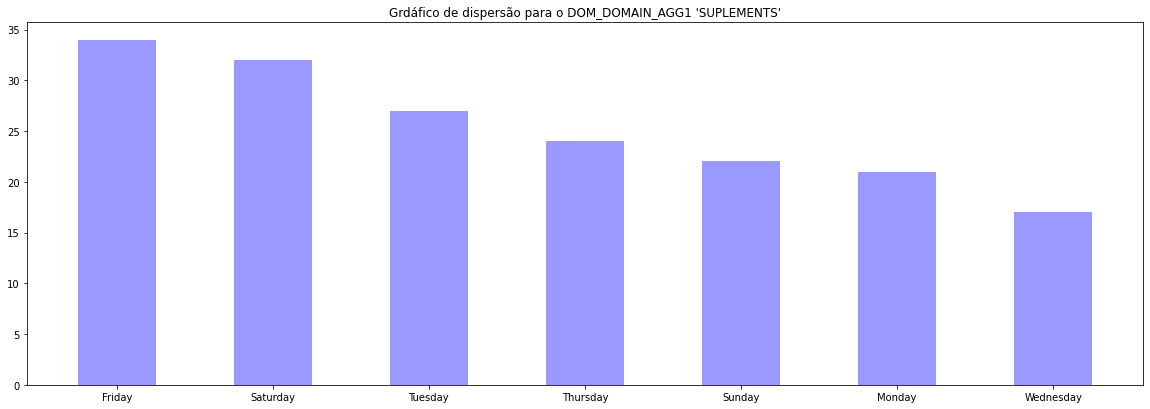

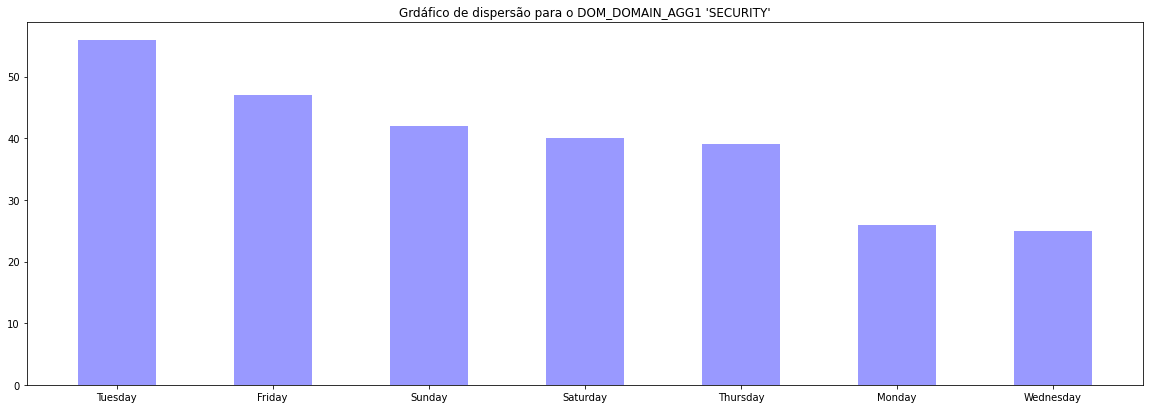

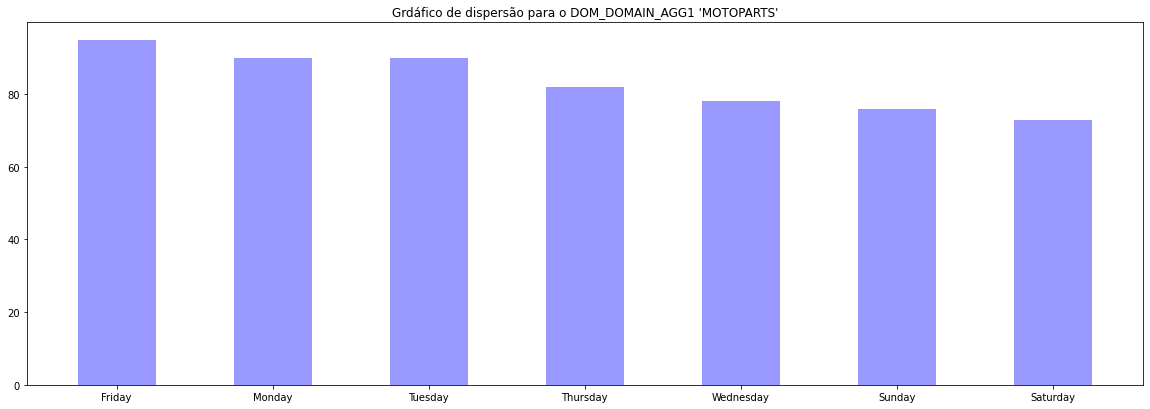

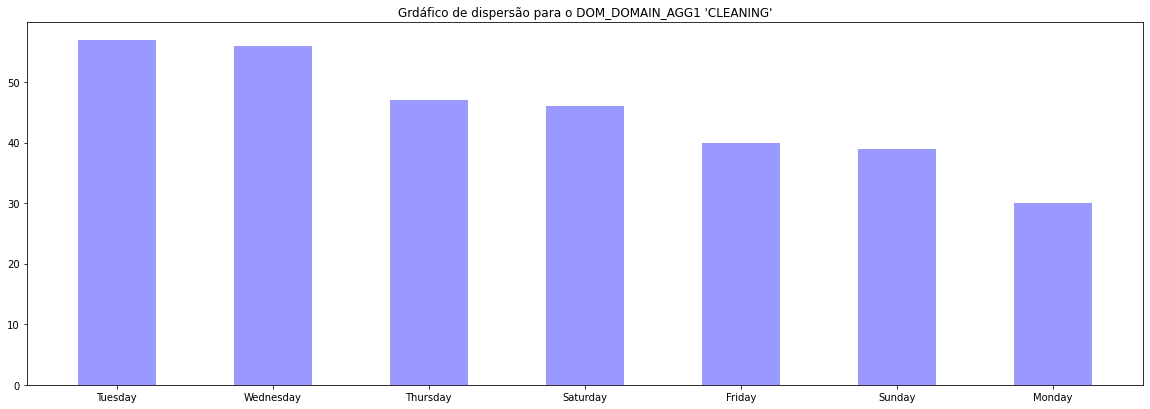

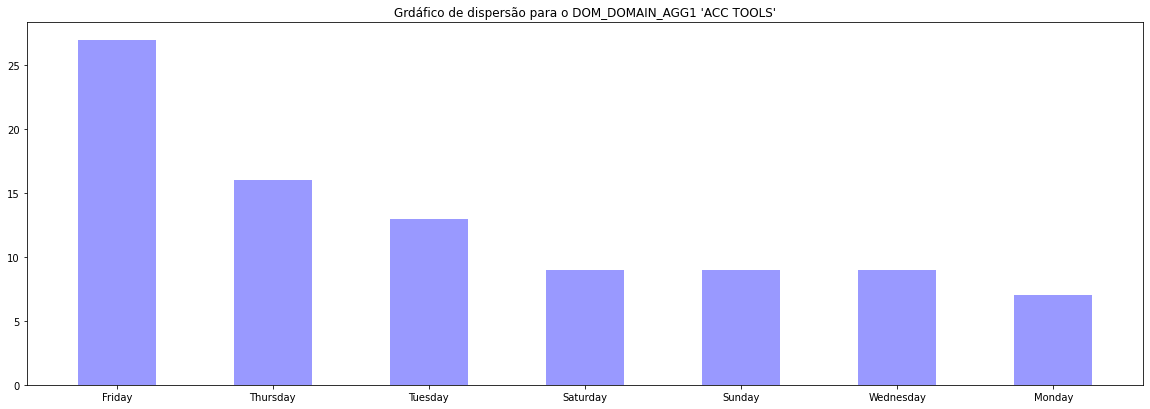

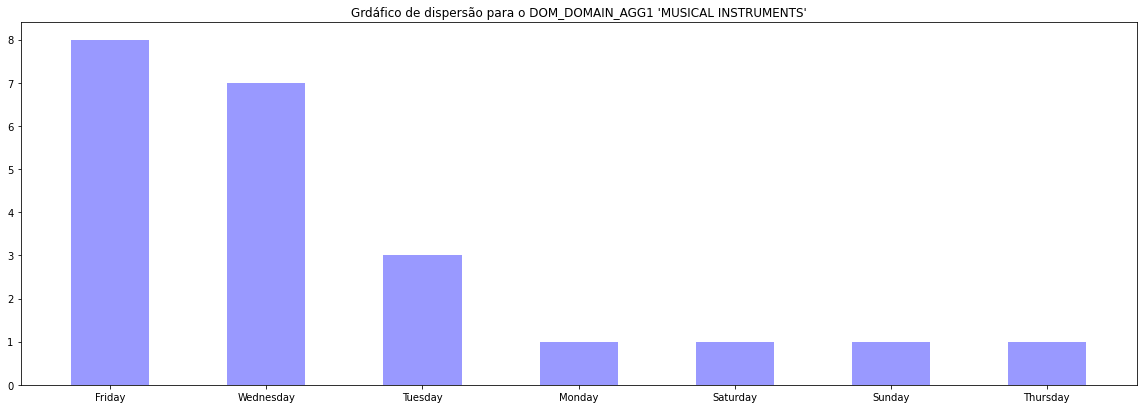

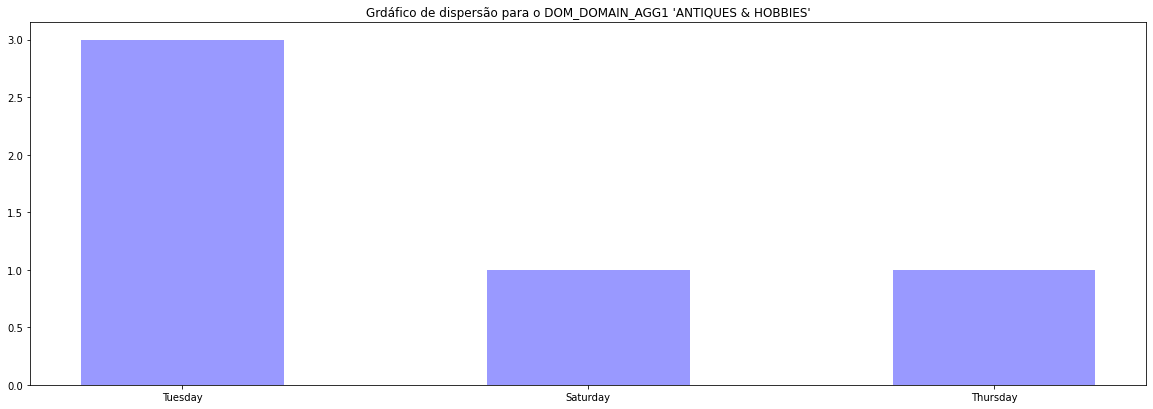

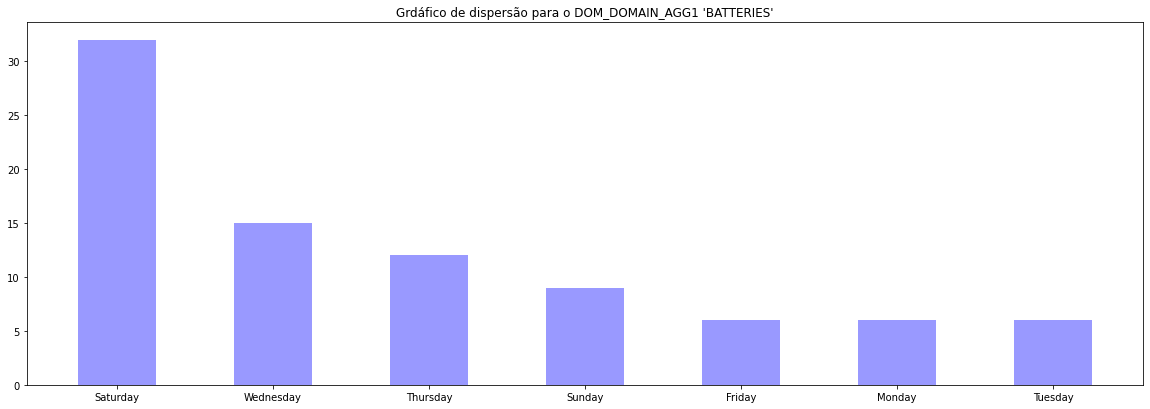

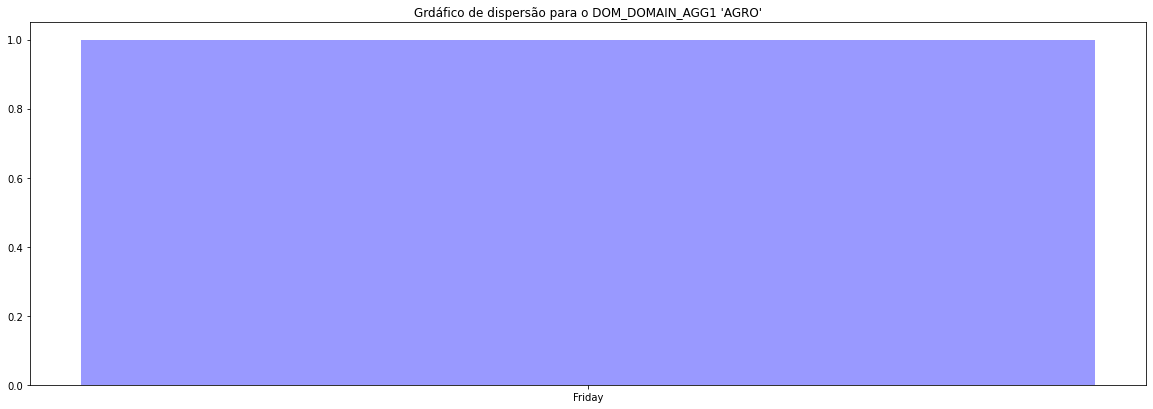

In [21]:
for dominio_agg in df_load["DOM_DOMAIN_AGG1"].unique():
    df_load_sccater = df_load.query(f"DOM_DOMAIN_AGG1 == '{dominio_agg}'")
    df_week_domain = df_load_sccater.groupby(["WEEK_DAY"],as_index=False)["SOLD_QUANTITY"].count().sort_values(by=["SOLD_QUANTITY"], ascending=False)
    FIGSIZE = 20
    plt.figure(figsize = (FIGSIZE,FIGSIZE/3))
    x = df_week_domain["WEEK_DAY"]
    y = df_week_domain["SOLD_QUANTITY"]
    plt.title(f"Grdáfico de dispersão para o DOM_DOMAIN_AGG1 '{dominio_agg}'")
    plt.bar(x, y, color='blue', alpha = 0.4, width= 0.5);